<a href="https://colab.research.google.com/github/gdarias1987/Datascients-Coderhouse/blob/main/EntregaFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presentación Proyecto Final
## Utilización de Machine Learning para Clasificación Binaria

Integrante: Guillermo Daniel Arias 

Fecha: 2022-02

Camada: 16315


<hr>

# Introducción
La tecnología de Machine Learning (ML) ha tomado mucha fuerza en los últimos años y ha logrado ser utilizada en múltiples escenarios para afrontar problemas. 
Uno de los mayores problemas que permite resolver las tecnologías de ML, es la clasificación. 
Las clasificaciones pueden ser binarias o de clases múltiples.
Este proyecto final pretende abordar la clasificación binaria de un conjunto de datos.


<hr>

# Objetivo
El dataset comprende un listado de pokemons y sus características principales. 

El objetivo del proyecto será poder clasificar de una base de datos de pokemons, aquellos que son Legendarios.
Para lograr dicho cometido, la última columna del dataset contiene el dato que corresponde a si un pokemon es Legendario o no. 

Con la información provista, se propone utilizar las características anteriormente comentadas, para lograr determinar si el pokemon analizado es Legendario o no. 

<hr>

# Conformación equipo de trabajo
Guillermo Daniel Arias

<hr>

# Fuente del Dataset
Para este proyecto se utilizará un dataset obtenido de la página Kaggle [LINK](https://www.kaggle.com/abcsds/pokemon)

<hr>

# Data Acquisition
Para la obtención del dataset se buscaron aquellos que tengan como “target” clasificación binaria, y además, se encontrasen en sitios opensource (free to use).
Los sitios consultados fueron:


Kaggle: https://www.kaggle.com/datasets

Google Research: https://datasetsearch.research.google.com/

Data.gov: https://www.data.gov/

Se tomó la decisión de utilizar el dataset de Pokemon debido a la variedad de tipos de datos que dispone el dataset y por afinidad con la temática.


<hr>

# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import pandas_profiling
import json

#### Instalación librerías (*)
La primera vez instalara dependencias, luego "**reinciar entorno y ejecutar todo**"


In [ ]:
!pip install pandas-profiling==2.7.1
!pip install plotly==5.2.1
!pip install -U kaleido
# !pip install -c plotly plotly-orca

In [3]:
pio.templates.default = "plotly_dark"
pio.kaleido.scope.default_width = "1366"
pio.kaleido.scope.default_height = "768"

import warnings
# warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

## CARGA DATAFRAME

In [4]:
url = 'https://drive.google.com/file/d/18SCNs5SHVsG8YEldwt44euatPXiYwlAE/view?usp=sharing'

file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
# df = df.dropna()
df_aux = df

In [5]:
df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


<hr>

## ANALISIS EXPLORATORIO

### METODO LARGO

#### SHAPE

In [6]:
df.shape

(800, 13)

#### TOTALIDAD DE REGISROS POR COLUMNA

In [7]:
df.count().to_frame().T

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,800,800,800,414,800,800,800,800,800,800,800,800,800


#### TIPOS DE DATOS POR COLUMNA

In [8]:
df.dtypes.to_frame().T

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,int64,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,bool


#### ESTRUCTURA DEL DATASET

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.columns.to_frame().T


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


### METODO CORTO

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### Data Wrangling

#### *Columna* "#" 
Esta columna tiene un valor numérico con valores repetidos. 

Significa que algunos pokemons comparten el mismo valor de la clave "#", como se puede ver a continuación:


In [12]:
df["#"].value_counts().head()

479    6
386    4
710    4
711    4
646    3
Name: #, dtype: int64

##### EJEMPLO
Se listan los 3 primeros casos

In [13]:
labels = df["#"].value_counts().keys()

for i in range(3):
  print(df[df["#"]== labels[i]])

       #              Name    Type 1  ... Speed  Generation  Legendary
531  479             Rotom  Electric  ...    91           4      False
532  479   RotomHeat Rotom  Electric  ...    86           4      False
533  479   RotomWash Rotom  Electric  ...    86           4      False
534  479  RotomFrost Rotom  Electric  ...    86           4      False
535  479    RotomFan Rotom  Electric  ...    86           4      False
536  479    RotomMow Rotom  Electric  ...    86           4      False

[6 rows x 13 columns]
       #                 Name   Type 1  ... Speed  Generation  Legendary
428  386   DeoxysNormal Forme  Psychic  ...   150           3       True
429  386   DeoxysAttack Forme  Psychic  ...   150           3       True
430  386  DeoxysDefense Forme  Psychic  ...    90           3       True
431  386    DeoxysSpeed Forme  Psychic  ...   180           3       True

[4 rows x 13 columns]
       #                   Name Type 1  ... Speed  Generation  Legendary
780  710  Pumpkaboo

#### *Columna* "Type 2" 
Se identifica que en la columna "Type 2" hay campos null.
Se realizó un análisis particular de los valores que puede tomar “Type 2”:

In [14]:
pd.DataFrame(df["Type 2"].describe()).reset_index()

,index,Type 2
0,count,414
1,unique,18
2,top,Flying
3,freq,97


Se puede visualizar que de 800 valores que tienen las demás columnas, esta tiene solo 414. 

Comprendiendo en profundidad, la variable representa una segunda clasificación del tipo de pokemon. 
Se decide reemplazar los valores null, por el carácter “-”.


In [15]:
def fixNaN(x):
  if(type(x)==float):
    return "-"
  else:
    return x

In [16]:
df["Type 2"] = df["Type 2"].apply(lambda x: fixNaN(x))

#### Renombrado de Columnas
Se decidió renombrar algunas columnas


In [17]:
df.rename(columns={"#":"Index", "Type 2": "type_2", "Type 1": "type_1"}, inplace=True)

#### Variable Target

Esta columna es del tipo booleana. 
Para poder realizar el análisis, se procede a transformar la variable es categórica y numérica.


In [18]:
df["TargetInt"] = df.Legendary.apply(lambda x: 1 if x else 0)
df["Legendary"] = df.Legendary.apply(lambda x: "Si" if x else "No")

In [19]:
df.head()

,Index,Name,type_1,type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,TargetInt
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,No,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,No,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,No,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,No,0
4,4,Charmander,Fire,-,309,39,52,43,60,50,65,1,No,0


### ANALISIS UNIVARIADO

In [20]:
# SOLO PARA ANALISIS EXTRA
# for column in df.columns:
#   if column != "Index":
#     fig = px.histogram(df, 
#                     x=column,
#                     color=column
#                     )
#     fig.show()

#### COLUMNA "type_1"

Se elige visualizar esta columna debido que son las clasificaciones basicas de cada pokemon. 

Ej: 
* Grass/Hierba 
* Fire/Fuego
* Water/Agua

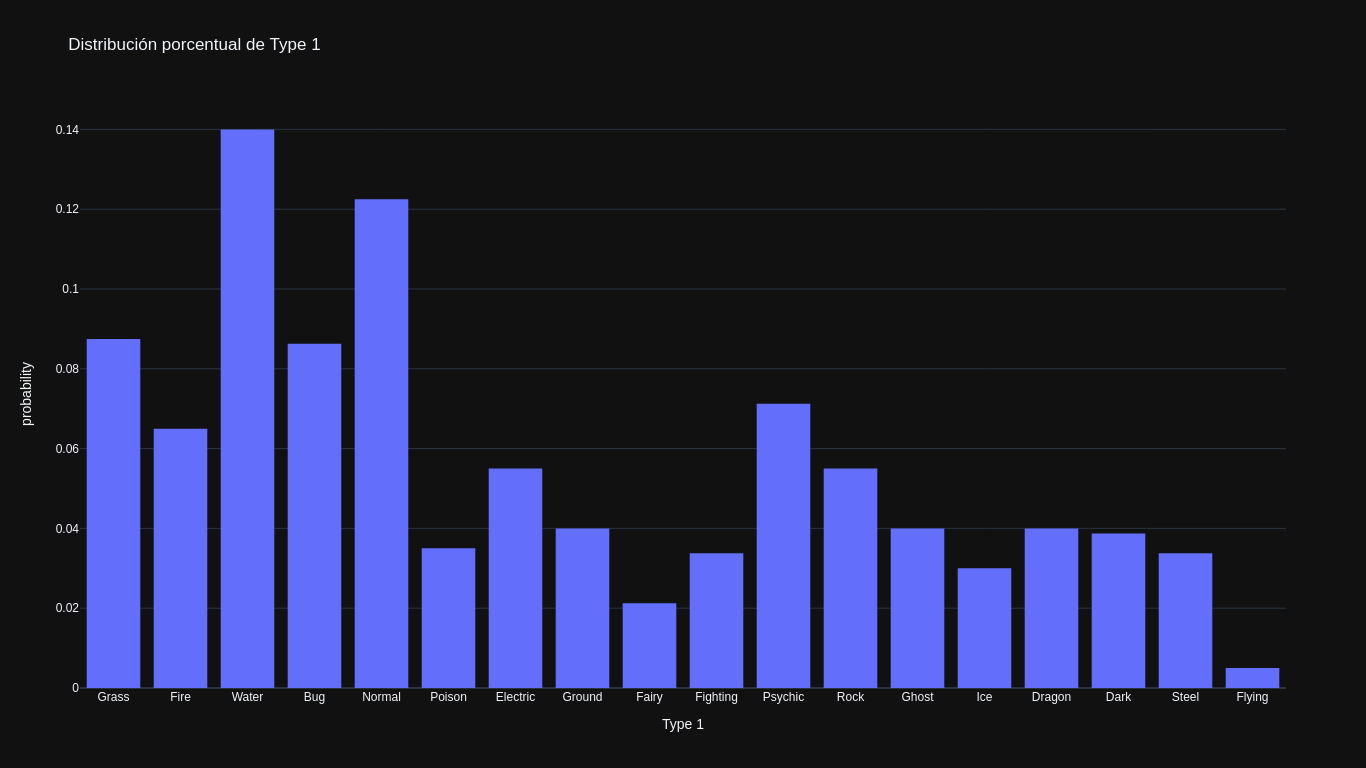

In [21]:
fig = px.histogram(df, 
                   x="type_1",
                   histnorm="probability",
                   labels = dict(count="A", type_1="Type 1"),
                   title="Distribución porcentual de Type 1",
                   )
# fig.show()
fig.show("png")

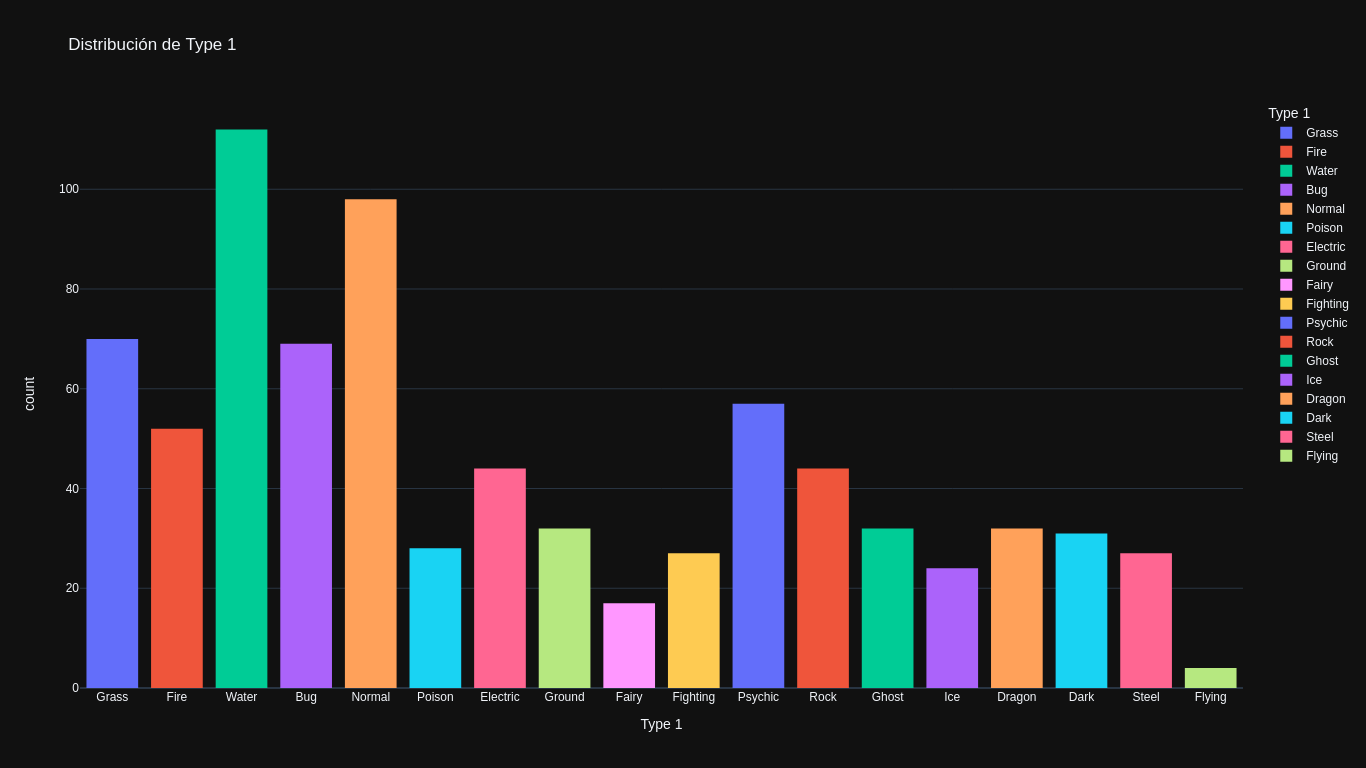

In [22]:
fig = px.histogram(df, 
                   x="type_1",
                   color="type_1",
                   title="Distribución de Type 1",
                   labels = dict(count="Count", type_1="Type 1")
                   )
# fig.show()
fig.show("png")

Se puede notar que los pokemon de agua y normales son los mas comunes.

#### COLUMNA "type_2"

Se elige visualizar esta columna debido que son las clasificaciones secundarias de cada pokemon. 

No todos los pokemons tienen esta segunda clasificación. Se hizo trabajo previo, reemplazando los "nulls" por el caracter "-"

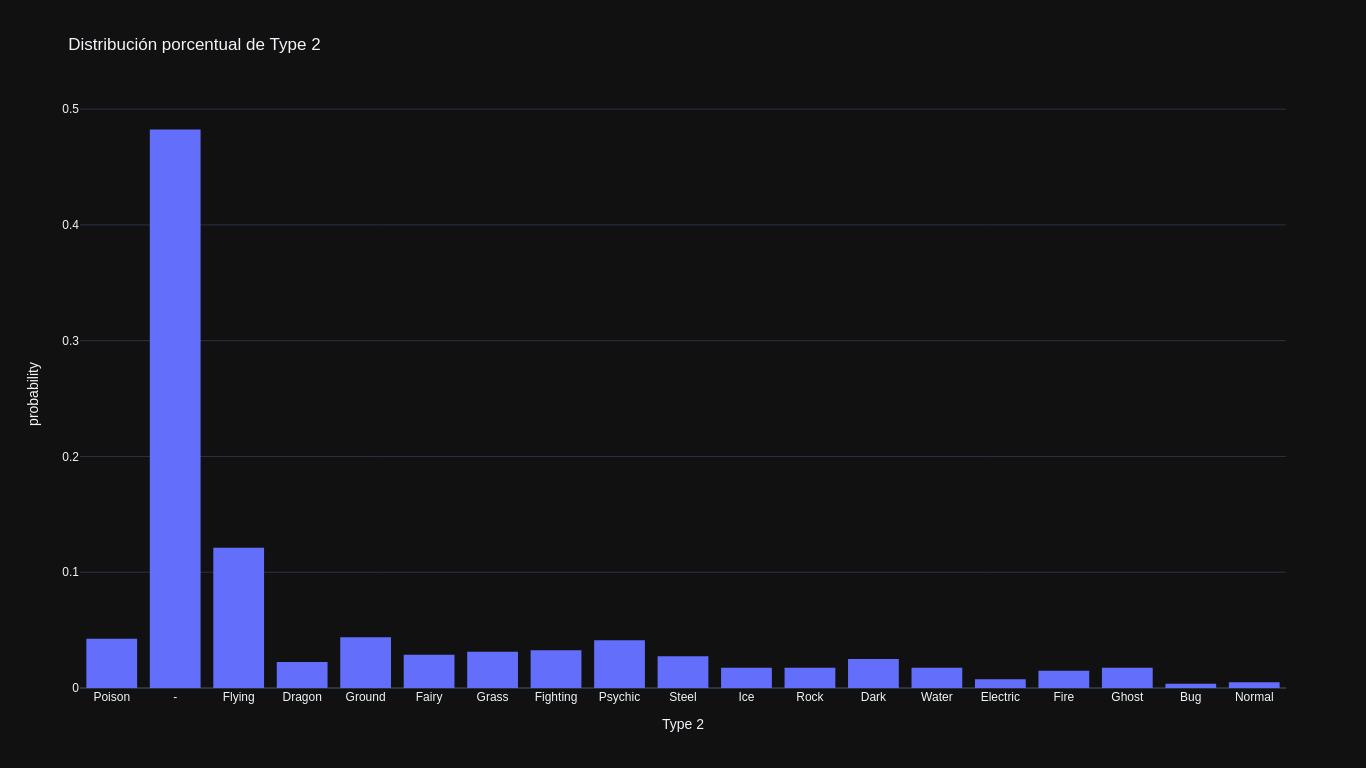

In [23]:
fig = px.histogram(df, 
                   x="type_2",
                   histnorm='probability',
                   labels = dict(count="A", type_2="Type 2"),
                   title="Distribución porcentual de Type 2"
                   )
# fig.show()
fig.show("png")

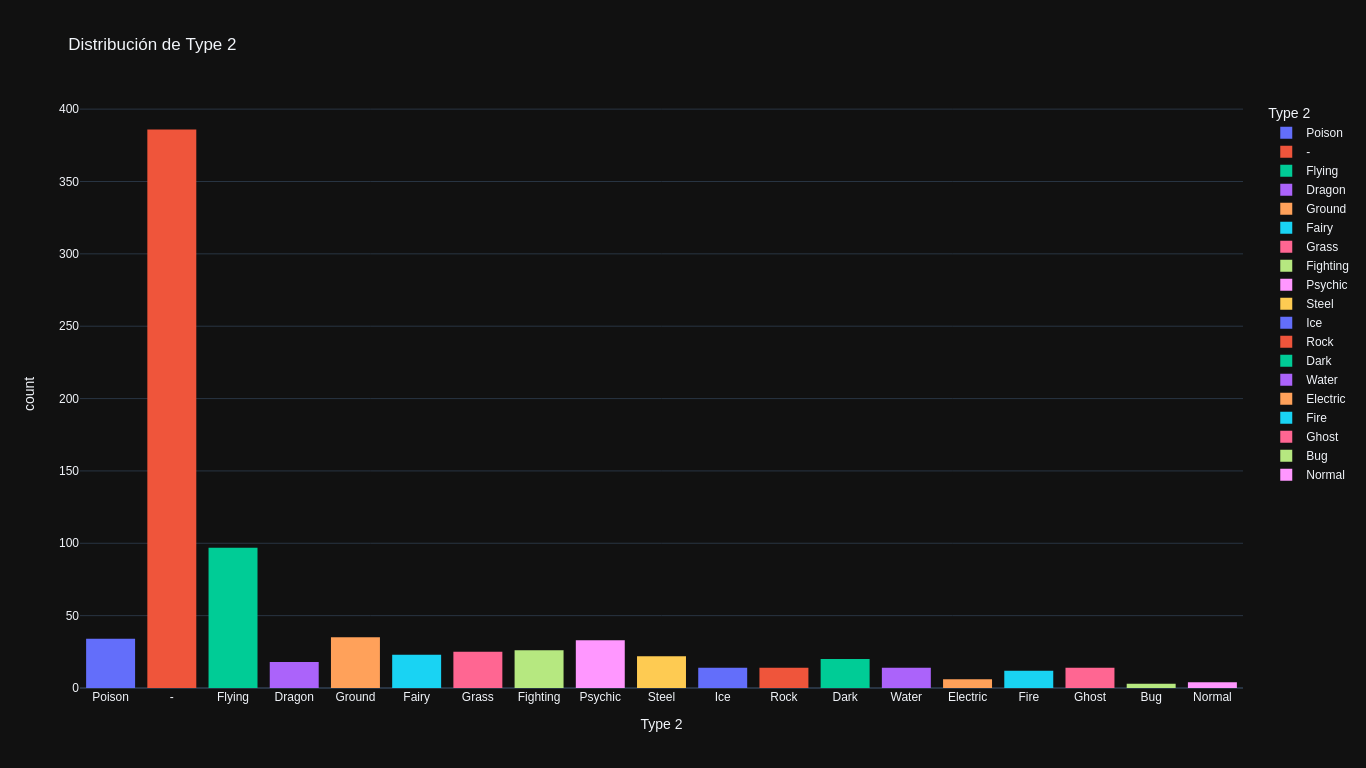

In [24]:
fig = px.histogram(df, 
                   x="type_2",
                   color="type_2",
                   labels = dict(count="A", type_2="Type 2"),
                   title="Distribución de Type 2"
                   )
# fig.show()
fig.show("png")

Se puede visualizar que mas del 48% de los pokemons no tienen esta clasificación secundaria.

Siendo las clasificaciones de voladores los mas comunes.

#### COLUMNA "Generation"

Se elige visualizar esta columna debido que indican a que generación pertenecen los pokemons. 



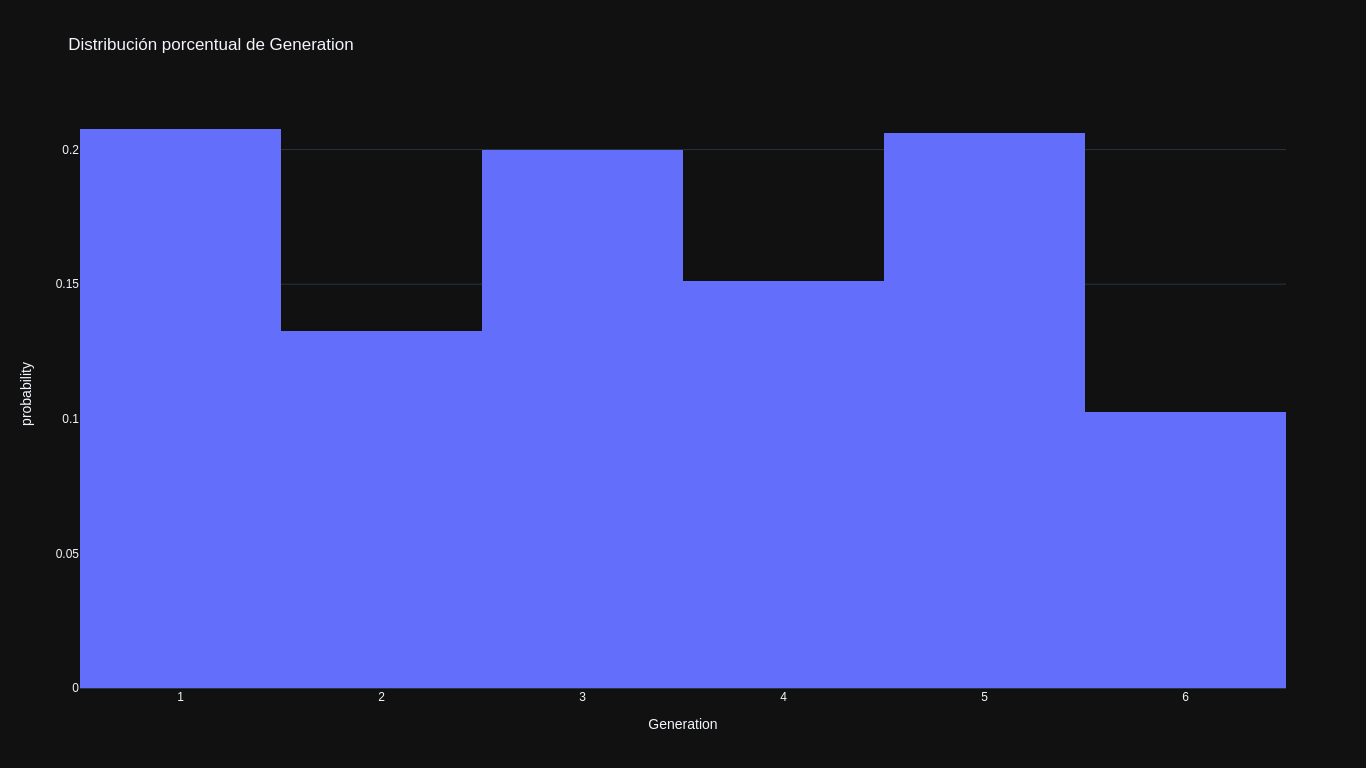

In [25]:
fig = px.histogram(df, 
                   x="Generation",
                   histnorm='probability',
                   labels = dict(count="A", Generation="Generation"),
                   title="Distribución porcentual de Generation"
                   )
# fig.show()
fig.show("png")

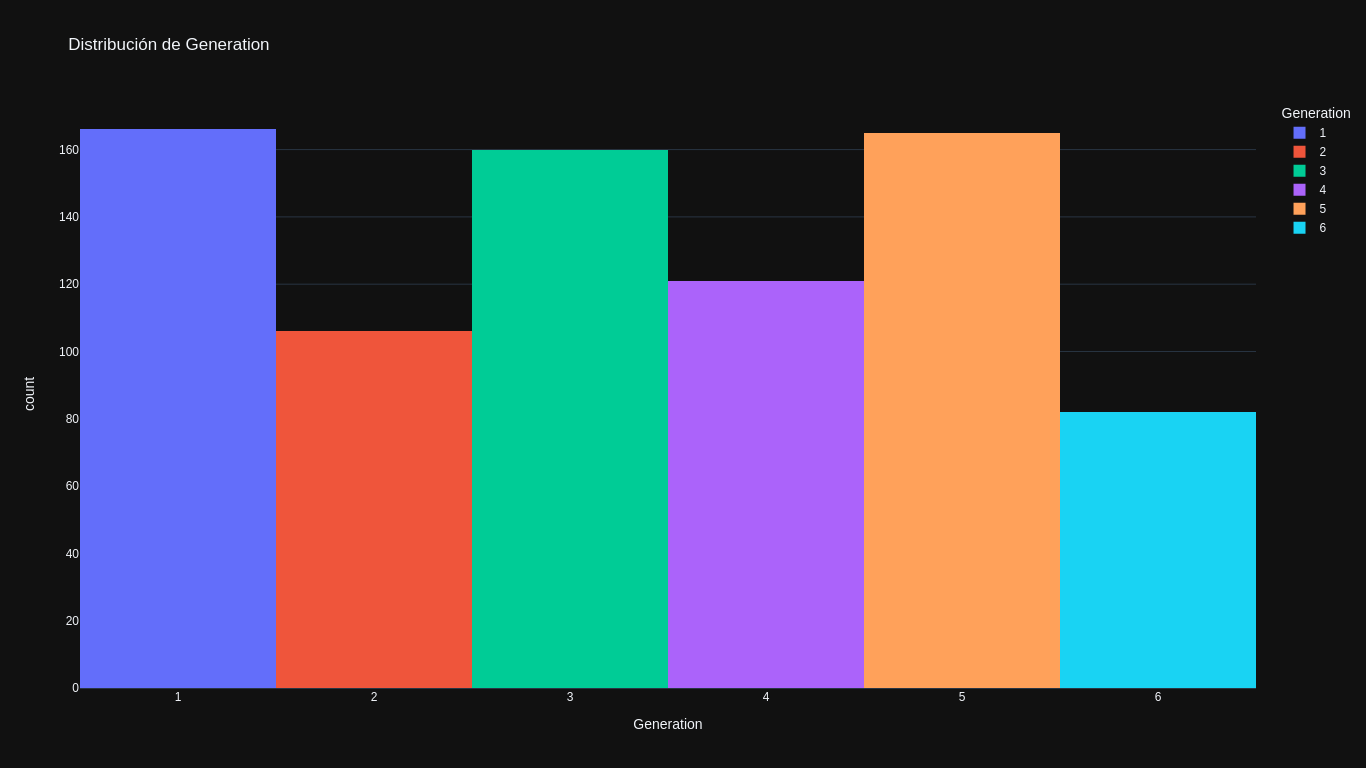

In [26]:
fig = px.histogram(df, 
                   x="Generation",
                   color="Generation",
                   labels = dict(count="A", Generation="Generation"),
                   title="Distribución de Generation"
                   )
# fig.show()
fig.show("png")

Se pueden visualizar 3 generaciones con mas pokemons, siendo la numero 1, 3 y 5.

#### COLUMNA "Legendary"
Se elige visualizar esta columna debido que permite visualizar la distribución de pokemons Lengedarios dentro del dataframe



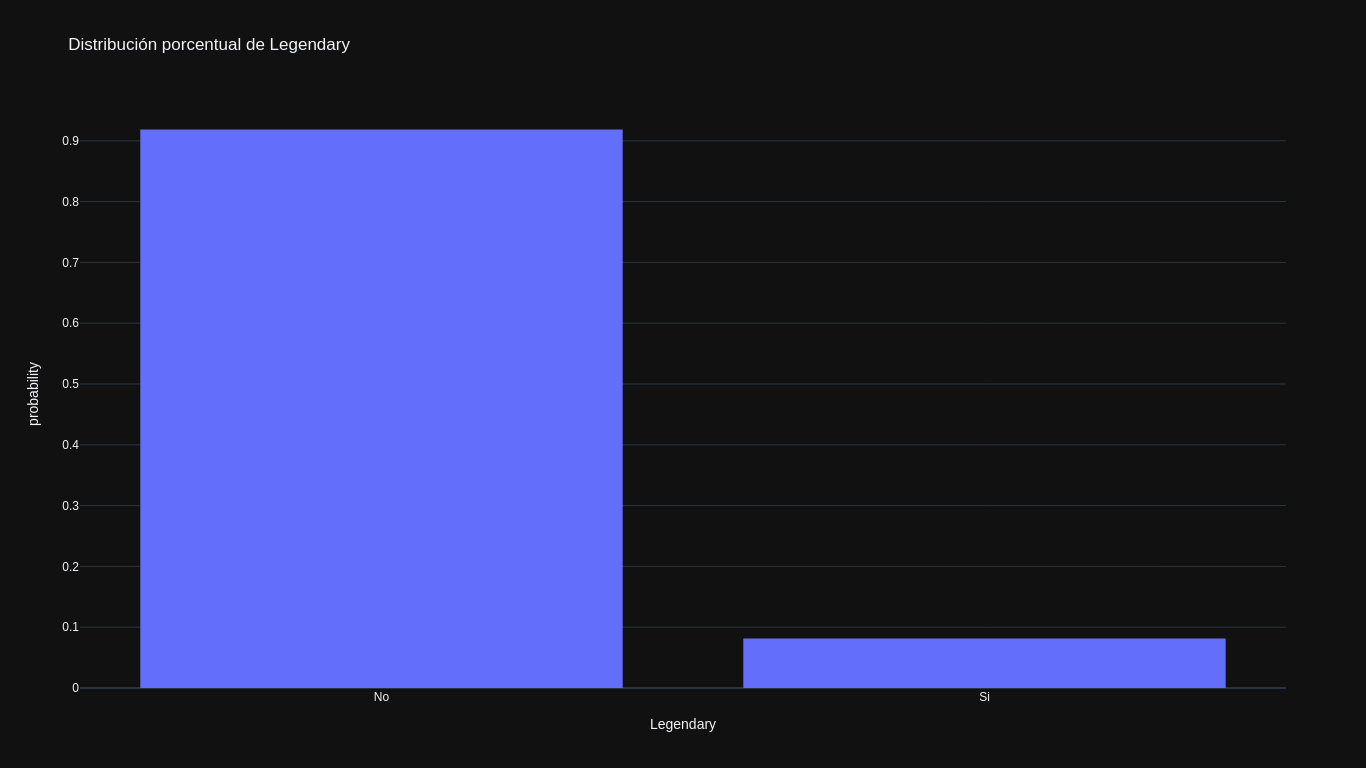

In [27]:
fig = px.histogram(df, 
                   x="Legendary",
                   histnorm='probability',
                   labels = dict(count="A", Legendary="Legendary"),
                   title="Distribución porcentual de Legendary"                   
                   )
# fig.show()
fig.show("png")

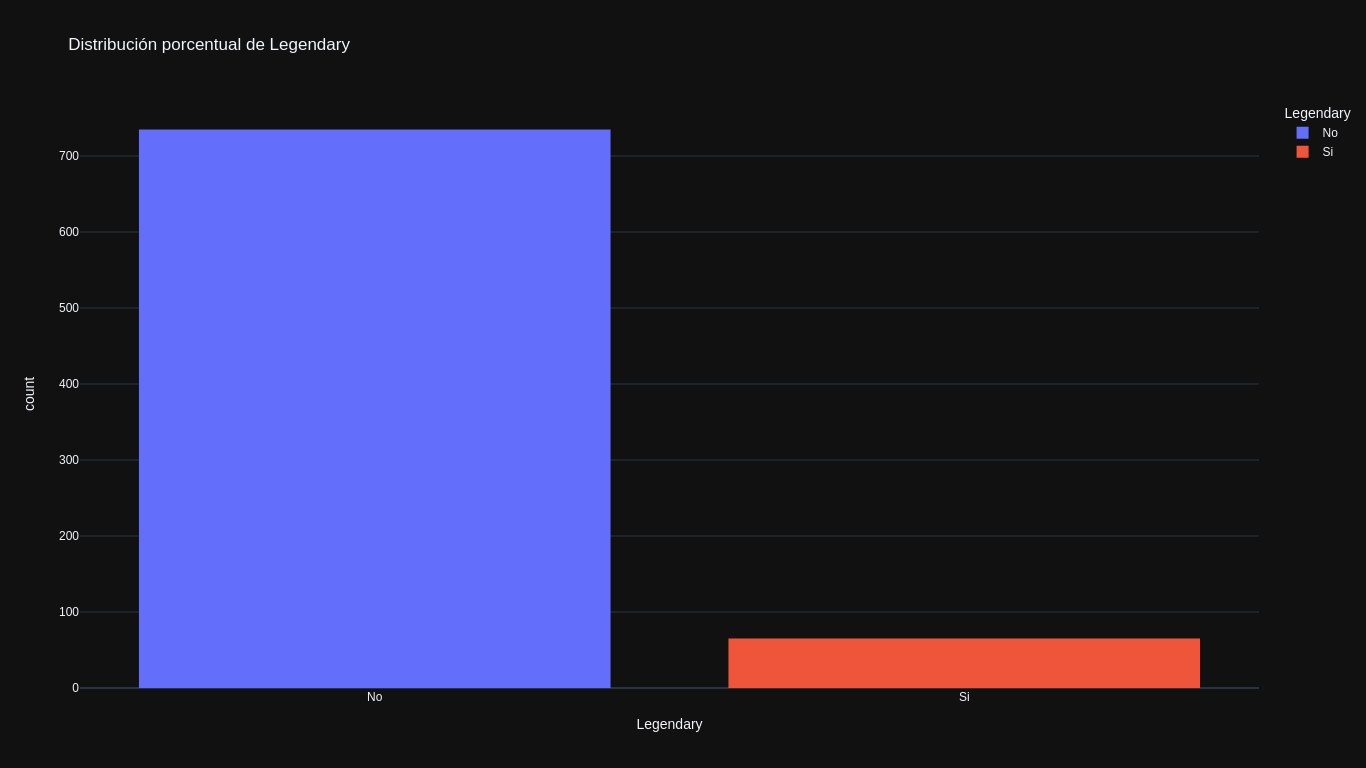

In [28]:
fig = px.histogram(df, 
                   x="Legendary",
                   color="Legendary",
                   labels = dict(count="A", Legendary="Legendary"),
                   title="Distribución porcentual de Legendary" 
                   )
# fig.show()
fig.show("png")

Se puede visualizar que la variable "target" esta desbalanceada. Hay solo un %8,125 de pokemons Legendarios, siendo 65 de 800 pokemons.

### ANALISIS BIVARIADO

#### Matriz de Correlación

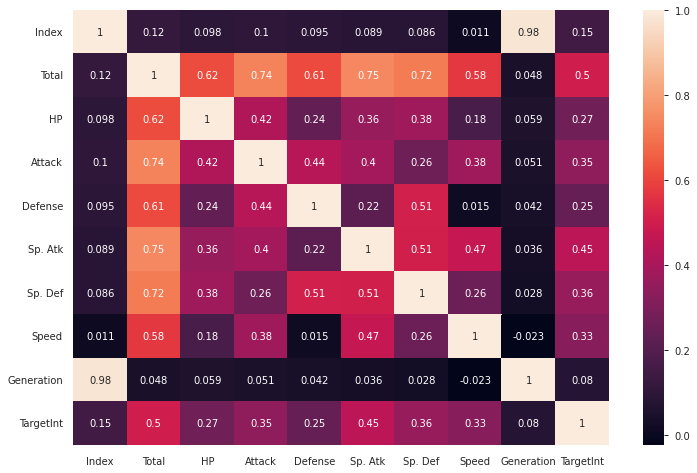

In [29]:
plt.figure(figsize=(12, 8))

vg_corr = df.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

Del heatmap se desprende que no hay una que no hay una gran correlacion entre los atributos de los pokemons.

Se pueden visualizar las correlaciones mas significativas (mayor a 0.7) entre "Total" y los atributos "Special Attack", "Attack", "Special Defense".

#### Analisis entre columna "Type 1" y "Legendary"

Se puede visualizar que la mayoria de los pokemons Legendarios son del tipo Psychic y Dragon.

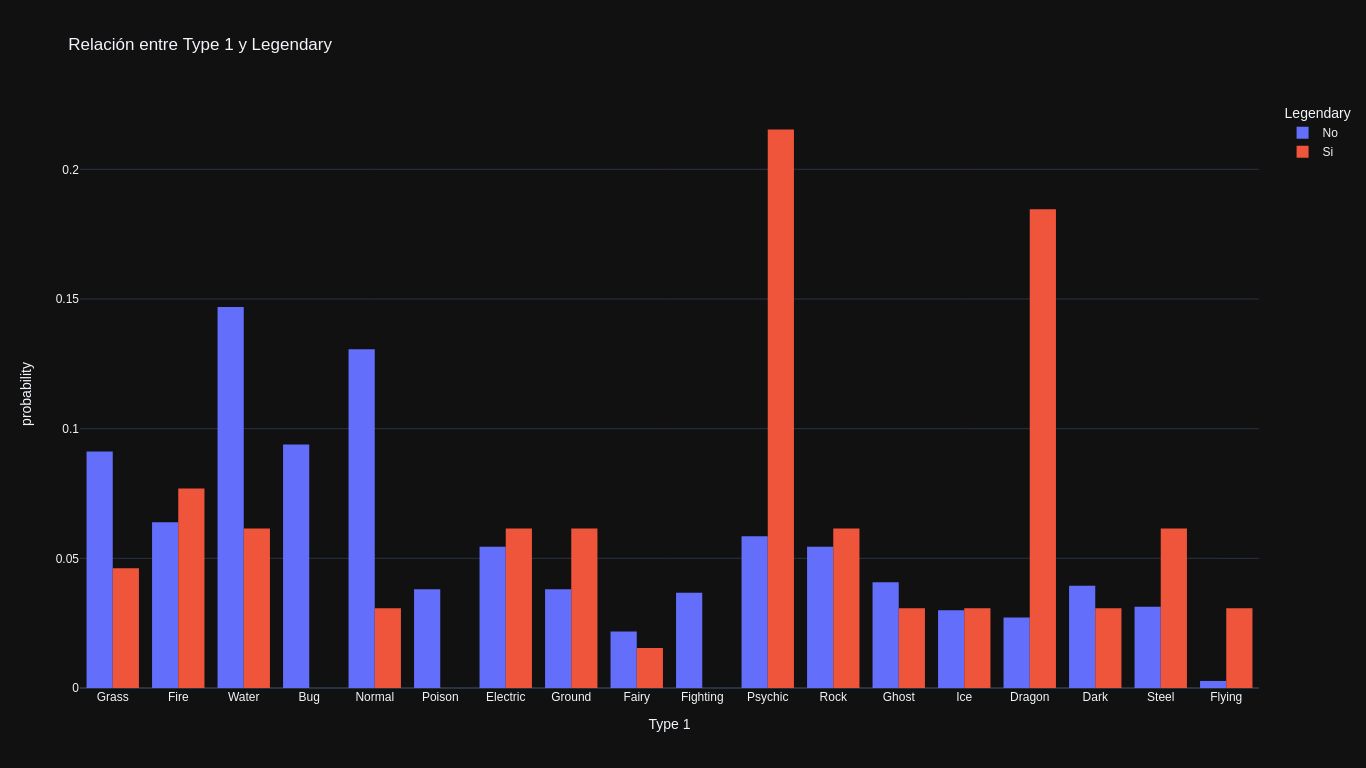

In [30]:
fig = px.histogram(
    df,
    x='type_1',
    color='Legendary',
    histnorm='probability',
    title="Relación entre Type 1 y Legendary",
    labels= dict(type_1="Type 1"),
    barmode="group"
)

# fig.show()
fig.show("png")

#### Analisis entre Generation y Legendary

No hay patrones identificables , siendo que las primeras 2 generaciones parecen tener menos pokemons legendarios que los demas casos.

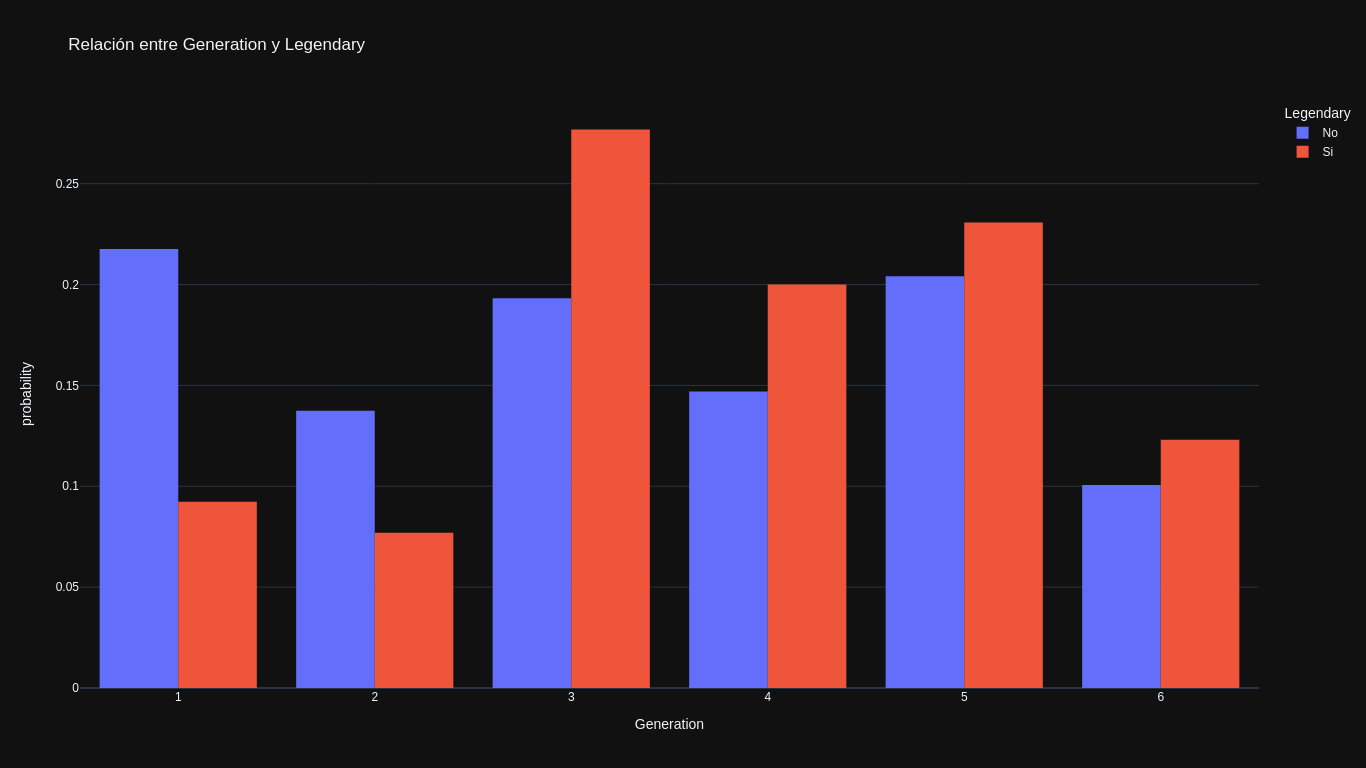

In [31]:
fig = px.histogram(
    df,
    x='Generation',
    color='Legendary',
    histnorm='probability',
    title="Relación entre Generation y Legendary",
    labels= dict(type_1="Type 1"),
    barmode="group"
)

# fig.show()
fig.show("png")

#### Analisis entre columna "Attack" y "Defense"
Se elige visualizar estas dos columnas para buscar la relación entre el nivel de ataque y defense de los pokemons.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject



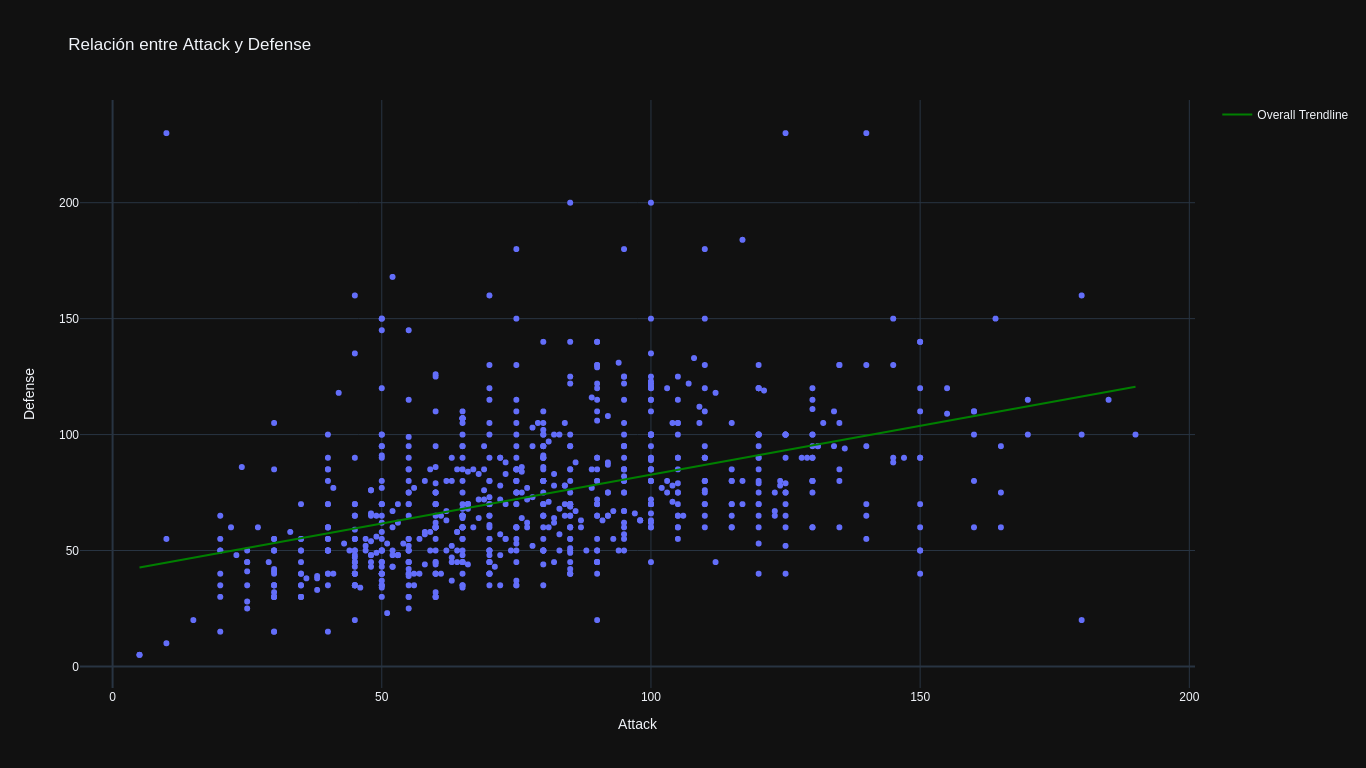

In [32]:
fig = px.scatter(
    df, 
    x="Attack", 
    y="Defense",
    hover_name="Name",
    trendline="ols",
    trendline_scope = 'overall',
    trendline_color_override = 'green',
    labels = dict(count="A", Legendary="Legendary"),
    title="Relación entre Attack y Defense" 
)
# fig.show()
fig.show("png")

Se puede visualizar una correlación media entre el ataque y defensa.

#### Analisis entre columna "Attack" y "Total"

Se elige visualizar estas dos columnas para buscar la relación entre el nivel de ataque y el nivel total de los pokemons.

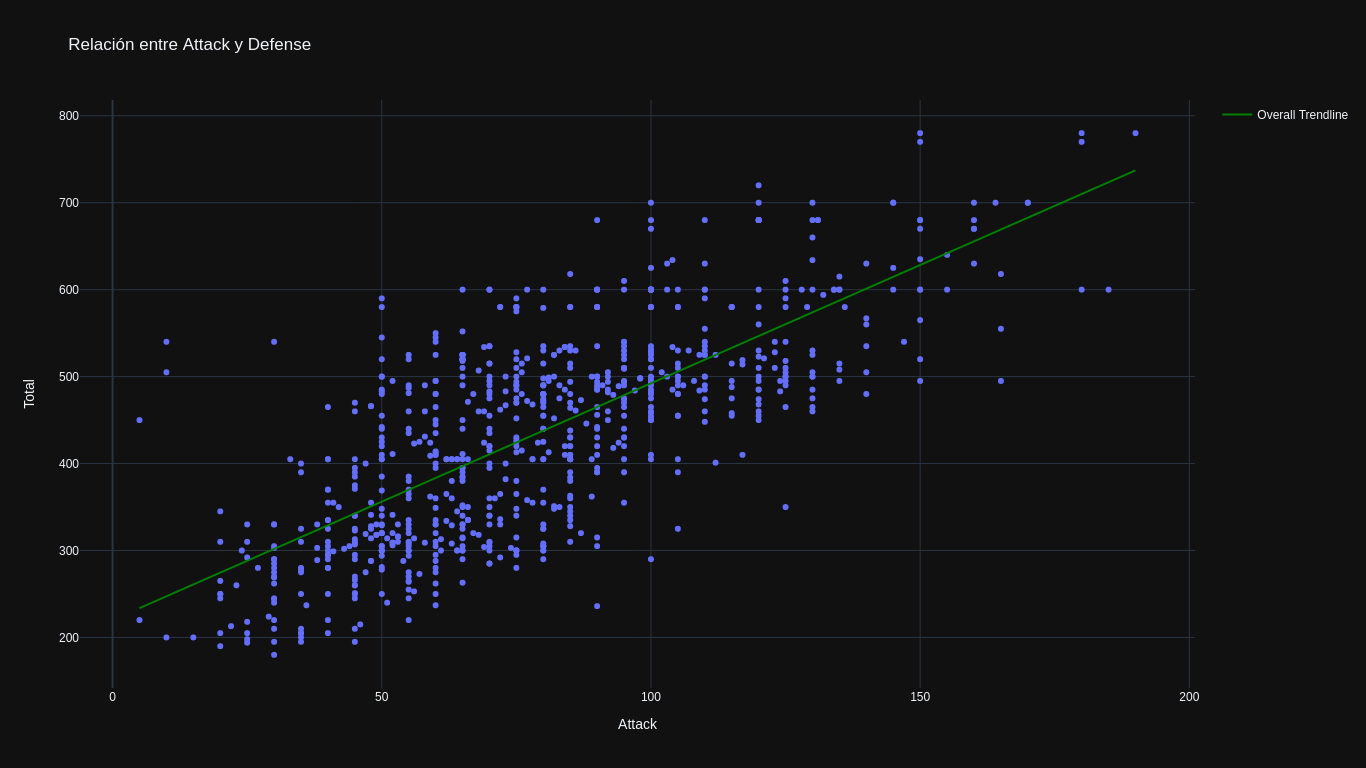

In [33]:
fig = px.scatter(
    df, 
    x="Attack", 
    y="Total",
    hover_name="Name",
    trendline="ols",
    trendline_scope = 'overall',
    trendline_color_override = 'green',
    title="Relación entre Attack y Defense" 
    )
# fig.show()
fig.show("png")

Se puede visualizar una correlación media-alta entre el ataque y el nivel total.

#### Analisis entre columna "Special Attack" y "Total"

Se elige visualizar estas dos columnas para buscar la relación entre el nivel de ataque especial y nivel total de los pokemons.

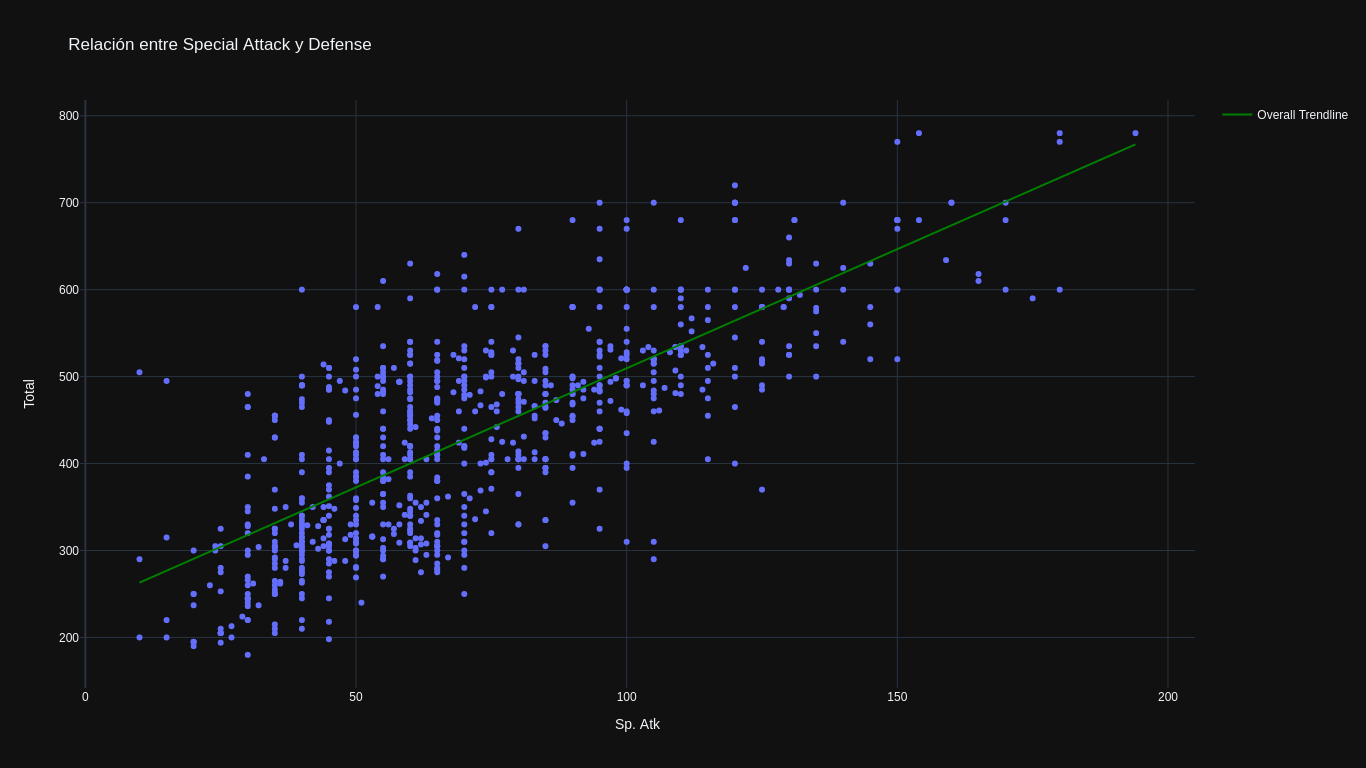

In [34]:
fig = px.scatter(
    df, 
    x="Sp. Atk", 
    y="Total",
    hover_name="Name",
    trendline="ols",
    trendline_scope = 'overall',
    trendline_color_override = 'green',
    title="Relación entre Special Attack y Defense" 
    )
# fig.show()
fig.show("png")

Se puede visualizar una correlación media-alta entre el ataque especial y el nivel total.

#### Analisis entre columna "Special Defense" y "Total"
Se elige visualizar estas dos columnas para buscar la relación entre el nivel de defensa especial y nivel total de los pokemons.

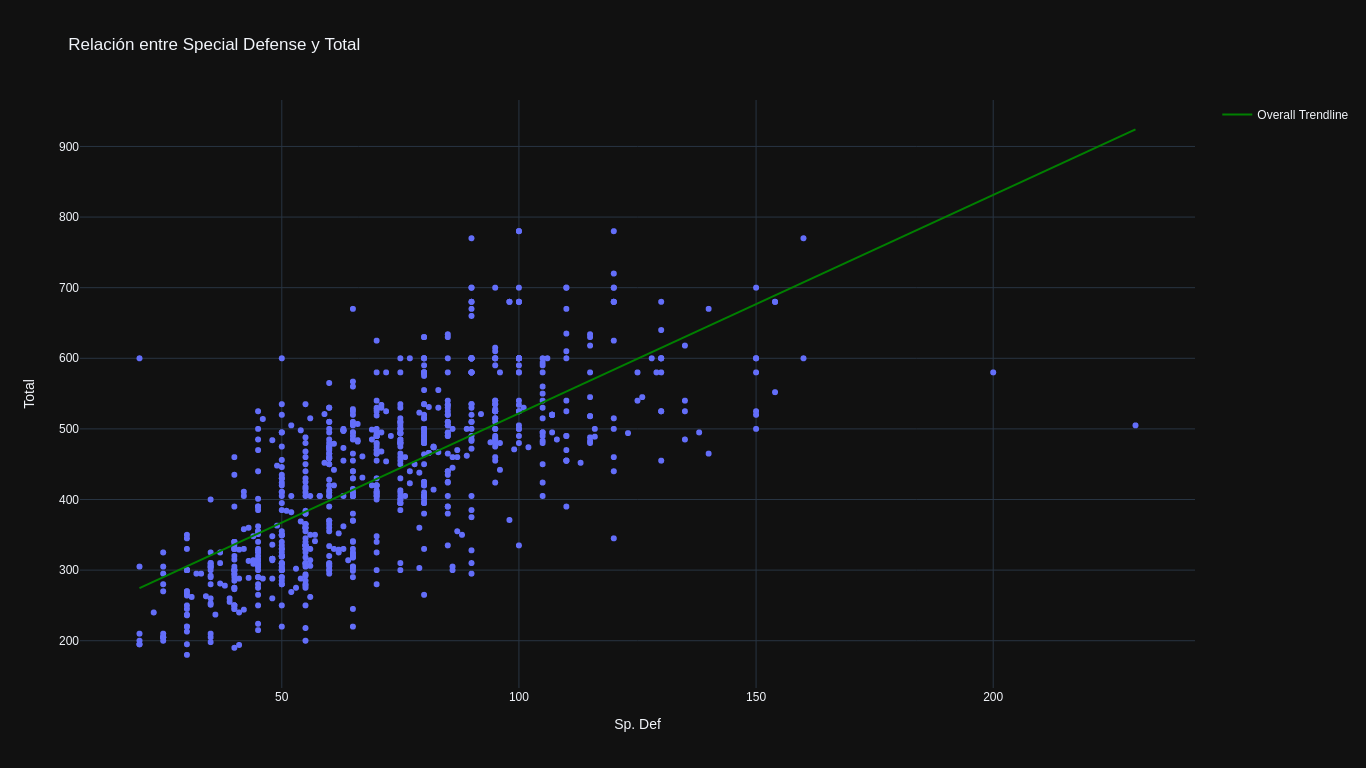

In [35]:
fig = px.scatter(
    df, 
    x="Sp. Def", 
    y="Total",
    hover_name="Name",
    trendline="ols",
    trendline_scope = 'overall',
    trendline_color_override = 'green',
        title="Relación entre Special Defense y Total" 
)
# fig.show()
fig.show("png")

Se puede visualizar una correlación media-alta entre la defensa especial y el nivel total.

#### Analisis entre columna "Special Attack" y "Special Defense"
Se elige visualizar estas dos columnas para buscar la relación entre el nivel de ataque especial y el valor total de los pokemons.

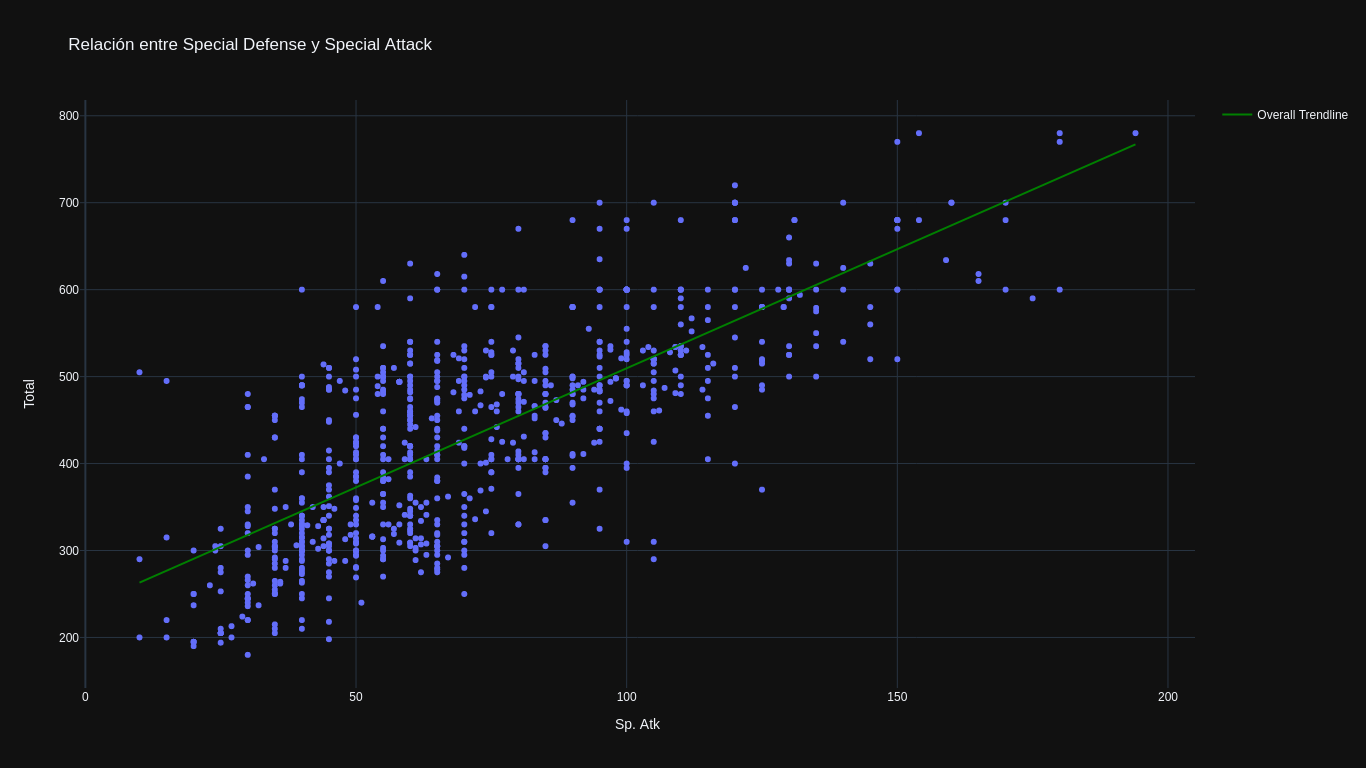

In [36]:
fig = px.scatter(
    df, 
    x="Sp. Atk", 
    y="Total",
    hover_name="Name",
    trendline="ols",
    trendline_scope = 'overall',
    trendline_color_override = 'green',
            title="Relación entre Special Defense y Special Attack" 

)
# fig.show()
fig.show("png")

Se puede visualizar una correlacion media (>0,55) entre Total y Ataque Especial. 
Con la propiedad Color de Plotly se puede visualizar la distribución de pokemons Legendarios dentro del scatter.


### ANALISIS MULTIVARIADO

#### Analisis entre columna "Attack", "Defense", "Total" y "Legendary"

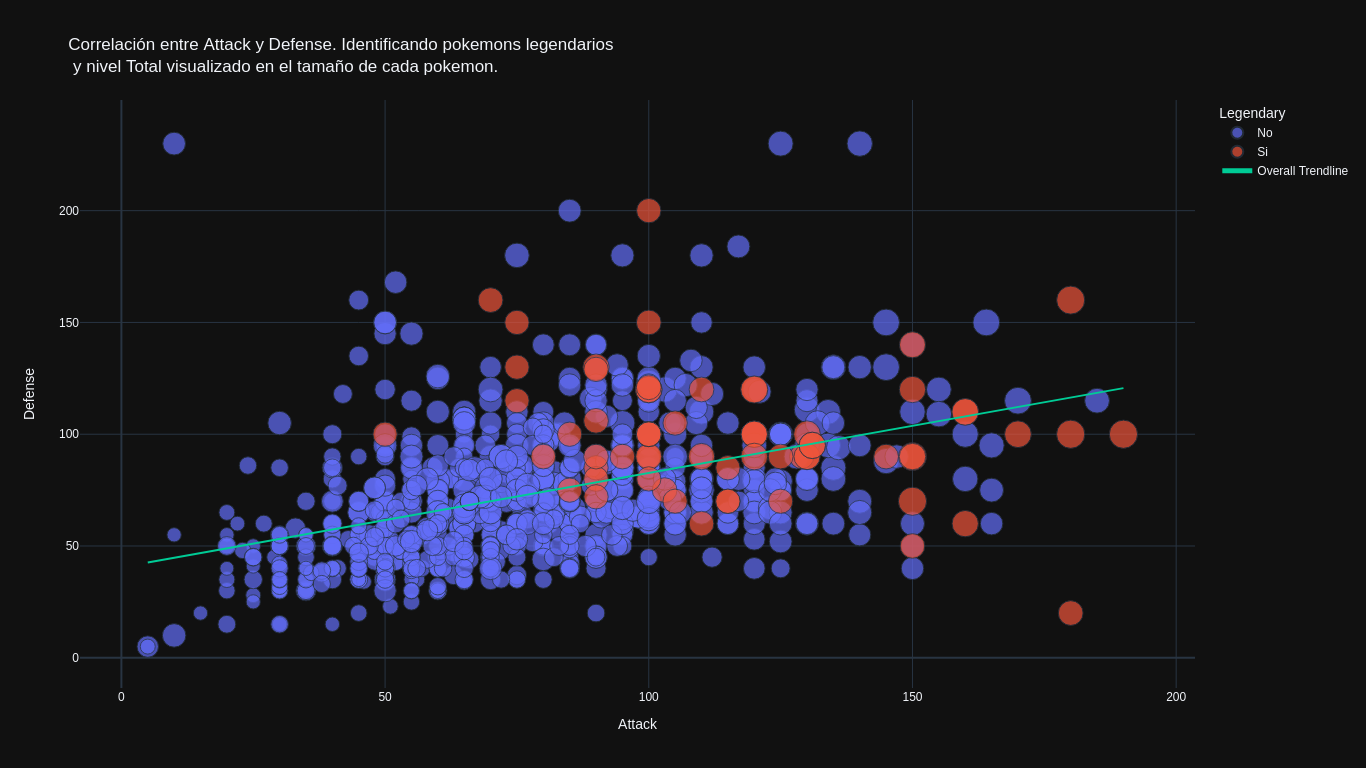

In [37]:
fig = px.scatter(df, 
                 title="Correlación entre Attack y Defense. Identificando pokemons legendarios</br></br> y nivel Total visualizado en el tamaño de cada pokemon.",
                 x="Attack",
                 y="Defense",
                 hover_name="Name",
                 color='Legendary',
                 size='Total',
                 trendline="ols",
                 trendline_scope = 'overall',
                 )
# fig.show()
fig.show("png")

Se muestra la correlación entre Attack y Defense, ahora ampliando el analisis al clasificar por el valor "Legendary" y tamaño representa el valor de "Total".

#### Analisis entre columna "Attack", "Total" y "Legendary"

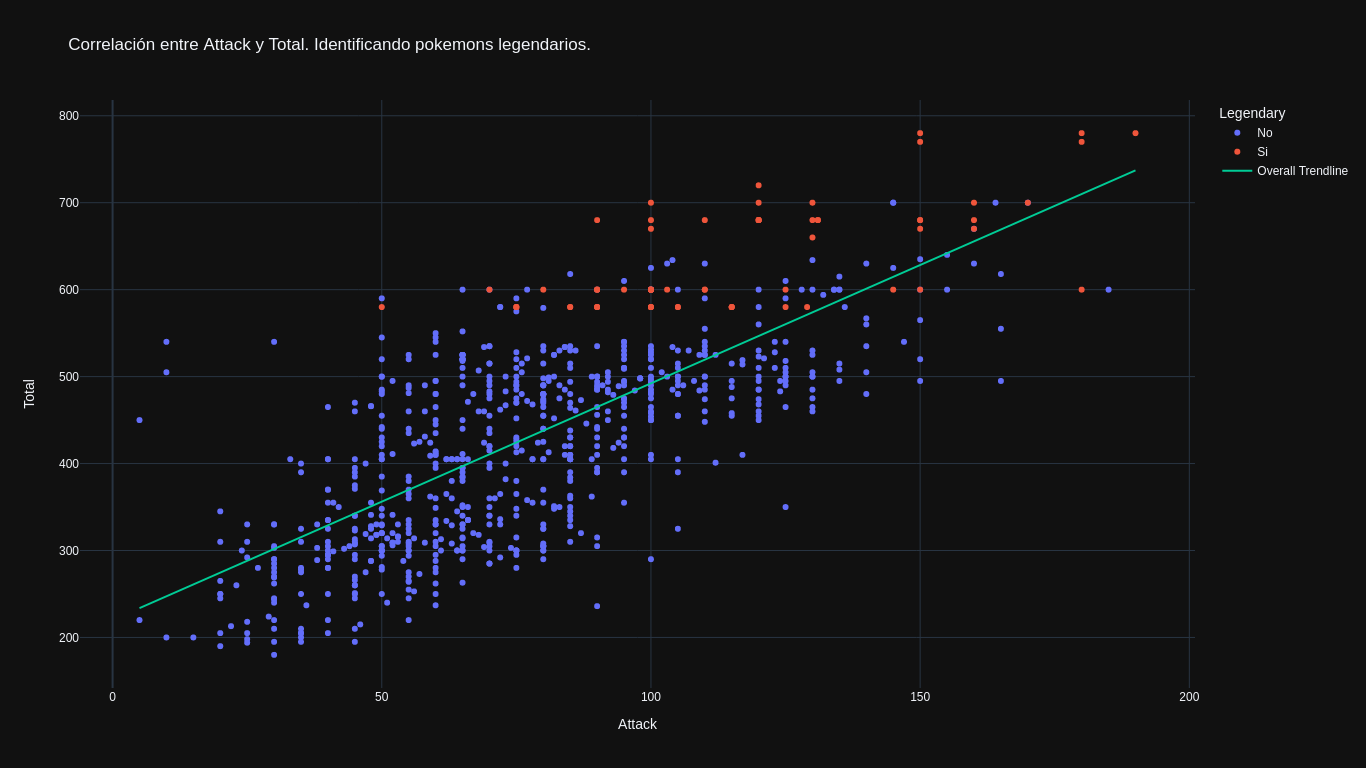

In [38]:
fig = px.scatter(df, 
                 title="Correlación entre Attack y Total. Identificando pokemons legendarios.",
                 x="Attack",
                 y="Total",
                 hover_name="Name",
                 color='Legendary',
                #  size='HP',
                 trendline="ols",
                 trendline_scope = 'overall',
                 )
# fig.show()
fig.show("png")

Se puede visualizar que los pokemons legendarios se encuentran ubicados en valores "Total" a partir de los 580. En el caso de "Attack" los valores comienzan de los 50 en adelante. 

#### Analisis entre columna "Special Attack", "Total" y "Legendary"

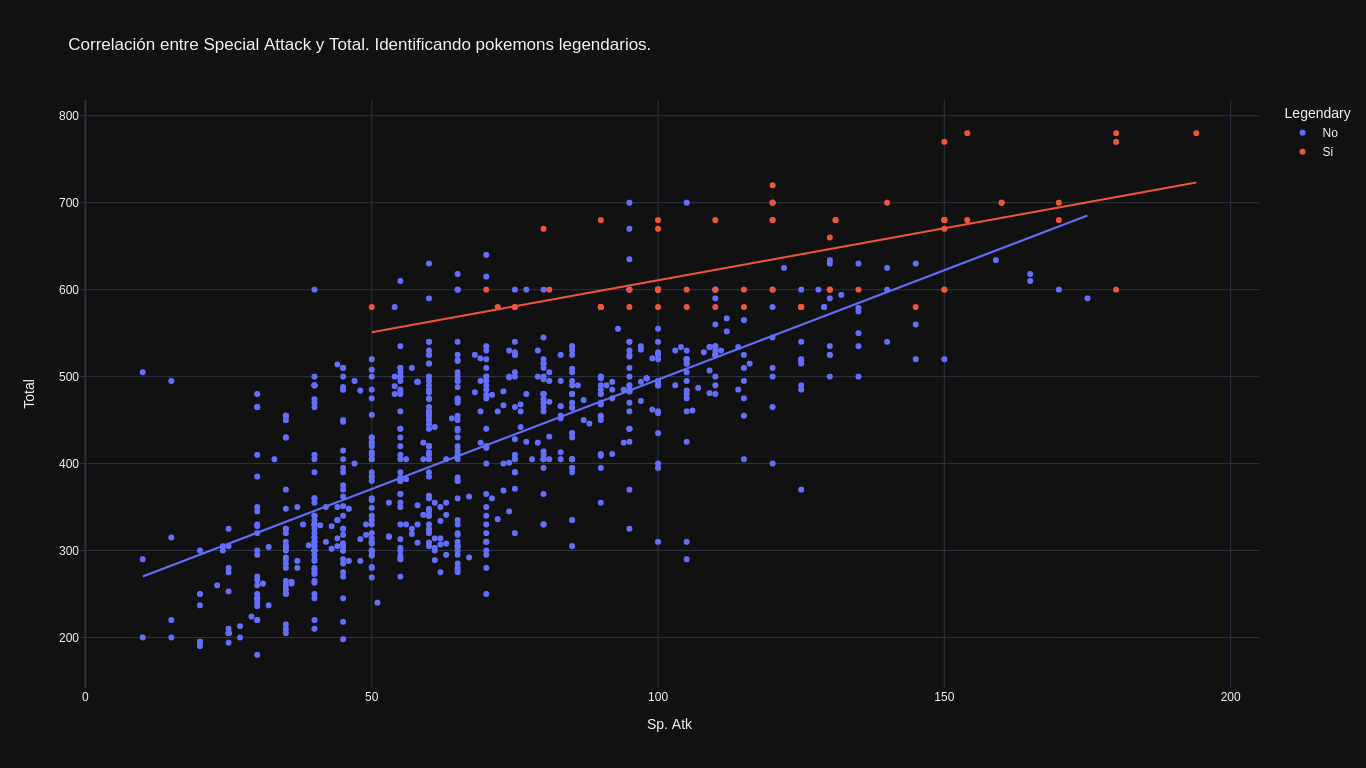

In [39]:
  fig = px.scatter(df, 
                 title="Correlación entre Special Attack y Total. Identificando pokemons legendarios.",
                 x="Sp. Atk", 
                 y="Total",
                 hover_name="Name",
                 color='Legendary',
                #  size='HP',
                 trendline="ols",
                #  trendline_scope = 'overall',
                 )
# fig.show()
fig.show("png") 

En esta ocasión se apertura la linea de tendencia para entender cual es el R² para los pokemons Lengendarios, notando que tiene un R² menor a los pokemons no legendarios. 

#### Analisis entre columna "Special Defense", "Total" y "Legendary"



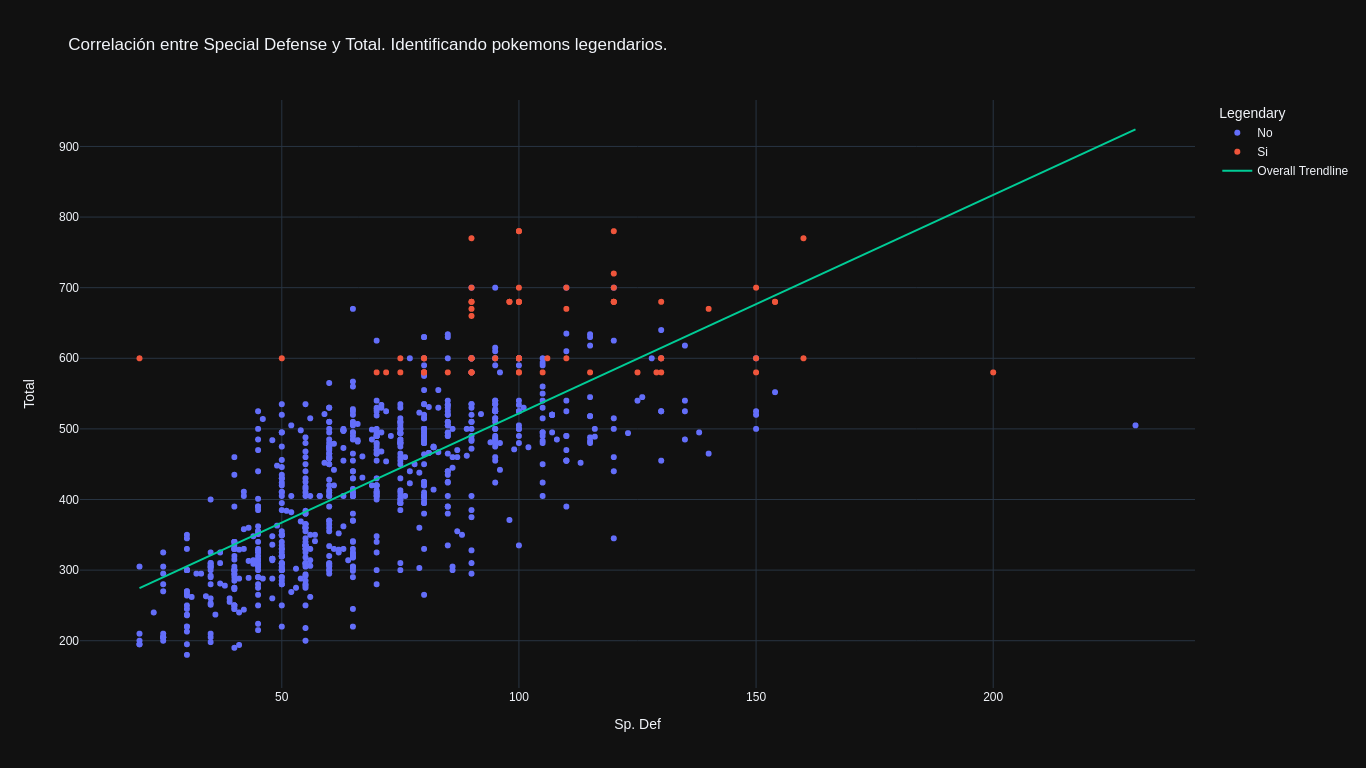

In [40]:
  fig = px.scatter(df, 
                 title="Correlación entre Special Defense y Total. Identificando pokemons legendarios.",
                 x="Sp. Def", 
                 y="Total",
                 hover_name="Name",
                 color='Legendary',
                #  size='HP',
                 trendline="ols",
                 trendline_scope = 'overall',
                 )
# fig.show()
fig.show("png")

Se puede visualizar que los valores "Special Defense" que toman los pokemons legendarios varian desde 20 a casi 200. 

#### Analisis entre columnas "Special Attack", "Special Defense" y "Legendary" 

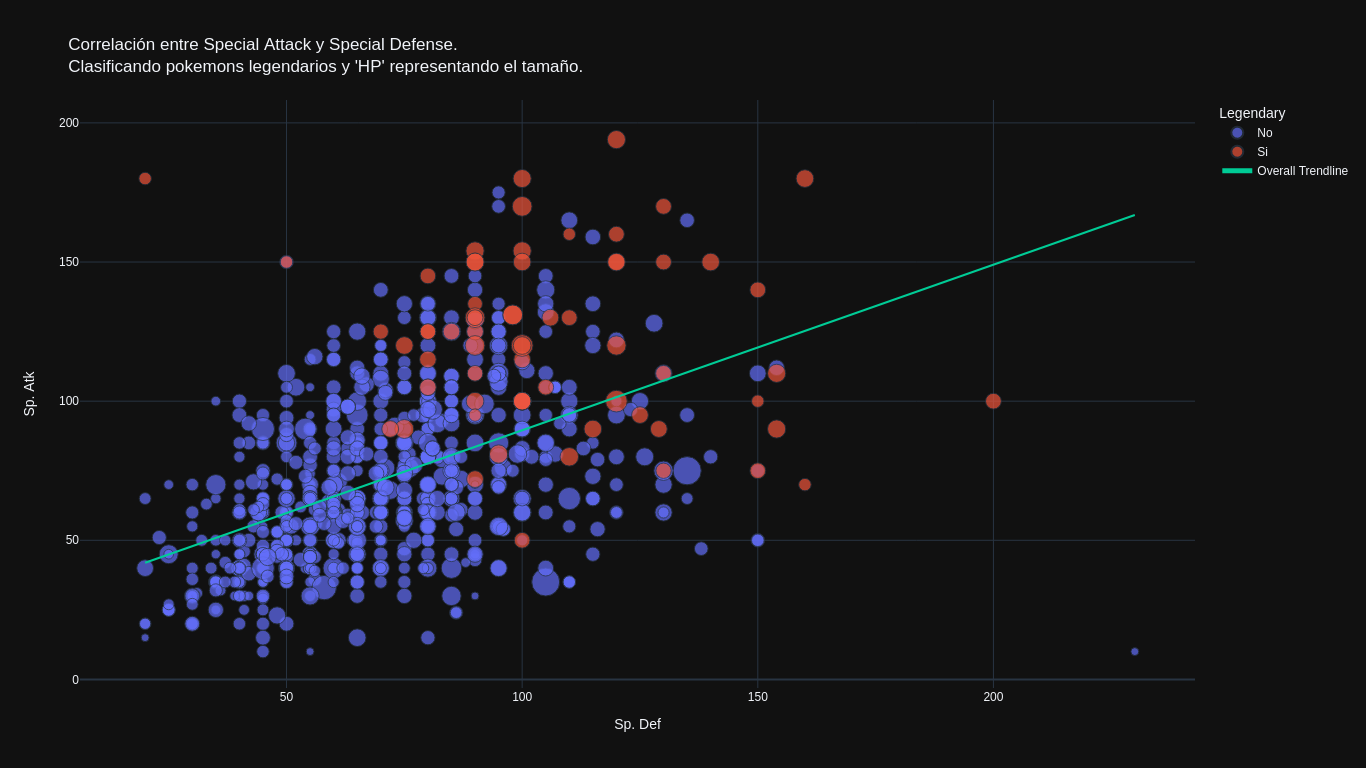

In [41]:
fig = px.scatter(df, 
                 title="Correlación entre Special Attack y Special Defense. </br></br>Clasificando pokemons legendarios y 'HP' representando el tamaño.",
                 x="Sp. Def", 
                 y="Sp. Atk",
                 hover_name="Name",
                 color='Legendary',
                 size='HP',
                 trendline="ols",
                 trendline_scope = 'overall',
                 )
# fig.show()
fig.show("png")

Se visualiza la correlación entre Special Attack y Special defense, clasificando los pokemons por "Legendary" y "HP" representando el tamaño.

<hr>

# Conclusión Exploratory Data Analysis

Tras el análisis exploratorio, se pudo determinar que no todas las variables seran utiles a fin de lograr la detección de los Pokemons Legendarios.

Se decide utilizar dos subgrupos de columnas para buscar cual performa mejor. Tambien se propone utilizar PCA y PCA Standard.

* **Grupo 1**: Se propone utilizar las columnas "Total" y "Sp. Attack". Siendo las que tienen los mayores valores de correlación.

* **Grupo 2**: Se propone utilizar la columna "type_1" (tipo de pokemon) junto a las columnas "Total" y "Sp. Attack". 

* **Grupo PCA**: Se propone realizar un PCA utilizando todas las columnas que describen las cualidades de un pokemon.

* **Grupo PCA Standard**: Se propone realizar un standarizado de las columnas para ver si performa mejor que un PCA normal.

## Carga de librerias

In [42]:
from sklearn.model_selection import train_test_split #Importando la libreria para separar en train y test
from sklearn.tree import DecisionTreeClassifier #Importando el modelo Decision Tree
from sklearn.neighbors import KNeighborsClassifier # Importando el modelo KKN 
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.linear_model import LogisticRegression # Regresión logística
from sklearn import decomposition #PCA
from sklearn.linear_model import LinearRegression # Regresión Lineal
from sklearn.svm import SVC # Support Vector Machines
import xgboost as xgb # XGBoost
from sklearn.ensemble import AdaBoostClassifier # Adaboost
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boost
import lightgbm as lgb # LightGBM
from sklearn.model_selection import StratifiedKFold # StratifiedKFold
from sklearn.model_selection import GridSearchCV # GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

box = {}

/usr/local/lib/python3.7/dist-packages/lightgbm/__init__.py:30: ResourceWarning:

unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/lightgbm/VERSION.txt' mode='r' encoding='UTF-8'>



## Preparación subgrupos de dataset

In [43]:
rnd_state = 42

In [44]:
def convertType(x):
  return df_type_1[df_type_1[0]==x].index.item()

df_type_1 = pd.DataFrame(df.type_1.unique()).reset_index()

In [45]:
df_type = df.type_1

df_sel = df[[ "Total", "Sp. Atk"]]

df_sel_2 = df[["Total", "Sp. Atk"]] # 
df_sel_2['type_1_int'] = df.type_1.apply(lambda x: convertType(x))

df_target = df[["TargetInt"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
df_sel.sample(1)

,Total,Sp. Atk
476,580,54


### PCA
Se determina utilizar todas las variables que explican las cualidades de batalla de un pokemon, sobre las que tienen mejor correlación con la variable target. 

In [47]:
df_sel_pca = df[[ "Total", "Sp. Atk", "Attack", "Defense","Sp. Def", "Speed"]]
X = df_sel_pca

len(df_sel_pca.columns)

pca = decomposition.PCA(n_components=len(df_sel_pca.columns))
pca.fit(X)
X = pca.transform(X)
df_pca = pd.DataFrame(X , columns = df_sel_pca.columns)

sc = StandardScaler() ## Standarizador de valores

# Explicación de la varianza de las componentes
explained_variance = pca.explained_variance_ratio_
pd.DataFrame(explained_variance)

,0
0,0.869577
1,0.052639
2,0.038115
3,0.022227
4,0.014091
5,0.003351


In [48]:
df_sel_pca = df[[ "Total", "Sp. Atk", "Attack", "Defense","Sp. Def", "Speed"]]
X = df_sel_pca

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
df_pca = pd.DataFrame(X , columns = ['PC1','PC2'])

# Explicación de la varianza de las componentes
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.86957717, 0.05263853])

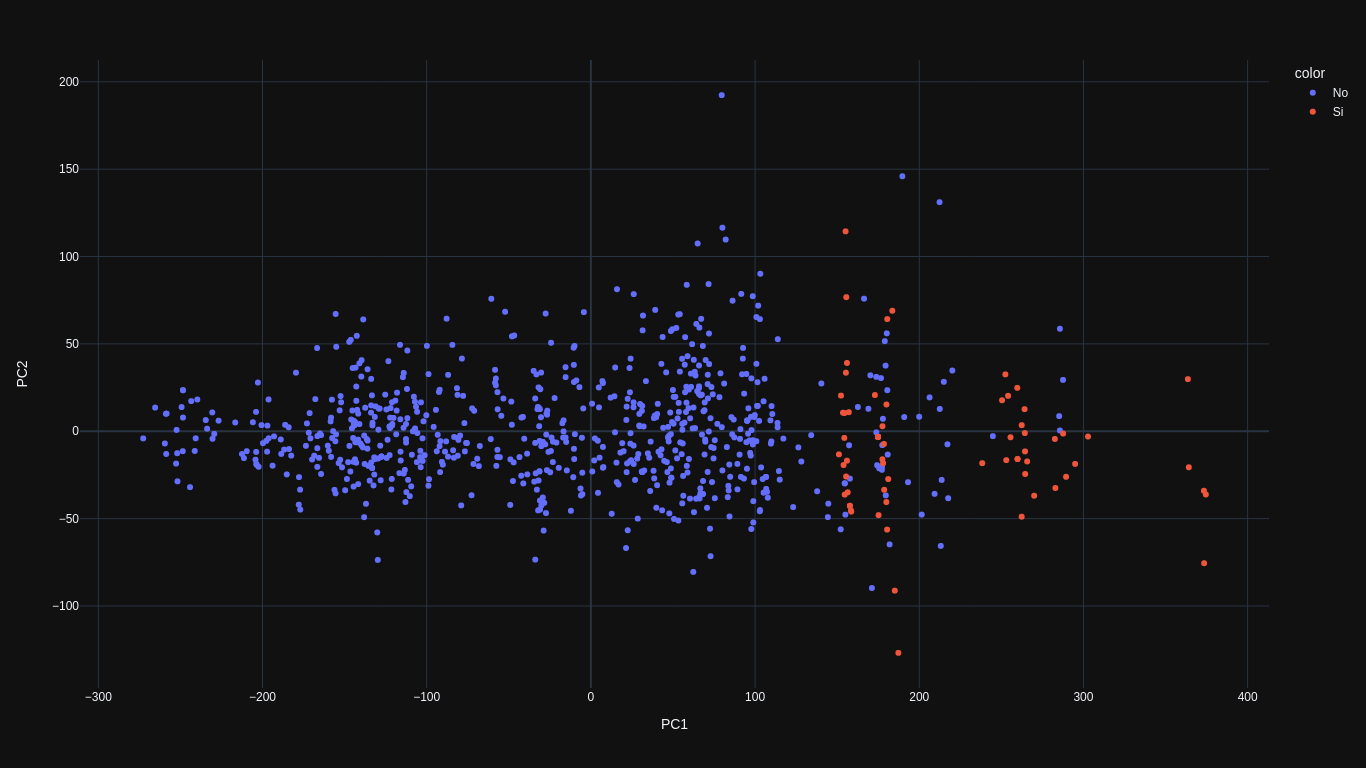

In [49]:
fig = px.scatter( 
    df_pca,
    x = "PC1",
    y = "PC2",
    color = df["Legendary"]
)

fig.show("png")

In [50]:
strtf_kflod = StratifiedKFold(n_splits=5, random_state = rnd_state, shuffle=True)

scoring_list = { "accuracy":"accuracy", "recall":"recall", "precision":"precision", "f1":"f1"}

<hr>

# Modelos con parametros estandard 

## Decision Tree

### Grupo 1: Total y Spc. Attack

In [51]:
# Definimos los datos para el analisis
X = df_sel
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Entrenamos el modelo
tree = DecisionTreeClassifier(random_state = rnd_state) #Creamos el modelo

#Entrenamos el modelo
tree.fit(X_train,y_train) #Entrenamos el modelo

y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(test_accuracy,test_recall,test_precision,test_f1)

grupo_1_dsc_tree_train_accuracy = train_accuracy
grupo_1_dsc_tree_test_accuracy = test_accuracy
grupo_1_dsc_tree_train_recall = train_recall
grupo_1_dsc_tree_test_recall = test_recall
grupo_1_dsc_tree_train_precision = train_precision
grupo_1_dsc_tree_test_precision = test_precision
grupo_1_dsc_tree_train_f1 = train_f1
grupo_1_dsc_tree_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

0.9583333333333334 0.8947368421052632 0.68 0.7727272727272727
              precision    recall  f1-score   support

      Normal       0.99      0.96      0.98       221
  Legendario       0.68      0.89      0.77        19

    accuracy                           0.96       240
   macro avg       0.84      0.93      0.87       240
weighted avg       0.97      0.96      0.96       240



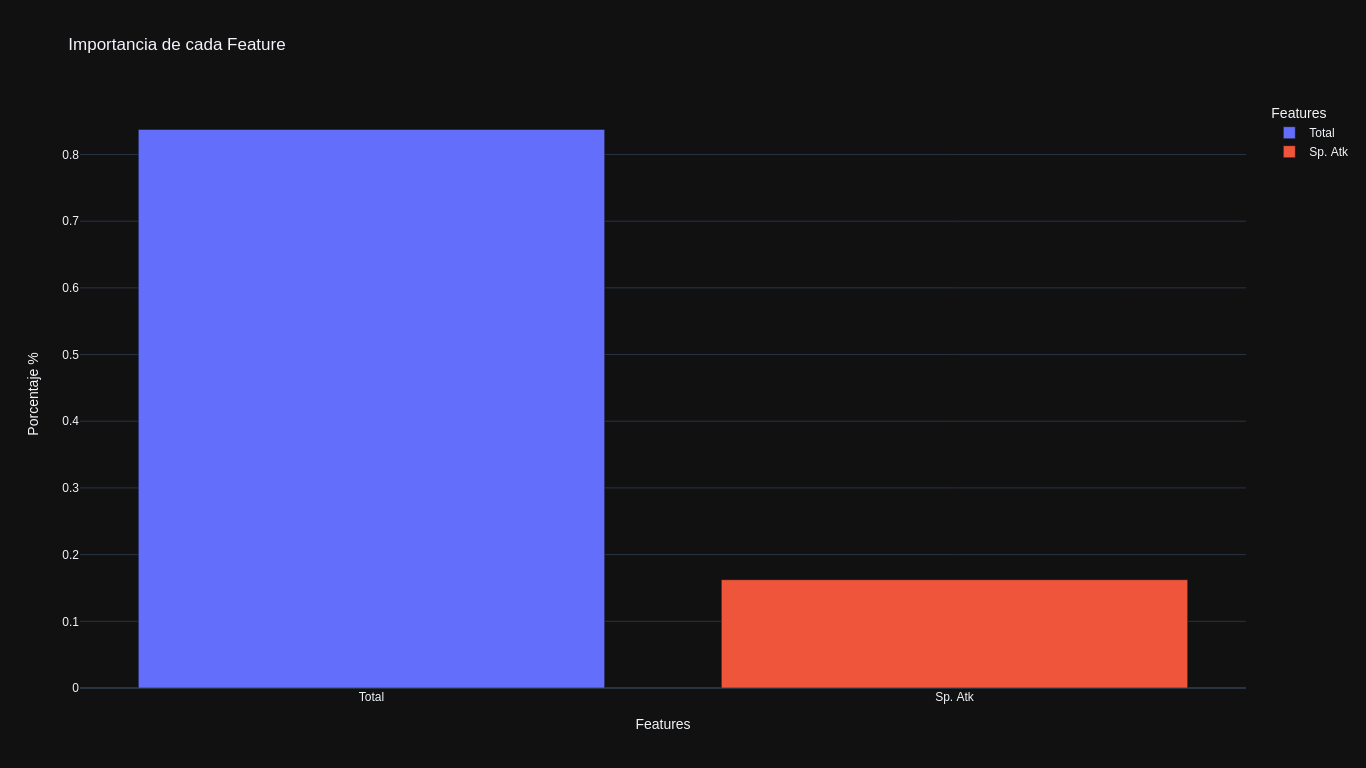

In [52]:
fig = px.bar(
    x = df_sel.columns,
    y = tree.feature_importances_,
    color = df_sel.columns,
    title = "Importancia de cada Feature",
    labels= dict(x="Features", y="Porcentaje %", color="Features")
)
fig.show("png")

### Grupo 2: type_1, Total y Sp. Attack


In [53]:
# Definimos los datos para el analisis
X = df_sel_2
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y) 

tree = DecisionTreeClassifier(random_state = rnd_state) #Creamos el modelo

#Entrenamos el modelo
tree.fit(X_train,y_train) #Entrenamos el modelo

y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_2_dsc_tree_train_accuracy = train_accuracy
grupo_2_dsc_tree_test_accuracy = test_accuracy
grupo_2_dsc_tree_train_recall = train_recall
grupo_2_dsc_tree_test_recall = test_recall
grupo_2_dsc_tree_train_precision = train_precision
grupo_2_dsc_tree_test_precision = test_precision
grupo_2_dsc_tree_train_f1 = train_f1
grupo_2_dsc_tree_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.97      0.96      0.97       221
  Legendario       0.62      0.68      0.65        19

    accuracy                           0.94       240
   macro avg       0.80      0.82      0.81       240
weighted avg       0.94      0.94      0.94       240



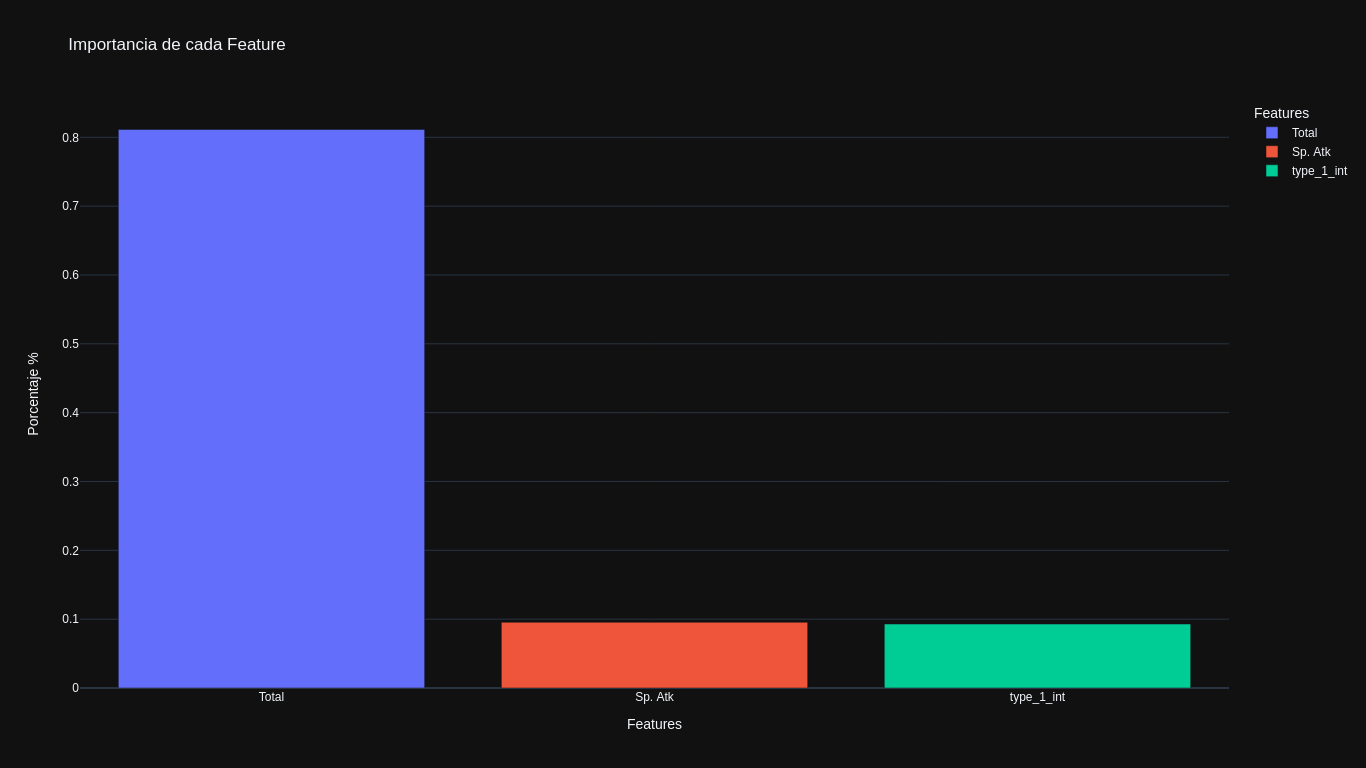

In [54]:
fig = px.bar(
    x = df_sel_2.columns,
    y = tree.feature_importances_,
    color = df_sel_2.columns,
    title = "Importancia de cada Feature",
    labels= dict(x="Features", y="Porcentaje %", color="Features")
)
fig.show("png")

### Grupo PCA

In [55]:
# Definimos los datos para el analisis
X = df_pca
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y) 

#Entrenamos el modelo
tree = DecisionTreeClassifier(random_state = rnd_state) #Creamos el modelo
tree.fit(X_train,y_train) #Entrenamos el modelo

y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_dsc_tree_train_accuracy = train_accuracy
grupo_pca_dsc_tree_test_accuracy = test_accuracy
grupo_pca_dsc_tree_train_recall = train_recall
grupo_pca_dsc_tree_test_recall = test_recall
grupo_pca_dsc_tree_train_precision = train_precision
grupo_pca_dsc_tree_test_precision = test_precision
grupo_pca_dsc_tree_train_f1 = train_f1
grupo_pca_dsc_tree_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       1.00      0.97      0.98       221
  Legendario       0.72      0.95      0.82        19

    accuracy                           0.97       240
   macro avg       0.86      0.96      0.90       240
weighted avg       0.97      0.97      0.97       240



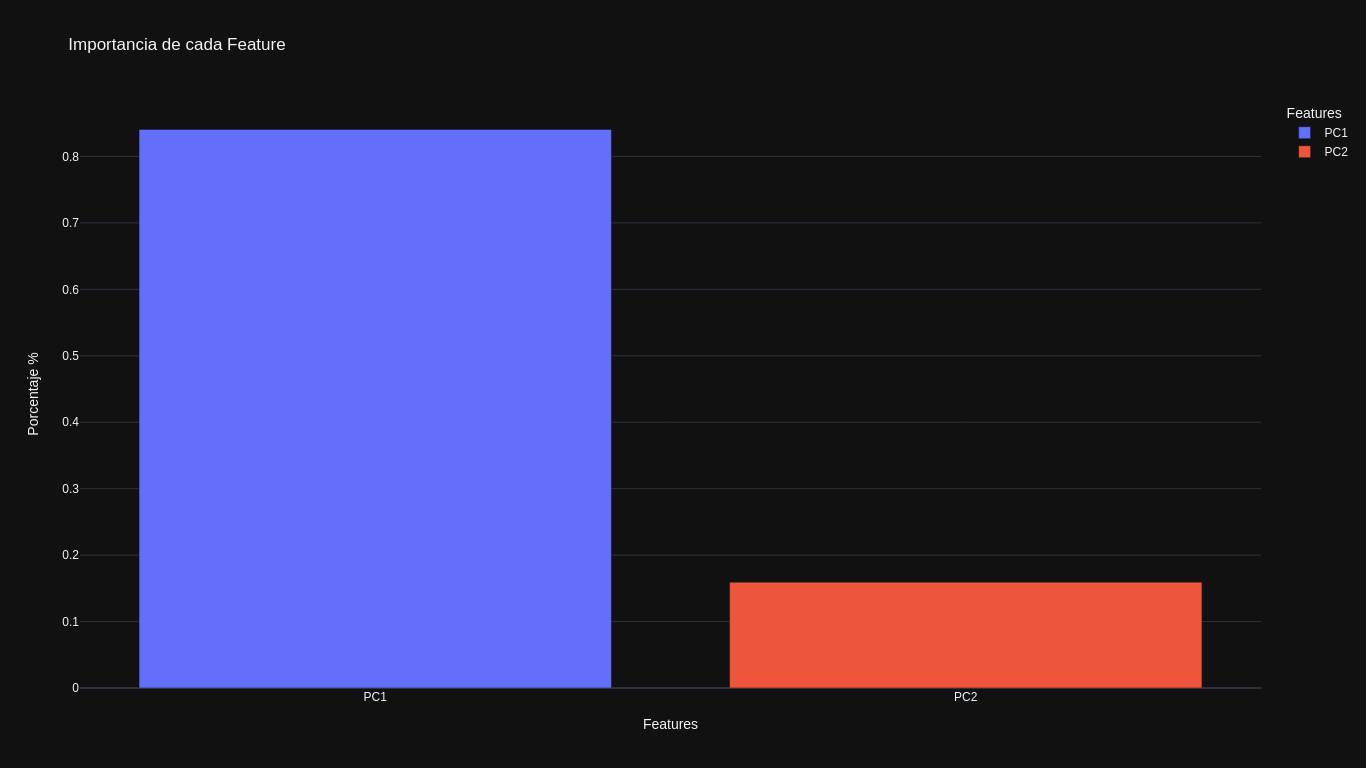

In [56]:
fig = px.bar(
    x = df_pca.columns,
    y = tree.feature_importances_,
    color = df_pca.columns,
    title = "Importancia de cada Feature",
    labels= dict(x="Features", y="Porcentaje %", color="Features")
)
fig.show("png")

### Grupo PCA Standard

In [57]:
# Definimos los datos para el analisis
X = df_pca
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y) 

# Standarizar data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Entrenamos el modelo
tree = DecisionTreeClassifier(random_state = rnd_state) #Creamos el modelo

tree.fit(X_train,y_train) #Entrenamos el modelo

y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_std_dsc_tree_train_accuracy = train_accuracy
grupo_pca_std_dsc_tree_test_accuracy = test_accuracy
grupo_pca_std_dsc_tree_train_recall = train_recall
grupo_pca_std_dsc_tree_test_recall = test_recall
grupo_pca_std_dsc_tree_train_precision = train_precision
grupo_pca_std_dsc_tree_test_precision = test_precision
grupo_pca_std_dsc_tree_train_f1 = train_f1
grupo_pca_std_dsc_tree_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       1.00      0.97      0.98       221
  Legendario       0.72      0.95      0.82        19

    accuracy                           0.97       240
   macro avg       0.86      0.96      0.90       240
weighted avg       0.97      0.97      0.97       240



## KNN

### Grupo 1: Total y Spc. Attack

In [58]:
# Definimos los datos para el analisis
X = df_sel
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

y_train_pred = knn.predict(X_train) #Prediccion en Train
y_test_pred = knn.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_1_knn_train_accuracy = train_accuracy
grupo_1_knn_test_accuracy = test_accuracy
grupo_1_knn_train_recall = train_recall
grupo_1_knn_test_recall = test_recall
grupo_1_knn_train_precision = train_precision
grupo_1_knn_test_precision = test_precision
grupo_1_knn_train_f1 = train_f1
grupo_1_knn_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.98      0.95      0.97       221
  Legendario       0.58      0.79      0.67        19

    accuracy                           0.94       240
   macro avg       0.78      0.87      0.82       240
weighted avg       0.95      0.94      0.94       240



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



### Grupo 2: type_1, Total y Sp. Attack


In [59]:
# Definimos los datos para el analisis
X = df_sel_2
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

y_train_pred = knn.predict(X_train) #Prediccion en Train
y_test_pred = knn.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_2_knn_train_accuracy = train_accuracy
grupo_2_knn_test_accuracy = test_accuracy
grupo_2_knn_train_recall = train_recall
grupo_2_knn_test_recall = test_recall
grupo_2_knn_train_precision = train_precision
grupo_2_knn_test_precision = test_precision
grupo_2_knn_train_f1 = train_f1
grupo_2_knn_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



              precision    recall  f1-score   support

      Normal       0.98      0.95      0.97       221
  Legendario       0.58      0.74      0.65        19

    accuracy                           0.94       240
   macro avg       0.78      0.85      0.81       240
weighted avg       0.95      0.94      0.94       240



### Grupo PCA

In [60]:
# Definimos los datos para el analisis
X = df_pca
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

y_train_pred = knn.predict(X_train) #Prediccion en Train
y_test_pred = knn.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_knn_train_accuracy = train_accuracy
grupo_pca_knn_test_accuracy = test_accuracy
grupo_pca_knn_train_recall = train_recall
grupo_pca_knn_test_recall = test_recall
grupo_pca_knn_train_precision = train_precision
grupo_pca_knn_test_precision = test_precision
grupo_pca_knn_train_f1 = train_f1
grupo_pca_knn_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.98      0.96      0.97       221
  Legendario       0.62      0.79      0.70        19

    accuracy                           0.95       240
   macro avg       0.80      0.87      0.83       240
weighted avg       0.95      0.95      0.95       240



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



### Grupo PCA Standard

In [61]:
# Definimos los datos para el analisis
X = df_pca
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

# Standarizar data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

y_train_pred = knn.predict(X_train) #Prediccion en Train
y_test_pred = knn.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_std_knn_train_accuracy = train_accuracy
grupo_pca_std_knn_test_accuracy = test_accuracy
grupo_pca_std_knn_train_recall = train_recall
grupo_pca_std_knn_test_recall = test_recall
grupo_pca_std_knn_train_precision = train_precision
grupo_pca_std_knn_test_precision = test_precision
grupo_pca_std_knn_train_f1 = train_f1
grupo_pca_std_knn_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



              precision    recall  f1-score   support

      Normal       0.97      0.96      0.96       221
  Legendario       0.57      0.63      0.60        19

    accuracy                           0.93       240
   macro avg       0.77      0.80      0.78       240
weighted avg       0.94      0.93      0.93       240



## Random Forest

### Grupo 1: Total y Spc. Attack

In [62]:
# Definimos los datos para el analisis
X = df_sel
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos un random forest
model = RandomForestClassifier(random_state = rnd_state)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train) #Prediccion en Train
y_test_pred = model.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_1_rnd_frst_train_accuracy = train_accuracy
grupo_1_rnd_frst_test_accuracy = test_accuracy
grupo_1_rnd_frst_train_recall = train_recall
grupo_1_rnd_frst_test_recall = test_recall
grupo_1_rnd_frst_train_precision = train_precision
grupo_1_rnd_frst_test_precision = test_precision
grupo_1_rnd_frst_train_f1 = train_f1
grupo_1_rnd_frst_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



              precision    recall  f1-score   support

      Normal       0.99      0.96      0.97       221
  Legendario       0.65      0.89      0.76        19

    accuracy                           0.95       240
   macro avg       0.82      0.93      0.87       240
weighted avg       0.96      0.95      0.96       240



### Grupo 2: type_1, Total y Sp. Attack

In [63]:
# Definimos los datos para el analisis
X = df_sel_2
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos un random forest
model = RandomForestClassifier(random_state = rnd_state)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train) #Prediccion en Train
y_test_pred = model.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_2_rnd_frst_train_accuracy = train_accuracy
grupo_2_rnd_frst_test_accuracy = test_accuracy
grupo_2_rnd_frst_train_recall = train_recall
grupo_2_rnd_frst_test_recall = test_recall
grupo_2_rnd_frst_train_precision = train_precision
grupo_2_rnd_frst_test_precision = test_precision
grupo_2_rnd_frst_train_f1 = train_f1
grupo_2_rnd_frst_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



              precision    recall  f1-score   support

      Normal       0.99      0.94      0.96       221
  Legendario       0.53      0.84      0.65        19

    accuracy                           0.93       240
   macro avg       0.76      0.89      0.81       240
weighted avg       0.95      0.93      0.94       240



### Grupo PCA

In [64]:
# Definimos los datos para el analisis
X = df_pca
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos un random forest
model = RandomForestClassifier(random_state = rnd_state)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train) #Prediccion en Train
y_test_pred = model.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_rnd_frst_train_accuracy = train_accuracy
grupo_pca_rnd_frst_test_accuracy = test_accuracy
grupo_pca_rnd_frst_train_recall = train_recall
grupo_pca_rnd_frst_test_recall = test_recall
grupo_pca_rnd_frst_train_precision = train_precision
grupo_pca_rnd_frst_test_precision = test_precision
grupo_pca_rnd_frst_train_f1 = train_f1
grupo_pca_rnd_frst_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



              precision    recall  f1-score   support

      Normal       0.98      0.96      0.97       221
  Legendario       0.62      0.79      0.70        19

    accuracy                           0.95       240
   macro avg       0.80      0.87      0.83       240
weighted avg       0.95      0.95      0.95       240



### Grupo PCA Stardad

In [65]:
# Definimos los datos para el analisis
X = df_pca
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

# Standarizar data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Creamos un random forest
model = RandomForestClassifier(random_state = rnd_state)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train) #Prediccion en Train
y_test_pred = model.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_std_rnd_frst_train_accuracy = train_accuracy
grupo_pca_std_rnd_frst_test_accuracy = test_accuracy
grupo_pca_std_rnd_frst_train_recall = train_recall
grupo_pca_std_rnd_frst_test_recall = test_recall
grupo_pca_std_rnd_frst_train_precision = train_precision
grupo_pca_std_rnd_frst_test_precision = test_precision
grupo_pca_std_rnd_frst_train_f1 = train_f1
grupo_pca_std_rnd_frst_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



              precision    recall  f1-score   support

      Normal       0.98      0.96      0.97       221
  Legendario       0.62      0.79      0.70        19

    accuracy                           0.95       240
   macro avg       0.80      0.87      0.83       240
weighted avg       0.95      0.95      0.95       240



## Regresión logística

### Grupo 1: Total y Spc. Attack

In [66]:
# Definimos los datos para el analisis
X = df_sel
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo Regresión logística
regresion_logistica = LogisticRegression(random_state = rnd_state)

# Entrenamos la regresión logística con los datos de entrenamiento
regresion_logistica.fit(X_train, y_train)

y_train_pred = regresion_logistica.predict(X_train) #Prediccion en Train
y_test_pred = regresion_logistica.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_1_reglog_train_accuracy = train_accuracy
grupo_1_reglog_test_accuracy = test_accuracy
grupo_1_reglog_train_recall = train_recall
grupo_1_reglog_test_recall = test_recall
grupo_1_reglog_train_precision = train_precision
grupo_1_reglog_test_precision = test_precision
grupo_1_reglog_train_f1 = train_f1
grupo_1_reglog_test_f1 = test_f1

# print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))
print(model.get_params().keys())

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



### Grupo 2: type_1, Total y Sp. Attack

In [67]:
# Definimos los datos para el analisis
X = df_sel_2
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo Regresión logística
regresion_logistica = LogisticRegression(random_state = rnd_state)

# Entrenamos la regresión logística con los datos de entrenamiento
regresion_logistica.fit(X_train, y_train)

y_train_pred = regresion_logistica.predict(X_train) #Prediccion en Train
y_test_pred = regresion_logistica.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_2_reglog_train_accuracy = train_accuracy
grupo_2_reglog_test_accuracy = test_accuracy
grupo_2_reglog_train_recall = train_recall
grupo_2_reglog_test_recall = test_recall
grupo_2_reglog_train_precision = train_precision
grupo_2_reglog_test_precision = test_precision
grupo_2_reglog_train_f1 = train_f1
grupo_2_reglog_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.94      0.99      0.96       221
  Legendario       0.71      0.26      0.38        19

    accuracy                           0.93       240
   macro avg       0.83      0.63      0.67       240
weighted avg       0.92      0.93      0.92       240



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



### Grupo PCA

In [68]:
# Definimos los datos para el analisis
X = df_pca
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo Regresión logística
regresion_logistica = LogisticRegression(random_state = rnd_state)

# Entrenamos la regresión logística con los datos de entrenamiento
regresion_logistica.fit(X_train, y_train)

y_train_pred = regresion_logistica.predict(X_train) #Prediccion en Train
y_test_pred = regresion_logistica.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_reglog_train_accuracy = train_accuracy
grupo_pca_reglog_test_accuracy = test_accuracy
grupo_pca_reglog_train_recall = train_recall
grupo_pca_reglog_test_recall = test_recall
grupo_pca_reglog_train_precision = train_precision
grupo_pca_reglog_test_precision = test_precision
grupo_pca_reglog_train_f1 = train_f1
grupo_pca_reglog_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

      Normal       0.94      0.99      0.97       221
  Legendario       0.75      0.32      0.44        19

    accuracy                           0.94       240
   macro avg       0.85      0.65      0.71       240
weighted avg       0.93      0.94      0.93       240



### Grupo PCA Standard

In [69]:
# Definimos los datos para el analisis
X = df_pca
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

# Standarizar data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Creamos modelo Regresión logística
regresion_logistica = LogisticRegression(random_state = rnd_state)

# Entrenamos la regresión logística con los datos de entrenamiento
regresion_logistica.fit(X_train, y_train)

y_train_pred = regresion_logistica.predict(X_train) #Prediccion en Train
y_test_pred = regresion_logistica.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_std_reglog_train_accuracy = train_accuracy
grupo_pca_std_reglog_test_accuracy = test_accuracy
grupo_pca_std_reglog_train_recall = train_recall
grupo_pca_std_reglog_test_recall = test_recall
grupo_pca_std_reglog_train_precision = train_precision
grupo_pca_std_reglog_test_precision = test_precision
grupo_pca_std_reglog_train_f1 = train_f1
grupo_pca_std_reglog_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

      Normal       0.94      0.99      0.97       221
  Legendario       0.75      0.32      0.44        19

    accuracy                           0.94       240
   macro avg       0.85      0.65      0.71       240
weighted avg       0.93      0.94      0.93       240



## Support Vector Machines - SVM

### Grupo 1: Total y Spc. Attack

In [70]:
# Definimos los datos para el analisis
X = df_sel
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo SVM
modelo = SVC(random_state=rnd_state)

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_1_svm_train_accuracy = train_accuracy
grupo_1_svm_test_accuracy = test_accuracy
grupo_1_svm_train_recall = train_recall
grupo_1_svm_test_recall = test_recall
grupo_1_svm_train_precision = train_precision
grupo_1_svm_test_precision = test_precision
grupo_1_svm_train_f1 = train_f1
grupo_1_svm_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.94      0.99      0.96       221
  Legendario       0.71      0.26      0.38        19

    accuracy                           0.93       240
   macro avg       0.83      0.63      0.67       240
weighted avg       0.92      0.93      0.92       240



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



### Grupo 2: type_1, Total y Sp. Attack

In [71]:
# Definimos los datos para el analisis
X = df_sel_2
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo SVM
modelo = SVC(random_state=rnd_state)

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_2_svm_train_accuracy = train_accuracy
grupo_2_svm_test_accuracy = test_accuracy
grupo_2_svm_train_recall = train_recall
grupo_2_svm_test_recall = test_recall
grupo_2_svm_train_precision = train_precision
grupo_2_svm_test_precision = test_precision
grupo_2_svm_train_f1 = train_f1
grupo_2_svm_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.94      0.99      0.96       221
  Legendario       0.71      0.26      0.38        19

    accuracy                           0.93       240
   macro avg       0.83      0.63      0.67       240
weighted avg       0.92      0.93      0.92       240



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



### Grupo PCA

In [72]:
# Definimos los datos para el analisis
X = df_pca
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo SVM
modelo = SVC(random_state=rnd_state)

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_svm_train_accuracy = train_accuracy
grupo_pca_svm_test_accuracy = test_accuracy
grupo_pca_svm_train_recall = train_recall
grupo_pca_svm_test_recall = test_recall
grupo_pca_svm_train_precision = train_precision
grupo_pca_svm_test_precision = test_precision
grupo_pca_svm_train_f1 = train_f1
grupo_pca_svm_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.94      1.00      0.97       221
  Legendario       0.83      0.26      0.40        19

    accuracy                           0.94       240
   macro avg       0.89      0.63      0.68       240
weighted avg       0.93      0.94      0.92       240



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



### Grupo PCA Standard

In [73]:
# Definimos los datos para el analisis
X = df_pca
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

# Standarizar data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Creamos modelo SVM
modelo = SVC(random_state=rnd_state)

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_std_svm_train_accuracy = train_accuracy
grupo_pca_std_svm_test_accuracy = test_accuracy
grupo_pca_std_svm_train_recall = train_recall
grupo_pca_std_svm_test_recall = test_recall
grupo_pca_std_svm_train_precision = train_precision
grupo_pca_std_svm_test_precision = test_precision
grupo_pca_std_svm_train_f1 = train_f1
grupo_pca_std_svm_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.94      1.00      0.97       221
  Legendario       0.83      0.26      0.40        19

    accuracy                           0.94       240
   macro avg       0.89      0.63      0.68       240
weighted avg       0.93      0.94      0.92       240



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



## Adaboost

### Grupo 1: Total y Spc. Attack

In [74]:
# Definimos los datos para el analisis
X = df_sel
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo SVM
modelo = AdaBoostClassifier(random_state=rnd_state)

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_1_ada_train_accuracy = train_accuracy
grupo_1_ada_test_accuracy = test_accuracy
grupo_1_ada_train_recall = train_recall
grupo_1_ada_test_recall = test_recall
grupo_1_ada_train_precision = train_precision
grupo_1_ada_test_precision = test_precision
grupo_1_ada_train_f1 = train_f1
grupo_1_ada_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

      Normal       0.99      0.96      0.97       221
  Legendario       0.65      0.89      0.76        19

    accuracy                           0.95       240
   macro avg       0.82      0.93      0.87       240
weighted avg       0.96      0.95      0.96       240



### Grupo 2: type_1, Total y Sp. Attack

In [75]:
# Definimos los datos para el analisis
X = df_sel_2
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo SVM
modelo = AdaBoostClassifier(random_state=rnd_state)

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_2_ada_train_accuracy = train_accuracy
grupo_2_ada_test_accuracy = test_accuracy
grupo_2_ada_train_recall = train_recall
grupo_2_ada_test_recall = test_recall
grupo_2_ada_train_precision = train_precision
grupo_2_ada_test_precision = test_precision
grupo_2_ada_train_f1 = train_f1
grupo_2_ada_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

      Normal       0.98      0.96      0.97       221
  Legendario       0.62      0.79      0.70        19

    accuracy                           0.95       240
   macro avg       0.80      0.87      0.83       240
weighted avg       0.95      0.95      0.95       240



### Grupo PCA

In [76]:
# Definimos los datos para el analisis
X = df_pca
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo SVM
modelo = AdaBoostClassifier(random_state=rnd_state)

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_ada_train_accuracy = train_accuracy
grupo_pca_ada_test_accuracy = test_accuracy
grupo_pca_ada_train_recall = train_recall
grupo_pca_ada_test_recall = test_recall
grupo_pca_ada_train_precision = train_precision
grupo_pca_ada_test_precision = test_precision
grupo_pca_ada_train_f1 = train_f1
grupo_pca_ada_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

      Normal       0.99      0.96      0.97       221
  Legendario       0.65      0.89      0.76        19

    accuracy                           0.95       240
   macro avg       0.82      0.93      0.87       240
weighted avg       0.96      0.95      0.96       240



### Grupo PCA Standard

In [77]:
# Definimos los datos para el analisis
X = df_pca
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

# Standarizar data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Creamos modelo SVM
modelo = AdaBoostClassifier(random_state=rnd_state)

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_std_ada_train_accuracy = train_accuracy
grupo_pca_std_ada_test_accuracy = test_accuracy
grupo_pca_std_ada_train_recall = train_recall
grupo_pca_std_ada_test_recall = test_recall
grupo_pca_std_ada_train_precision = train_precision
grupo_pca_std_ada_test_precision = test_precision
grupo_pca_std_ada_train_f1 = train_f1
grupo_pca_std_ada_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

      Normal       0.99      0.96      0.97       221
  Legendario       0.65      0.89      0.76        19

    accuracy                           0.95       240
   macro avg       0.82      0.93      0.87       240
weighted avg       0.96      0.95      0.96       240



## Gradient Boost - GBM 

### Grupo 1: Total y Spc. Attack

In [78]:
# Definimos los datos para el analisis
X = df_sel
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo SVM
modelo = GradientBoostingClassifier(random_state = rnd_state)

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_1_gbm_train_accuracy = train_accuracy
grupo_1_gbm_test_accuracy = test_accuracy
grupo_1_gbm_train_recall = train_recall
grupo_1_gbm_test_recall = test_recall
grupo_1_gbm_train_precision = train_precision
grupo_1_gbm_test_precision = test_precision
grupo_1_gbm_train_f1 = train_f1
grupo_1_gbm_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

      Normal       0.99      0.95      0.97       221
  Legendario       0.61      0.89      0.72        19

    accuracy                           0.95       240
   macro avg       0.80      0.92      0.85       240
weighted avg       0.96      0.95      0.95       240



### Grupo 2: type_1, Total y Sp. Attack

In [79]:
# Definimos los datos para el analisis
X = df_sel_2
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo SVM
modelo = GradientBoostingClassifier(random_state = rnd_state)

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_2_gbm_train_accuracy = train_accuracy
grupo_2_gbm_test_accuracy = test_accuracy
grupo_2_gbm_train_recall = train_recall
grupo_2_gbm_test_recall = test_recall
grupo_2_gbm_train_precision = train_precision
grupo_2_gbm_test_precision = test_precision
grupo_2_gbm_train_f1 = train_f1
grupo_2_gbm_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

      Normal       0.99      0.95      0.97       221
  Legendario       0.63      0.89      0.74        19

    accuracy                           0.95       240
   macro avg       0.81      0.92      0.86       240
weighted avg       0.96      0.95      0.95       240



### Grupo PCA

In [80]:
# Definimos los datos para el analisis
X = df_pca
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo SVM
modelo = GradientBoostingClassifier(random_state = rnd_state)

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_gbm_train_accuracy = train_accuracy
grupo_pca_gbm_test_accuracy = test_accuracy
grupo_pca_gbm_train_recall = train_recall
grupo_pca_gbm_test_recall = test_recall
grupo_pca_gbm_train_precision = train_precision
grupo_pca_gbm_test_precision = test_precision
grupo_pca_gbm_train_f1 = train_f1
grupo_pca_gbm_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

      Normal       0.98      0.97      0.97       221
  Legendario       0.68      0.79      0.73        19

    accuracy                           0.95       240
   macro avg       0.83      0.88      0.85       240
weighted avg       0.96      0.95      0.96       240



### Grupo PCA Standard

In [81]:
# Definimos los datos para el analisis
X = df_pca
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

# Standarizar data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Creamos modelo SVM
modelo = GradientBoostingClassifier(random_state = rnd_state)

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_std_gbm_train_accuracy = train_accuracy
grupo_pca_std_gbm_test_accuracy = test_accuracy
grupo_pca_std_gbm_train_recall = train_recall
grupo_pca_std_gbm_test_recall = test_recall
grupo_pca_std_gbm_train_precision = train_precision
grupo_pca_std_gbm_test_precision = test_precision
grupo_pca_std_gbm_train_f1 = train_f1
grupo_pca_std_gbm_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.98      0.97      0.97       221
  Legendario       0.68      0.79      0.73        19

    accuracy                           0.95       240
   macro avg       0.83      0.88      0.85       240
weighted avg       0.96      0.95      0.96       240



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



## LightGMB

### Grupo 1: Total y Spc. Attack

In [82]:
# Definimos los datos para el analisis
X = df_sel
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo SVM
modelo = lgb.LGBMClassifier(random_state = rnd_state)

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_1_lgbm_train_accuracy = train_accuracy
grupo_1_lgbm_test_accuracy = test_accuracy
grupo_1_lgbm_train_recall = train_recall
grupo_1_lgbm_test_recall = test_recall
grupo_1_lgbm_train_precision = train_precision
grupo_1_lgbm_test_precision = test_precision
grupo_1_lgbm_train_f1 = train_f1
grupo_1_lgbm_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

      Normal       0.99      0.95      0.97       221
  Legendario       0.59      0.89      0.71        19

    accuracy                           0.94       240
   macro avg       0.79      0.92      0.84       240
weighted avg       0.96      0.94      0.95       240



### Grupo 2: type_1, Total y Sp. Attack

In [83]:
# Definimos los datos para el analisis
X = df_sel_2
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo SVM
modelo = lgb.LGBMClassifier(random_state = rnd_state)

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_2_lgbm_train_accuracy = train_accuracy
grupo_2_lgbm_test_accuracy = test_accuracy
grupo_2_lgbm_train_recall = train_recall
grupo_2_lgbm_test_recall = test_recall
grupo_2_lgbm_train_precision = train_precision
grupo_2_lgbm_test_precision = test_precision
grupo_2_lgbm_train_f1 = train_f1
grupo_2_lgbm_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

      Normal       0.98      0.95      0.97       221
  Legendario       0.60      0.79      0.68        19

    accuracy                           0.94       240
   macro avg       0.79      0.87      0.82       240
weighted avg       0.95      0.94      0.95       240



### Grupo PCA

In [84]:
# Definimos los datos para el analisis
X = df_pca
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo SVM
modelo = lgb.LGBMClassifier(random_state = rnd_state)

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_lgbm_train_accuracy = train_accuracy
grupo_pca_lgbm_test_accuracy = test_accuracy
grupo_pca_lgbm_train_recall = train_recall
grupo_pca_lgbm_test_recall = test_recall
grupo_pca_lgbm_train_precision = train_precision
grupo_pca_lgbm_test_precision = test_precision
grupo_pca_lgbm_train_f1 = train_f1
grupo_pca_lgbm_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

      Normal       0.98      0.96      0.97       221
  Legendario       0.61      0.74      0.67        19

    accuracy                           0.94       240
   macro avg       0.79      0.85      0.82       240
weighted avg       0.95      0.94      0.94       240



### Grupo PCA Standard

In [85]:
# Definimos los datos para el analisis
X = df_pca
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

# Standarizar data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Creamos modelo SVM
modelo = lgb.LGBMClassifier(random_state = rnd_state)

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_std_lgbm_train_accuracy = train_accuracy
grupo_pca_std_lgbm_test_accuracy = test_accuracy
grupo_pca_std_lgbm_train_recall = train_recall
grupo_pca_std_lgbm_test_recall = test_recall
grupo_pca_std_lgbm_train_precision = train_precision
grupo_pca_std_lgbm_test_precision = test_precision
grupo_pca_std_lgbm_train_f1 = train_f1
grupo_pca_std_lgbm_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

      Normal       0.98      0.96      0.97       221
  Legendario       0.61      0.74      0.67        19

    accuracy                           0.94       240
   macro avg       0.79      0.85      0.82       240
weighted avg       0.95      0.94      0.94       240



## XGBoost

### Grupo 1: Total y Spc. Attack

In [86]:
# Definimos los datos para el analisis
X = df_sel
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo SVM
modelo = xgb.XGBClassifier(random_state=rnd_state)

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_1_xgb_train_accuracy = train_accuracy
grupo_1_xgb_test_accuracy = test_accuracy
grupo_1_xgb_train_recall = train_recall
grupo_1_xgb_test_recall = test_recall
grupo_1_xgb_train_precision = train_precision
grupo_1_xgb_test_precision = test_precision
grupo_1_xgb_train_f1 = train_f1
grupo_1_xgb_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

      Normal       0.99      0.95      0.97       221
  Legendario       0.61      0.89      0.72        19

    accuracy                           0.95       240
   macro avg       0.80      0.92      0.85       240
weighted avg       0.96      0.95      0.95       240



### Grupo 2: type_1, Total y Sp. Attack

In [87]:
# Definimos los datos para el analisis
X = df_sel_2
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo SVM
modelo = xgb.XGBClassifier(random_state=rnd_state)

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_2_xgb_train_accuracy = train_accuracy
grupo_2_xgb_test_accuracy = test_accuracy
grupo_2_xgb_train_recall = train_recall
grupo_2_xgb_test_recall = test_recall
grupo_2_xgb_train_precision = train_precision
grupo_2_xgb_test_precision = test_precision
grupo_2_xgb_train_f1 = train_f1
grupo_2_xgb_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.98      0.97      0.97       221
  Legendario       0.67      0.74      0.70        19

    accuracy                           0.95       240
   macro avg       0.82      0.85      0.84       240
weighted avg       0.95      0.95      0.95       240



/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



### Grupo PCA

In [88]:
# Definimos los datos para el analisis
X = df_pca
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo SVM
modelo = xgb.XGBClassifier(random_state=rnd_state)

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_xgb_train_accuracy = train_accuracy
grupo_pca_xgb_test_accuracy = test_accuracy
grupo_pca_xgb_train_recall = train_recall
grupo_pca_xgb_test_recall = test_recall
grupo_pca_xgb_train_precision = train_precision
grupo_pca_xgb_test_precision = test_precision
grupo_pca_xgb_train_f1 = train_f1
grupo_pca_xgb_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

      Normal       0.99      0.95      0.97       221
  Legendario       0.62      0.84      0.71        19

    accuracy                           0.95       240
   macro avg       0.80      0.90      0.84       240
weighted avg       0.96      0.95      0.95       240



### Grupo PCA Standard

In [89]:
# Definimos los datos para el analisis
X = df_pca
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

# Standarizar data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Creamos modelo SVM
modelo = xgb.XGBClassifier(random_state=rnd_state)

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_std_xgb_train_accuracy = train_accuracy
grupo_pca_std_xgb_test_accuracy = test_accuracy
grupo_pca_std_xgb_train_recall = train_recall
grupo_pca_std_xgb_test_recall = test_recall
grupo_pca_std_xgb_train_precision = train_precision
grupo_pca_std_xgb_test_precision = test_precision
grupo_pca_std_xgb_train_f1 = train_f1
grupo_pca_std_xgb_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

      Normal       0.99      0.95      0.97       221
  Legendario       0.62      0.84      0.71        19

    accuracy                           0.95       240
   macro avg       0.80      0.90      0.84       240
weighted avg       0.96      0.95      0.95       240



# **Modelos con hiperparametros optimizados**

## Decision Tree - Optimizado

In [90]:
param_grid = {
  "max_depth": [1, 2, 3, 5, 8, 13, 21],
  "splitter": ['best', 'random'],
  "min_samples_leaf": [3, 5, 8, 13, 21],
  "max_leaf_nodes": [400],
  "random_state": [rnd_state]
}

### Grupo 1: Total y Spc. Attack - Optimizado

In [91]:
X = df_sel
y = df_target

tree = DecisionTreeClassifier() 

# Listado de params para el modelo 
# print(tree.get_params().keys())

model = GridSearchCV( 
  estimator = tree, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) #Entrenamos el modelo

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))
print("")

Mejor Score: 0.7664991948470209

Mejores parametros: {'max_depth': 3, 'max_leaf_nodes': 400, 'min_samples_leaf': 13, 'random_state': 42, 'splitter': 'best'}



In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

tree = DecisionTreeClassifier(
  max_depth = model.best_estimator_.get_params()['max_depth'],
  splitter = model.best_estimator_.get_params()['splitter'],
  min_samples_leaf = model.best_estimator_.get_params()['min_samples_leaf'],
  max_leaf_nodes = model.best_estimator_.get_params()['max_leaf_nodes'],
  random_state = rnd_state
) 

tree.fit(X_train,y_train) #Entrenamos el modelo

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_1_dsc_tree_opt_train_accuracy = train_accuracy
grupo_1_dsc_tree_opt_test_accuracy = test_accuracy
grupo_1_dsc_tree_opt_train_recall = train_recall
grupo_1_dsc_tree_opt_test_recall = test_recall
grupo_1_dsc_tree_opt_train_precision = train_precision
grupo_1_dsc_tree_opt_test_precision = test_precision
grupo_1_dsc_tree_opt_train_f1 = train_f1
grupo_1_dsc_tree_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       1.00      0.94      0.97       221
  Legendario       0.58      1.00      0.73        19

    accuracy                           0.94       240
   macro avg       0.79      0.97      0.85       240
weighted avg       0.97      0.94      0.95       240



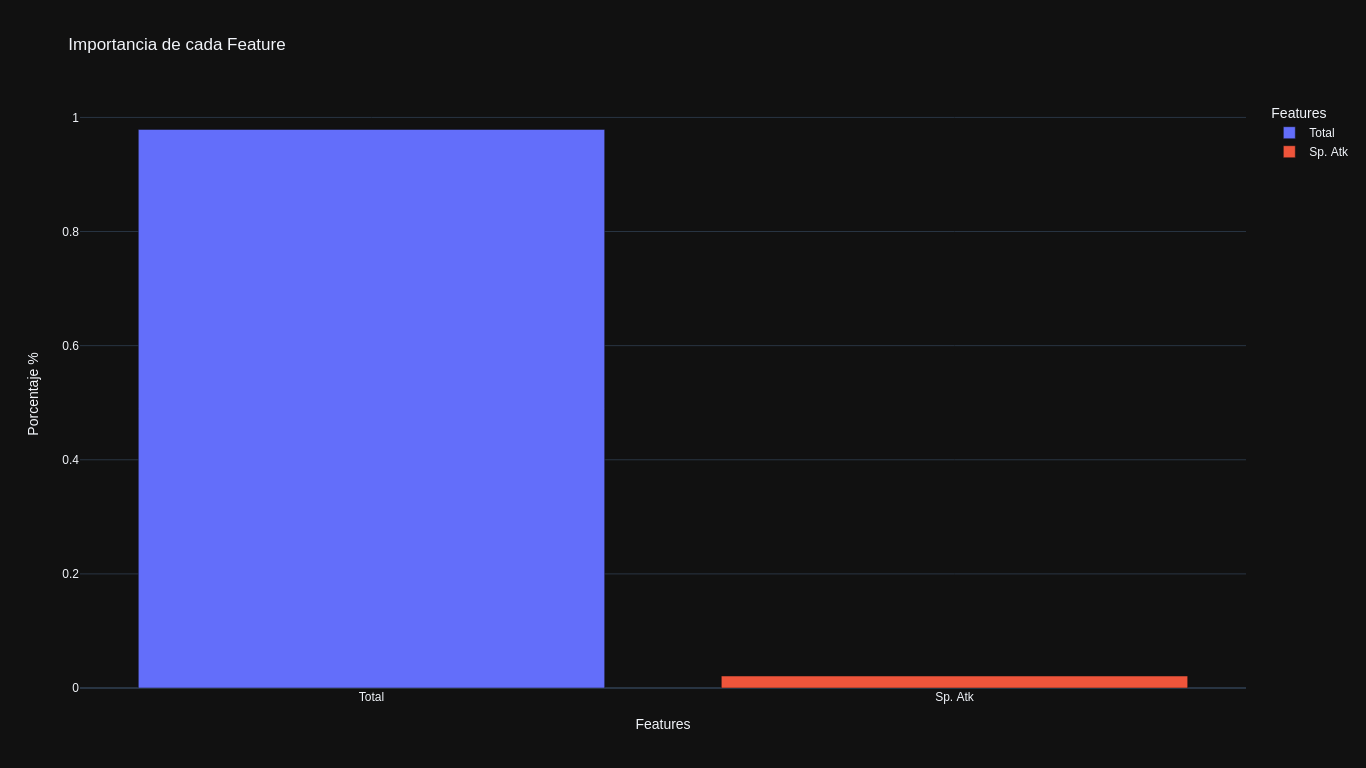

In [93]:
fig = px.bar(
    x = df_sel.columns,
    y = tree.feature_importances_,
    color = df_sel.columns,
    title = "Importancia de cada Feature",
    labels= dict(x="Features", y="Porcentaje %", color="Features")
)
fig.show("png")

### Grupo 2: type_1, Total y Sp. Attack - Optimizado

In [94]:
X = df_sel_2
y = df_target

tree = DecisionTreeClassifier() 

# Listado de params para el modelo 
# print(tree.get_params().keys())

model = GridSearchCV( 
  estimator = tree, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) #Entrenamos el modelo
print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))
print("")

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Mejor Score: 0.7878306878306878

Mejores parametros: {'max_depth': 8, 'max_leaf_nodes': 400, 'min_samples_leaf': 3, 'random_state': 42, 'splitter': 'best'}



In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

tree = DecisionTreeClassifier(
  max_depth = model.best_estimator_.get_params()['max_depth'],
  splitter = model.best_estimator_.get_params()['splitter'],
  min_samples_leaf = model.best_estimator_.get_params()['min_samples_leaf'],
  max_leaf_nodes = model.best_estimator_.get_params()['max_leaf_nodes'],
  random_state = rnd_state
) 

tree.fit(X_train,y_train) #Entrenamos el modelo

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_2_dsc_tree_opt_train_accuracy = train_accuracy
grupo_2_dsc_tree_opt_test_accuracy = test_accuracy
grupo_2_dsc_tree_opt_train_recall = train_recall
grupo_2_dsc_tree_opt_test_recall = test_recall
grupo_2_dsc_tree_opt_train_precision = train_precision
grupo_2_dsc_tree_opt_test_precision = test_precision
grupo_2_dsc_tree_opt_train_f1 = train_f1
grupo_2_dsc_tree_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.98      0.96      0.97       221
  Legendario       0.62      0.79      0.70        19

    accuracy                           0.95       240
   macro avg       0.80      0.87      0.83       240
weighted avg       0.95      0.95      0.95       240



### Grupo PCA - Optimizado

In [96]:
X = df_pca
y = df_target

tree = DecisionTreeClassifier() 

# Listado de params para el modelo 
# print(tree.get_params().keys())

model = GridSearchCV( 
  estimator = tree, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) #Entrenamos el modelo
print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))
print("")

Mejor Score: 0.7550925925925925

Mejores parametros: {'max_depth': 5, 'max_leaf_nodes': 400, 'min_samples_leaf': 13, 'random_state': 42, 'splitter': 'best'}



In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

tree = DecisionTreeClassifier(
  max_depth = model.best_estimator_.get_params()['max_depth'],
  splitter = model.best_estimator_.get_params()['splitter'],
  min_samples_leaf = model.best_estimator_.get_params()['min_samples_leaf'],
  max_leaf_nodes = model.best_estimator_.get_params()['max_leaf_nodes'],
  random_state = rnd_state
) 

tree.fit(X_train,y_train) #Entrenamos el modelo

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_dsc_tree_opt_train_accuracy = train_accuracy
grupo_pca_dsc_tree_opt_test_accuracy = test_accuracy
grupo_pca_dsc_tree_opt_train_recall = train_recall
grupo_pca_dsc_tree_opt_test_recall = test_recall
grupo_pca_dsc_tree_opt_train_precision = train_precision
grupo_pca_dsc_tree_opt_test_precision = test_precision
grupo_pca_dsc_tree_opt_train_f1 = train_f1
grupo_pca_dsc_tree_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       1.00      0.97      0.98       221
  Legendario       0.75      0.95      0.84        19

    accuracy                           0.97       240
   macro avg       0.87      0.96      0.91       240
weighted avg       0.98      0.97      0.97       240



### Grupo PCA Standard - Optimizado

In [98]:
X = df_pca
y = df_target

# Standarizar data
x_Std = sc.fit_transform(X)

tree = DecisionTreeClassifier() 

# Listado de params para el modelo 
# print(tree.get_params().keys())

model = GridSearchCV( 
  estimator = tree, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(x_Std, y) #Entrenamos el modelo

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))
print("")

Mejor Score: 0.7550925925925925

Mejores parametros: {'max_depth': 5, 'max_leaf_nodes': 400, 'min_samples_leaf': 13, 'random_state': 42, 'splitter': 'best'}



In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

# Standarizar data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

tree = DecisionTreeClassifier(
  max_depth = model.best_estimator_.get_params()['max_depth'],
  splitter = model.best_estimator_.get_params()['splitter'],
  min_samples_leaf = model.best_estimator_.get_params()['min_samples_leaf'],
  max_leaf_nodes = model.best_estimator_.get_params()['max_leaf_nodes'],
  random_state = rnd_state
) 

tree.fit(X_train,y_train) #Entrenamos el modelo

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_std_dsc_tree_opt_train_accuracy = train_accuracy
grupo_pca_std_dsc_tree_opt_test_accuracy = test_accuracy
grupo_pca_std_dsc_tree_opt_train_recall = train_recall
grupo_pca_std_dsc_tree_opt_test_recall = test_recall
grupo_pca_std_dsc_tree_opt_train_precision = train_precision
grupo_pca_std_dsc_tree_opt_test_precision = test_precision
grupo_pca_std_dsc_tree_opt_train_f1 = train_f1
grupo_pca_std_dsc_tree_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       1.00      0.97      0.98       221
  Legendario       0.75      0.95      0.84        19

    accuracy                           0.97       240
   macro avg       0.87      0.96      0.91       240
weighted avg       0.98      0.97      0.97       240



## KNN - Optimizado

In [100]:
param_grid = {
  "n_neighbors": [1, 2, 3, 5, 8, 13, 21],
  "weights": ['uniform', 'distance'],
  "algorithm": ['auto'],
  "leaf_size": [3, 5, 8, 13, 21, 34, 55, 89, 144],
  "n_jobs": [-1],
}

### Grupo 1: Total y Spc. Attack - Optimizado

In [101]:
X = df_sel
y = df_target.values.ravel()

knn = KNeighborsClassifier()

model = GridSearchCV( 
  estimator = knn, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) #Entrenamos el modelo

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

Mejor Score: 0.7672463768115942

Mejores parametros: {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': -1, 'n_neighbors': 2, 'weights': 'uniform'}


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

knn = KNeighborsClassifier(
  n_neighbors = model.best_estimator_.get_params()['n_neighbors'],
  weights = model.best_estimator_.get_params()['weights'],
  algorithm = model.best_estimator_.get_params()['algorithm'],
  leaf_size = model.best_estimator_.get_params()['leaf_size'],
  n_jobs = model.best_estimator_.get_params()['n_jobs'],
) 

knn.fit(X_train,y_train) #Entrenamos el modelo

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_1_knn_opt_train_accuracy = train_accuracy
grupo_1_knn_opt_test_accuracy = test_accuracy
grupo_1_knn_opt_train_recall = train_recall
grupo_1_knn_opt_test_recall = test_recall
grupo_1_knn_opt_train_precision = train_precision
grupo_1_knn_opt_test_precision = test_precision
grupo_1_knn_opt_train_f1 = train_f1
grupo_1_knn_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.98      0.97      0.97       221
  Legendario       0.67      0.74      0.70        19

    accuracy                           0.95       240
   macro avg       0.82      0.85      0.84       240
weighted avg       0.95      0.95      0.95       240



### Grupo 2: type_1, Total y Sp. Attack - Optimizado

In [103]:
X = df_sel_2
y = df_target.values.ravel()

knn = KNeighborsClassifier()

model = GridSearchCV( 
  estimator = knn, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) #Entrenamos el modelo

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

Mejor Score: 0.7514991728701407

Mejores parametros: {'algorithm': 'auto', 'leaf_size': 5, 'n_jobs': -1, 'n_neighbors': 21, 'weights': 'uniform'}


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

knn = KNeighborsClassifier(
  n_neighbors = model.best_estimator_.get_params()['n_neighbors'],
  weights = model.best_estimator_.get_params()['weights'],
  algorithm = model.best_estimator_.get_params()['algorithm'],
  leaf_size = model.best_estimator_.get_params()['leaf_size'],
  n_jobs = model.best_estimator_.get_params()['n_jobs'],
) 

knn.fit(X_train,y_train) #Entrenamos el modelo

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_2_knn_opt_train_accuracy = train_accuracy
grupo_2_knn_opt_test_accuracy = test_accuracy
grupo_2_knn_opt_train_recall = train_recall
grupo_2_knn_opt_test_recall = test_recall
grupo_2_knn_opt_train_precision = train_precision
grupo_2_knn_opt_test_precision = test_precision
grupo_2_knn_opt_train_f1 = train_f1
grupo_2_knn_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.98      0.95      0.96       221
  Legendario       0.56      0.79      0.65        19

    accuracy                           0.93       240
   macro avg       0.77      0.87      0.81       240
weighted avg       0.95      0.93      0.94       240



### Grupo PCA - Optimizado

In [105]:
X = df_pca
y = df_target.values.ravel()

knn = KNeighborsClassifier()

model = GridSearchCV( 
  estimator = knn, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) #Entrenamos el modelo

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

Mejor Score: 0.7328979954467211

Mejores parametros: {'algorithm': 'auto', 'leaf_size': 5, 'n_jobs': -1, 'n_neighbors': 1, 'weights': 'uniform'}


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

knn = KNeighborsClassifier(
  n_neighbors = model.best_estimator_.get_params()['n_neighbors'],
  weights = model.best_estimator_.get_params()['weights'],
  algorithm = model.best_estimator_.get_params()['algorithm'],
  leaf_size = model.best_estimator_.get_params()['leaf_size'],
  n_jobs = model.best_estimator_.get_params()['n_jobs'],
) 

knn.fit(X_train,y_train) #Entrenamos el modelo

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_knn_opt_train_accuracy = train_accuracy
grupo_pca_knn_opt_test_accuracy = test_accuracy
grupo_pca_knn_opt_train_recall = train_recall
grupo_pca_knn_opt_test_recall = test_recall
grupo_pca_knn_opt_train_precision = train_precision
grupo_pca_knn_opt_test_precision = test_precision
grupo_pca_knn_opt_train_f1 = train_f1
grupo_pca_knn_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.99      0.96      0.97       221
  Legendario       0.64      0.84      0.73        19

    accuracy                           0.95       240
   macro avg       0.81      0.90      0.85       240
weighted avg       0.96      0.95      0.95       240



### Grupo PCA Standard - Optimizado

In [107]:
X = df_pca
y = df_target.values.ravel()

X = sc.transform(X)

knn = KNeighborsClassifier()

model = GridSearchCV( 
  estimator = knn, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) #Entrenamos el modelo

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

Mejor Score: 0.6565317571628932

Mejores parametros: {'algorithm': 'auto', 'leaf_size': 5, 'n_jobs': -1, 'n_neighbors': 1, 'weights': 'uniform'}


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

knn = KNeighborsClassifier(
  n_neighbors = model.best_estimator_.get_params()['n_neighbors'],
  weights = model.best_estimator_.get_params()['weights'],
  algorithm = model.best_estimator_.get_params()['algorithm'],
  leaf_size = model.best_estimator_.get_params()['leaf_size'],
  n_jobs = model.best_estimator_.get_params()['n_jobs'],
) 

knn.fit(X_train,y_train) #Entrenamos el modelo

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_std_knn_opt_train_accuracy = train_accuracy
grupo_pca_std_knn_opt_test_accuracy = test_accuracy
grupo_pca_std_knn_opt_train_recall = train_recall
grupo_pca_std_knn_opt_test_recall = test_recall
grupo_pca_std_knn_opt_train_precision = train_precision
grupo_pca_std_knn_opt_test_precision = test_precision
grupo_pca_std_knn_opt_train_f1 = train_f1
grupo_pca_std_knn_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.97      0.95      0.96       221
  Legendario       0.52      0.68      0.59        19

    accuracy                           0.93       240
   macro avg       0.75      0.81      0.77       240
weighted avg       0.94      0.93      0.93       240



## Random Forest - Optimizado

In [109]:
param_grid = {
  "n_estimators": [3, 5, 8, 13, 21, 34],
  "criterion": ['gini', 'entropy'],
  "max_depth": [3, 5, 8, 13],
  "class_weight": ["balanced", None],
  "max_features": ['auto'],
  "n_jobs": [-1],
  "random_state": [rnd_state],
}

### Grupo 1: Total y Spc. Attack - Optimizado

In [110]:
X = df_sel
y = df_target.values.ravel()

randomForest = RandomForestClassifier(random_state = rnd_state)

model = GridSearchCV( 
  estimator = randomForest, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) #Entrenamos el modelo

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

Mejor Score: 0.7963624338624339

Mejores parametros: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 21, 'n_jobs': -1, 'random_state': 42}


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

randomForest = RandomForestClassifier(
  n_estimators = model.best_estimator_.get_params()['n_estimators'],
  criterion = model.best_estimator_.get_params()['criterion'],
  max_depth = model.best_estimator_.get_params()['max_depth'],
  class_weight = model.best_estimator_.get_params()['class_weight'],
  max_features = model.best_estimator_.get_params()['max_features'],
  n_jobs = model.best_estimator_.get_params()['n_jobs'],
  random_state = model.best_estimator_.get_params()['random_state'],
) 

randomForest.fit(X_train,y_train) #Entrenamos el modelo

y_train_pred = randomForest.predict(X_train)
y_test_pred = randomForest.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_1_rnd_frst_opt_train_accuracy = train_accuracy
grupo_1_rnd_frst_opt_test_accuracy = test_accuracy
grupo_1_rnd_frst_opt_train_recall = train_recall
grupo_1_rnd_frst_opt_test_recall = test_recall
grupo_1_rnd_frst_opt_train_precision = train_precision
grupo_1_rnd_frst_opt_test_precision = test_precision
grupo_1_rnd_frst_opt_train_f1 = train_f1
grupo_1_rnd_frst_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.98      0.95      0.97       221
  Legendario       0.60      0.79      0.68        19

    accuracy                           0.94       240
   macro avg       0.79      0.87      0.82       240
weighted avg       0.95      0.94      0.95       240



### Grupo 2: type_1, Total y Sp. Attack - Optimizado

In [112]:
X = df_sel_2
y = df_target.values.ravel()

randomForest = RandomForestClassifier(random_state = rnd_state)

model = GridSearchCV( 
  estimator = randomForest, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) #Entrenamos el modelo

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

Mejor Score: 0.7702058992381574

Mejores parametros: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 21, 'n_jobs': -1, 'random_state': 42}


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

randomForest = RandomForestClassifier(
  n_estimators = model.best_estimator_.get_params()['n_estimators'],
  criterion = model.best_estimator_.get_params()['criterion'],
  max_depth = model.best_estimator_.get_params()['max_depth'],
  class_weight = model.best_estimator_.get_params()['class_weight'],
  max_features = model.best_estimator_.get_params()['max_features'],
  n_jobs = model.best_estimator_.get_params()['n_jobs'],
  random_state = model.best_estimator_.get_params()['random_state'],
) 

randomForest.fit(X_train,y_train) #Entrenamos el modelo

y_train_pred = randomForest.predict(X_train)
y_test_pred = randomForest.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_2_rnd_frst_opt_train_accuracy = train_accuracy
grupo_2_rnd_frst_opt_test_accuracy = test_accuracy
grupo_2_rnd_frst_opt_train_recall = train_recall
grupo_2_rnd_frst_opt_test_recall = test_recall
grupo_2_rnd_frst_opt_train_precision = train_precision
grupo_2_rnd_frst_opt_test_precision = test_precision
grupo_2_rnd_frst_opt_train_f1 = train_f1
grupo_2_rnd_frst_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.99      0.94      0.96       221
  Legendario       0.55      0.89      0.68        19

    accuracy                           0.93       240
   macro avg       0.77      0.92      0.82       240
weighted avg       0.96      0.93      0.94       240



### Grupo PCA - Optimizado

In [114]:
X = df_pca
y = df_target.values.ravel()

randomForest = RandomForestClassifier(random_state = rnd_state)

model = GridSearchCV( 
  estimator = randomForest, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) #Entrenamos el modelo

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

Mejor Score: 0.7401872379291733

Mejores parametros: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 34, 'n_jobs': -1, 'random_state': 42}


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

randomForest = RandomForestClassifier(
  n_estimators = model.best_estimator_.get_params()['n_estimators'],
  criterion = model.best_estimator_.get_params()['criterion'],
  max_depth = model.best_estimator_.get_params()['max_depth'],
  class_weight = model.best_estimator_.get_params()['class_weight'],
  max_features = model.best_estimator_.get_params()['max_features'],
  n_jobs = model.best_estimator_.get_params()['n_jobs'],
  random_state = model.best_estimator_.get_params()['random_state'],
) 

randomForest.fit(X_train,y_train) #Entrenamos el modelo

y_train_pred = randomForest.predict(X_train)
y_test_pred = randomForest.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_rnd_frst_opt_train_accuracy = train_accuracy
grupo_pca_rnd_frst_opt_test_accuracy = test_accuracy
grupo_pca_rnd_frst_opt_train_recall = train_recall
grupo_pca_rnd_frst_opt_test_recall = test_recall
grupo_pca_rnd_frst_opt_train_precision = train_precision
grupo_pca_rnd_frst_opt_test_precision = test_precision
grupo_pca_rnd_frst_opt_train_f1 = train_f1
grupo_pca_rnd_frst_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       1.00      0.93      0.96       221
  Legendario       0.55      0.95      0.69        19

    accuracy                           0.93       240
   macro avg       0.77      0.94      0.83       240
weighted avg       0.96      0.93      0.94       240



### Grupo PCA Stardad - Optimizado

In [116]:
X = df_pca
y = df_target.values.ravel()

X = sc.transform(X)

randomForest = RandomForestClassifier(random_state = rnd_state)

model = GridSearchCV( 
  estimator = randomForest, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) #Entrenamos el modelo

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

Mejor Score: 0.7401872379291733

Mejores parametros: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 34, 'n_jobs': -1, 'random_state': 42}


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

# Standarizar data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

randomForest = RandomForestClassifier(
  n_estimators = model.best_estimator_.get_params()['n_estimators'],
  criterion = model.best_estimator_.get_params()['criterion'],
  max_depth = model.best_estimator_.get_params()['max_depth'],
  class_weight = model.best_estimator_.get_params()['class_weight'],
  max_features = model.best_estimator_.get_params()['max_features'],
  n_jobs = model.best_estimator_.get_params()['n_jobs'],
  random_state = model.best_estimator_.get_params()['random_state'],
) 

randomForest.fit(X_train,y_train) #Entrenamos el modelo

y_train_pred = randomForest.predict(X_train)
y_test_pred = randomForest.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_std_rnd_frst_opt_train_accuracy = train_accuracy
grupo_pca_std_rnd_frst_opt_test_accuracy = test_accuracy
grupo_pca_std_rnd_frst_opt_train_recall = train_recall
grupo_pca_std_rnd_frst_opt_test_recall = test_recall
grupo_pca_std_rnd_frst_opt_train_precision = train_precision
grupo_pca_std_rnd_frst_opt_test_precision = test_precision
grupo_pca_std_rnd_frst_opt_train_f1 = train_f1
grupo_pca_std_rnd_frst_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       1.00      0.93      0.96       221
  Legendario       0.55      0.95      0.69        19

    accuracy                           0.93       240
   macro avg       0.77      0.94      0.83       240
weighted avg       0.96      0.93      0.94       240



## Regresión Logística - Optimizado

In [118]:
param_grid = {
  "penalty": ['l1', 'l2', 'elasticnet', 'none'],
  "dual": [True, False],
  "class_weight": ["balanced", None],
  "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
  "max_iter": [10, 50, 100, 200],
  "multi_class": ['auto'],
  "n_jobs": [-1],
  "random_state": [rnd_state],
}

In [119]:
# Listado de params para el modelo 
# model = RandomForestClassifier(random_state = rnd_state)
# print(model.get_params().keys())

### Grupo 1: Total y Spc. Attack - Optimizado

In [120]:
X = df_sel
y = df_target.values.ravel()

regresion_logistica = LogisticRegression(random_state = rnd_state)

model = GridSearchCV( 
  estimator = regresion_logistica, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) 

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logi

Mejor Score: 0.709112550026429

Mejores parametros: {'class_weight': 'balanced', 'dual': False, 'max_iter': 50, 'multi_class': 'auto', 'n_jobs': -1, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg'}


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

regresion_logistica = LogisticRegression(
  penalty = model.best_estimator_.get_params()['penalty'],
  dual = model.best_estimator_.get_params()['dual'],
  class_weight = model.best_estimator_.get_params()['class_weight'],
  solver = model.best_estimator_.get_params()['solver'],
  max_iter = model.best_estimator_.get_params()['max_iter'],
  multi_class = model.best_estimator_.get_params()['multi_class'],
  n_jobs = model.best_estimator_.get_params()['n_jobs'],
  random_state = model.best_estimator_.get_params()['random_state'],
) 

regresion_logistica.fit(X_train,y_train) #Entrenamos el modelo

y_train_pred = regresion_logistica.predict(X_train)
y_test_pred = regresion_logistica.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_1_reglog_opt_train_accuracy = train_accuracy
grupo_1_reglog_opt_test_accuracy = test_accuracy
grupo_1_reglog_opt_train_recall = train_recall
grupo_1_reglog_opt_test_recall = test_recall
grupo_1_reglog_opt_train_precision = train_precision
grupo_1_reglog_opt_test_precision = test_precision
grupo_1_reglog_opt_train_f1 = train_f1
grupo_1_reglog_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       1.00      0.92      0.96       221
  Legendario       0.53      1.00      0.69        19

    accuracy                           0.93       240
   macro avg       0.76      0.96      0.83       240
weighted avg       0.96      0.93      0.94       240



### Grupo 2: type_1, Total y Sp. Attack - Optimizado

In [122]:
X = df_sel_2
y = df_target.values.ravel()

regresion_logistica = LogisticRegression(random_state = rnd_state)

model = GridSearchCV( 
  estimator = regresion_logistica, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) 

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))
warnings.filterwarnings('ignore')

Mejor Score: 0.7170804644649318

Mejores parametros: {'class_weight': 'balanced', 'dual': False, 'max_iter': 50, 'multi_class': 'auto', 'n_jobs': -1, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs'}


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

regresion_logistica = LogisticRegression(
  penalty = model.best_estimator_.get_params()['penalty'],
  dual = model.best_estimator_.get_params()['dual'],
  class_weight = model.best_estimator_.get_params()['class_weight'],
  solver = model.best_estimator_.get_params()['solver'],
  max_iter = model.best_estimator_.get_params()['max_iter'],
  multi_class = model.best_estimator_.get_params()['multi_class'],
  n_jobs = model.best_estimator_.get_params()['n_jobs'],
  random_state = model.best_estimator_.get_params()['random_state'],
) 

regresion_logistica.fit(X_train,y_train) #Entrenamos el modelo

y_train_pred = regresion_logistica.predict(X_train)
y_test_pred = regresion_logistica.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_2_reglog_opt_train_accuracy = train_accuracy
grupo_2_reglog_opt_test_accuracy = test_accuracy
grupo_2_reglog_opt_train_recall = train_recall
grupo_2_reglog_opt_test_recall = test_recall
grupo_2_reglog_opt_train_precision = train_precision
grupo_2_reglog_opt_test_precision = test_precision
grupo_2_reglog_opt_train_f1 = train_f1
grupo_2_reglog_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       1.00      0.92      0.96       221
  Legendario       0.53      1.00      0.69        19

    accuracy                           0.93       240
   macro avg       0.76      0.96      0.83       240
weighted avg       0.96      0.93      0.94       240



### Grupo PCA - Optimizado

In [124]:
X = df_pca
y = df_target.values.ravel()

regresion_logistica = LogisticRegression(random_state = rnd_state)

model = GridSearchCV( 
  estimator = regresion_logistica, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) 

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))
warnings.filterwarnings('ignore')

Mejor Score: 0.7016259190103863

Mejores parametros: {'class_weight': 'balanced', 'dual': False, 'max_iter': 50, 'multi_class': 'auto', 'n_jobs': -1, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg'}


In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

regresion_logistica = LogisticRegression(
  penalty = model.best_estimator_.get_params()['penalty'],
  dual = model.best_estimator_.get_params()['dual'],
  class_weight = model.best_estimator_.get_params()['class_weight'],
  solver = model.best_estimator_.get_params()['solver'],
  max_iter = model.best_estimator_.get_params()['max_iter'],
  multi_class = model.best_estimator_.get_params()['multi_class'],
  n_jobs = model.best_estimator_.get_params()['n_jobs'],
  random_state = model.best_estimator_.get_params()['random_state'],
) 

regresion_logistica.fit(X_train,y_train) #Entrenamos el modelo

y_train_pred = regresion_logistica.predict(X_train)
y_test_pred = regresion_logistica.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_reglog_opt_train_accuracy = train_accuracy
grupo_pca_reglog_opt_test_accuracy = test_accuracy
grupo_pca_reglog_opt_train_recall = train_recall
grupo_pca_reglog_opt_test_recall = test_recall
grupo_pca_reglog_opt_train_precision = train_precision
grupo_pca_reglog_opt_test_precision = test_precision
grupo_pca_reglog_opt_train_f1 = train_f1
grupo_pca_reglog_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       1.00      0.92      0.96       221
  Legendario       0.51      1.00      0.68        19

    accuracy                           0.93       240
   macro avg       0.76      0.96      0.82       240
weighted avg       0.96      0.93      0.94       240



### Grupo PCA Standard - Optimizado

In [126]:
X = df_pca
y = df_target.values.ravel()

X = sc.transform(X)

regresion_logistica = LogisticRegression(random_state = rnd_state)

model = GridSearchCV( 
  estimator = regresion_logistica, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) 

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))
warnings.filterwarnings('ignore')

Mejor Score: 0.7016259190103863

Mejores parametros: {'class_weight': 'balanced', 'dual': False, 'max_iter': 50, 'multi_class': 'auto', 'n_jobs': -1, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg'}


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

# Standarizar data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

regresion_logistica = LogisticRegression(
  penalty = model.best_estimator_.get_params()['penalty'],
  dual = model.best_estimator_.get_params()['dual'],
  class_weight = model.best_estimator_.get_params()['class_weight'],
  solver = model.best_estimator_.get_params()['solver'],
  max_iter = model.best_estimator_.get_params()['max_iter'],
  multi_class = model.best_estimator_.get_params()['multi_class'],
  n_jobs = model.best_estimator_.get_params()['n_jobs'],
  random_state = model.best_estimator_.get_params()['random_state'],
) 

regresion_logistica.fit(X_train,y_train) #Entrenamos el modelo

y_train_pred = regresion_logistica.predict(X_train)
y_test_pred = regresion_logistica.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_std_reglog_opt_train_accuracy = train_accuracy
grupo_pca_std_reglog_opt_test_accuracy = test_accuracy
grupo_pca_std_reglog_opt_train_recall = train_recall
grupo_pca_std_reglog_opt_test_recall = test_recall
grupo_pca_std_reglog_opt_train_precision = train_precision
grupo_pca_std_reglog_opt_test_precision = test_precision
grupo_pca_std_reglog_opt_train_f1 = train_f1
grupo_pca_std_reglog_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       1.00      0.91      0.96       221
  Legendario       0.50      1.00      0.67        19

    accuracy                           0.92       240
   macro avg       0.75      0.96      0.81       240
weighted avg       0.96      0.92      0.93       240



## Support Vector Machines - SVM - Optimizado

In [128]:
param_grid = {
  "C": [1, 2, 3],
  "kernel": [ 'rbf'],  
  "gamma": ['auto'],
  "shrinking": [True, False],
  "probability": [True, False],
  "class_weight": ["balanced", None],
  "max_iter": [-1],
  "random_state": [rnd_state],
}

In [129]:
# Listado de params para el modelo 
# model = SVC(random_state = rnd_state)
# print(model.get_params().keys())

### Grupo 1: Total y Spc. Attack

In [130]:
X = df_sel
y = df_target.values.ravel()

svc = SVC(random_state = rnd_state)

model = GridSearchCV( 
  estimator = svc, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) 

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

Mejor Score: 0.5260823064403627

Mejores parametros: {'C': 1, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True}


In [131]:
# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo SVM
modelo = SVC(
  C = model.best_estimator_.get_params()['C'],
  kernel = model.best_estimator_.get_params()['kernel'],
  gamma = model.best_estimator_.get_params()['gamma'],
  shrinking = model.best_estimator_.get_params()['shrinking'],
  probability = model.best_estimator_.get_params()['probability'],
  class_weight = model.best_estimator_.get_params()['class_weight'],
  max_iter = model.best_estimator_.get_params()['max_iter'],
  random_state = model.best_estimator_.get_params()['random_state'],
) 

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_1_svm_opt_train_accuracy = train_accuracy
grupo_1_svm_opt_test_accuracy = test_accuracy
grupo_1_svm_opt_train_recall = train_recall
grupo_1_svm_opt_test_recall = test_recall
grupo_1_svm_opt_train_precision = train_precision
grupo_1_svm_opt_test_precision = test_precision
grupo_1_svm_opt_train_f1 = train_f1
grupo_1_svm_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.96      0.98      0.97       221
  Legendario       0.69      0.58      0.63        19

    accuracy                           0.95       240
   macro avg       0.83      0.78      0.80       240
weighted avg       0.94      0.95      0.94       240



### Grupo 2: type_1, Total y Sp. Attack

In [132]:
X = df_sel_2
y = df_target.values.ravel()

svc = SVC(random_state = rnd_state)

model = GridSearchCV( 
  estimator = svc, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) 

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

Mejor Score: 0.1681699346405229

Mejores parametros: {'C': 1, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True}


In [133]:
# Definimos los datos para el analisis
X = df_sel_2
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo SVM
modelo = SVC(
  C = model.best_estimator_.get_params()['C'],
  kernel = model.best_estimator_.get_params()['kernel'],
  gamma = model.best_estimator_.get_params()['gamma'],
  shrinking = model.best_estimator_.get_params()['shrinking'],
  probability = model.best_estimator_.get_params()['probability'],
  class_weight = model.best_estimator_.get_params()['class_weight'],
  max_iter = model.best_estimator_.get_params()['max_iter'],
  random_state = model.best_estimator_.get_params()['random_state'],
) 

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_2_svm_opt_train_accuracy = train_accuracy
grupo_2_svm_opt_test_accuracy = test_accuracy
grupo_2_svm_opt_train_recall = train_recall
grupo_2_svm_opt_test_recall = test_recall
grupo_2_svm_opt_train_precision = train_precision
grupo_2_svm_opt_test_precision = test_precision
grupo_2_svm_opt_train_f1 = train_f1
grupo_2_svm_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.93      0.99      0.96       221
  Legendario       0.50      0.16      0.24        19

    accuracy                           0.92       240
   macro avg       0.72      0.57      0.60       240
weighted avg       0.90      0.92      0.90       240



### Grupo PCA

In [134]:
X = df_pca
y = df_target.values.ravel()

svc = SVC(random_state = rnd_state)

model = GridSearchCV( 
  estimator = svc, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) 

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

Mejor Score: 0.2188888888888889

Mejores parametros: {'C': 1, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True}


In [135]:
# Definimos los datos para el analisis
X = df_pca
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo SVM
modelo = SVC(
  C = model.best_estimator_.get_params()['C'],
  kernel = model.best_estimator_.get_params()['kernel'],
  gamma = model.best_estimator_.get_params()['gamma'],
  shrinking = model.best_estimator_.get_params()['shrinking'],
  probability = model.best_estimator_.get_params()['probability'],
  class_weight = model.best_estimator_.get_params()['class_weight'],
  max_iter = model.best_estimator_.get_params()['max_iter'],
  random_state = model.best_estimator_.get_params()['random_state'],
) 

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_svm_opt_train_accuracy = train_accuracy
grupo_pca_svm_opt_test_accuracy = test_accuracy
grupo_pca_svm_opt_train_recall = train_recall
grupo_pca_svm_opt_test_recall = test_recall
grupo_pca_svm_opt_train_precision = train_precision
grupo_pca_svm_opt_test_precision = test_precision
grupo_pca_svm_opt_train_f1 = train_f1
grupo_pca_svm_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.93      0.99      0.96       221
  Legendario       0.60      0.16      0.25        19

    accuracy                           0.93       240
   macro avg       0.77      0.57      0.61       240
weighted avg       0.91      0.93      0.90       240



### Grupo PCA Standard

In [136]:
X = df_pca
y = df_target.values.ravel()

X = sc.transform(X)

svc = SVC(random_state = rnd_state)

model = GridSearchCV( 
  estimator = svc, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) 

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

Mejor Score: 0.6834470446055813

Mejores parametros: {'C': 3, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True}


In [137]:
# Definimos los datos para el analisis
X = df_pca
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

# Standarizar data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Creamos modelo SVM
modelo = SVC(
  C = model.best_estimator_.get_params()['C'],
  kernel = model.best_estimator_.get_params()['kernel'],
  gamma = model.best_estimator_.get_params()['gamma'],
  shrinking = model.best_estimator_.get_params()['shrinking'],
  probability = model.best_estimator_.get_params()['probability'],
  class_weight = model.best_estimator_.get_params()['class_weight'],
  max_iter = model.best_estimator_.get_params()['max_iter'],
  random_state = model.best_estimator_.get_params()['random_state'],
) 

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_std_svm_opt_train_accuracy = train_accuracy
grupo_pca_std_svm_opt_test_accuracy = test_accuracy
grupo_pca_std_svm_opt_train_recall = train_recall
grupo_pca_std_svm_opt_test_recall = test_recall
grupo_pca_std_svm_opt_train_precision = train_precision
grupo_pca_std_svm_opt_test_precision = test_precision
grupo_pca_std_svm_opt_train_f1 = train_f1
grupo_pca_std_svm_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       1.00      0.91      0.95       221
  Legendario       0.49      0.95      0.64        19

    accuracy                           0.92       240
   macro avg       0.74      0.93      0.80       240
weighted avg       0.95      0.92      0.93       240



## Gradient Boost - GBM - Optimizado

In [138]:
# 'mse' y 'mae' deprecados

param_grid = {
  "loss": ['deviance', 'exponential'],
  "learning_rate": [0.5, 1, 1.5, 2],  
  "n_estimators": [10, 25, 50],
  "criterion": ['friedman_mse', 'squared_error', 'absolute_error'], 
  "max_depth": [3, 5, 8],
  "max_features": ['auto'],
  "random_state": [rnd_state],
}

In [139]:
# # Listado de params para el modelo 
# model = GradientBoostingClassifier(random_state = rnd_state)
# print(model.get_params().keys())

### Grupo 1: Total y Spc. Attack

In [140]:
warnings.filterwarnings('ignore')
X = df_sel
y = df_target.values.ravel()

gbm = GradientBoostingClassifier(random_state = rnd_state)

model = GridSearchCV( 
  estimator = gbm, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) 

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

Mejor Score: 0.7831233766233767

Mejores parametros: {'criterion': 'squared_error', 'learning_rate': 1, 'loss': 'deviance', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 25, 'random_state': 42}


In [141]:
# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo SVM
modelo = GradientBoostingClassifier(
  loss = model.best_estimator_.get_params()['loss'],
  learning_rate = model.best_estimator_.get_params()['learning_rate'],
  n_estimators = model.best_estimator_.get_params()['n_estimators'],
  criterion = model.best_estimator_.get_params()['criterion'],
  max_depth = model.best_estimator_.get_params()['max_depth'],
  max_features = model.best_estimator_.get_params()['max_features'],
  random_state = model.best_estimator_.get_params()['random_state'],
) 

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_1_gbm_opt_train_accuracy = train_accuracy
grupo_1_gbm_opt_test_accuracy = test_accuracy
grupo_1_gbm_opt_train_recall = train_recall
grupo_1_gbm_opt_test_recall = test_recall
grupo_1_gbm_opt_train_precision = train_precision
grupo_1_gbm_opt_test_precision = test_precision
grupo_1_gbm_opt_train_f1 = train_f1
grupo_1_gbm_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.99      0.95      0.97       221
  Legendario       0.63      0.89      0.74        19

    accuracy                           0.95       240
   macro avg       0.81      0.92      0.86       240
weighted avg       0.96      0.95      0.95       240



### Grupo 2: type_1, Total y Sp. Attack

In [142]:
X = df_sel_2
y = df_target.values.ravel()

gbm = GradientBoostingClassifier(random_state = rnd_state)

model = GridSearchCV( 
  estimator = gbm, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) 

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

Mejor Score: 0.7953439153439155

Mejores parametros: {'criterion': 'friedman_mse', 'learning_rate': 1.5, 'loss': 'deviance', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 10, 'random_state': 42}


In [143]:

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo SVM
modelo = GradientBoostingClassifier(
  loss = model.best_estimator_.get_params()['loss'],
  learning_rate = model.best_estimator_.get_params()['learning_rate'],
  n_estimators = model.best_estimator_.get_params()['n_estimators'],
  criterion = model.best_estimator_.get_params()['criterion'],
  max_depth = model.best_estimator_.get_params()['max_depth'],
  max_features = model.best_estimator_.get_params()['max_features'],
  random_state = model.best_estimator_.get_params()['random_state'],
) 

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_2_gbm_opt_train_accuracy = train_accuracy
grupo_2_gbm_opt_test_accuracy = test_accuracy
grupo_2_gbm_opt_train_recall = train_recall
grupo_2_gbm_opt_test_recall = test_recall
grupo_2_gbm_opt_train_precision = train_precision
grupo_2_gbm_opt_test_precision = test_precision
grupo_2_gbm_opt_train_f1 = train_f1
grupo_2_gbm_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.99      0.94      0.96       221
  Legendario       0.55      0.89      0.68        19

    accuracy                           0.93       240
   macro avg       0.77      0.92      0.82       240
weighted avg       0.96      0.93      0.94       240



### Grupo PCA

In [144]:
X = df_pca
y = df_target.values.ravel()

gbm = GradientBoostingClassifier(random_state = rnd_state)

model = GridSearchCV( 
  estimator = gbm, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) 

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

Mejor Score: 0.7614675873296564

Mejores parametros: {'criterion': 'squared_error', 'learning_rate': 2, 'loss': 'deviance', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 10, 'random_state': 42}


In [145]:
# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo SVM
modelo = GradientBoostingClassifier(
  loss = model.best_estimator_.get_params()['loss'],
  learning_rate = model.best_estimator_.get_params()['learning_rate'],
  n_estimators = model.best_estimator_.get_params()['n_estimators'],
  criterion = model.best_estimator_.get_params()['criterion'],
  max_depth = model.best_estimator_.get_params()['max_depth'],
  max_features = model.best_estimator_.get_params()['max_features'],
  random_state = model.best_estimator_.get_params()['random_state'],
) 

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_gbm_opt_train_accuracy = train_accuracy
grupo_pca_gbm_opt_test_accuracy = test_accuracy
grupo_pca_gbm_opt_train_recall = train_recall
grupo_pca_gbm_opt_test_recall = test_recall
grupo_pca_gbm_opt_train_precision = train_precision
grupo_pca_gbm_opt_test_precision = test_precision
grupo_pca_gbm_opt_train_f1 = train_f1
grupo_pca_gbm_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       1.00      0.98      0.99       221
  Legendario       0.78      0.95      0.86        19

    accuracy                           0.97       240
   macro avg       0.89      0.96      0.92       240
weighted avg       0.98      0.97      0.98       240



### Grupo PCA Standard

In [146]:
X = df_pca
y = df_target.values.ravel()

X = sc.transform(X)

gbm = GradientBoostingClassifier(random_state = rnd_state)

model = GridSearchCV( 
  estimator = gbm, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) 

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

Mejor Score: 0.7614675873296564

Mejores parametros: {'criterion': 'squared_error', 'learning_rate': 2, 'loss': 'deviance', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 10, 'random_state': 42}


In [147]:
# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

# Standarizar data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Creamos modelo SVM
modelo = GradientBoostingClassifier(
  loss = model.best_estimator_.get_params()['loss'],
  learning_rate = model.best_estimator_.get_params()['learning_rate'],
  n_estimators = model.best_estimator_.get_params()['n_estimators'],
  criterion = model.best_estimator_.get_params()['criterion'],
  max_depth = model.best_estimator_.get_params()['max_depth'],
  max_features = model.best_estimator_.get_params()['max_features'],
  random_state = model.best_estimator_.get_params()['random_state'],
) 

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_std_gbm_opt_train_accuracy = train_accuracy
grupo_pca_std_gbm_opt_test_accuracy = test_accuracy
grupo_pca_std_gbm_opt_train_recall = train_recall
grupo_pca_std_gbm_opt_test_recall = test_recall
grupo_pca_std_gbm_opt_train_precision = train_precision
grupo_pca_std_gbm_opt_test_precision = test_precision
grupo_pca_std_gbm_opt_train_f1 = train_f1
grupo_pca_std_gbm_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       1.00      0.98      0.99       221
  Legendario       0.78      0.95      0.86        19

    accuracy                           0.97       240
   macro avg       0.89      0.96      0.92       240
weighted avg       0.98      0.97      0.98       240



## LightGMB - Optimizado

In [148]:
param_grid = {
  "boosting_type": ['gbdt', 'rf', 'dart', 'goss'],
  "num_leaves": [10,20,30],
  "max_depth": [-1],
  "learning_rate": [0.5, 1, 1.5, 2],  
  "n_estimators": [10, 25, 50, 100],
  "class_weight ": ['balanced', None],
  "n_jobs": [-1],
  "random_state": [rnd_state],
}

In [149]:
# # # Listado de params para el modelo 
# model = lgb.LGBMClassifier(random_state = rnd_state)
# print(model.get_params().keys())

### Grupo 1: Total y Spc. Attack

In [150]:
X = df_sel
y = df_target.values.ravel()

lgbm = lgb.LGBMClassifier(random_state = rnd_state)

model = GridSearchCV( 
  estimator = lgbm, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) 

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

Mejor Score: 0.7181953046953047

Mejores parametros: {'boosting_type': 'goss', 'class_weight ': 'balanced', 'learning_rate': 0.5, 'max_depth': -1, 'n_estimators': 10, 'n_jobs': -1, 'num_leaves': 10, 'random_state': 42}


In [151]:
# Definimos los datos para el analisis
X = df_sel
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo SVM
modelo = lgb.LGBMClassifier(
  boosting_type = model.best_estimator_.get_params()['boosting_type'],
  num_leaves = model.best_estimator_.get_params()['num_leaves'],
  max_depth = model.best_estimator_.get_params()['max_depth'],
  learning_rate = model.best_estimator_.get_params()['learning_rate'],
  n_estimators = model.best_estimator_.get_params()['n_estimators'],
  class_weight = model.best_estimator_.get_params()['class_weight'],
  n_jobs = model.best_estimator_.get_params()['n_jobs'],
  random_state = model.best_estimator_.get_params()['random_state'],
) 

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_1_lgbm_opt_train_accuracy = train_accuracy
grupo_1_lgbm_opt_test_accuracy = test_accuracy
grupo_1_lgbm_opt_train_recall = train_recall
grupo_1_lgbm_opt_test_recall = test_recall
grupo_1_lgbm_opt_train_precision = train_precision
grupo_1_lgbm_opt_test_precision = test_precision
grupo_1_lgbm_opt_train_f1 = train_f1
grupo_1_lgbm_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.99      0.95      0.97       221
  Legendario       0.61      0.89      0.72        19

    accuracy                           0.95       240
   macro avg       0.80      0.92      0.85       240
weighted avg       0.96      0.95      0.95       240



### Grupo 2: type_1, Total y Sp. Attack

In [152]:
X = df_sel_2
y = df_target.values.ravel()

lgbm = lgb.LGBMClassifier(random_state = rnd_state)

model = GridSearchCV( 
  estimator = lgbm, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) 

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

Mejor Score: 0.7734708170748215

Mejores parametros: {'boosting_type': 'goss', 'class_weight ': 'balanced', 'learning_rate': 0.5, 'max_depth': -1, 'n_estimators': 50, 'n_jobs': -1, 'num_leaves': 10, 'random_state': 42}


In [153]:
# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo SVM
modelo = lgb.LGBMClassifier(
  boosting_type = model.best_estimator_.get_params()['boosting_type'],
  num_leaves = model.best_estimator_.get_params()['num_leaves'],
  max_depth = model.best_estimator_.get_params()['max_depth'],
  learning_rate = model.best_estimator_.get_params()['learning_rate'],
  n_estimators = model.best_estimator_.get_params()['n_estimators'],
  class_weight = model.best_estimator_.get_params()['class_weight'],
  n_jobs = model.best_estimator_.get_params()['n_jobs'],
  random_state = model.best_estimator_.get_params()['random_state'],
) 

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_2_lgbm_opt_train_accuracy = train_accuracy
grupo_2_lgbm_opt_test_accuracy = test_accuracy
grupo_2_lgbm_opt_train_recall = train_recall
grupo_2_lgbm_opt_test_recall = test_recall
grupo_2_lgbm_opt_train_precision = train_precision
grupo_2_lgbm_opt_test_precision = test_precision
grupo_2_lgbm_opt_train_f1 = train_f1
grupo_2_lgbm_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.98      0.97      0.97       221
  Legendario       0.67      0.74      0.70        19

    accuracy                           0.95       240
   macro avg       0.82      0.85      0.84       240
weighted avg       0.95      0.95      0.95       240



### Grupo PCA

In [154]:
X = df_pca
y = df_target.values.ravel()

lgbm = lgb.LGBMClassifier(random_state = rnd_state)

model = GridSearchCV( 
  estimator = lgbm, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) 

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

Mejor Score: 0.7140547857939163

Mejores parametros: {'boosting_type': 'gbdt', 'class_weight ': 'balanced', 'learning_rate': 0.5, 'max_depth': -1, 'n_estimators': 10, 'n_jobs': -1, 'num_leaves': 20, 'random_state': 42}


In [155]:
# Definimos los datos para el analisis
X = df_pca
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo SVM
modelo = lgb.LGBMClassifier(
  boosting_type = model.best_estimator_.get_params()['boosting_type'],
  num_leaves = model.best_estimator_.get_params()['num_leaves'],
  max_depth = model.best_estimator_.get_params()['max_depth'],
  learning_rate = model.best_estimator_.get_params()['learning_rate'],
  n_estimators = model.best_estimator_.get_params()['n_estimators'],
  class_weight = model.best_estimator_.get_params()['class_weight'],
  n_jobs = model.best_estimator_.get_params()['n_jobs'],
  random_state = model.best_estimator_.get_params()['random_state'],
) 
# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_lgbm_opt_train_accuracy = train_accuracy
grupo_pca_lgbm_opt_test_accuracy = test_accuracy
grupo_pca_lgbm_opt_train_recall = train_recall
grupo_pca_lgbm_opt_test_recall = test_recall
grupo_pca_lgbm_opt_train_precision = train_precision
grupo_pca_lgbm_opt_test_precision = test_precision
grupo_pca_lgbm_opt_train_f1 = train_f1
grupo_pca_lgbm_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.99      0.96      0.97       221
  Legendario       0.67      0.84      0.74        19

    accuracy                           0.95       240
   macro avg       0.83      0.90      0.86       240
weighted avg       0.96      0.95      0.96       240



### Grupo PCA Standard

In [156]:
X = df_pca
y = df_target.values.ravel()

X = sc.transform(X)

lgbm = lgb.LGBMClassifier(random_state = rnd_state)

model = GridSearchCV( 
  estimator = lgbm, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) 

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

Mejor Score: 0.7140547857939163

Mejores parametros: {'boosting_type': 'gbdt', 'class_weight ': 'balanced', 'learning_rate': 0.5, 'max_depth': -1, 'n_estimators': 10, 'n_jobs': -1, 'num_leaves': 20, 'random_state': 42}


In [157]:
# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

# Standarizar data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Creamos modelo SVM
modelo = lgb.LGBMClassifier(
  boosting_type = model.best_estimator_.get_params()['boosting_type'],
  num_leaves = model.best_estimator_.get_params()['num_leaves'],
  max_depth = model.best_estimator_.get_params()['max_depth'],
  learning_rate = model.best_estimator_.get_params()['learning_rate'],
  n_estimators = model.best_estimator_.get_params()['n_estimators'],
  class_weight = model.best_estimator_.get_params()['class_weight'],
  n_jobs = model.best_estimator_.get_params()['n_jobs'],
  random_state = model.best_estimator_.get_params()['random_state'],
) 

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_std_lgbm_opt_train_accuracy = train_accuracy
grupo_pca_std_lgbm_opt_test_accuracy = test_accuracy
grupo_pca_std_lgbm_opt_train_recall = train_recall
grupo_pca_std_lgbm_opt_test_recall = test_recall
grupo_pca_std_lgbm_opt_train_precision = train_precision
grupo_pca_std_lgbm_opt_test_precision = test_precision
grupo_pca_std_lgbm_opt_train_f1 = train_f1
grupo_pca_std_lgbm_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.99      0.96      0.97       221
  Legendario       0.67      0.84      0.74        19

    accuracy                           0.95       240
   macro avg       0.83      0.90      0.86       240
weighted avg       0.96      0.95      0.96       240



## Adaboost - Optimizado

In [158]:
param_grid = {
  "n_estimators": [10, 25, 50, 75, 100],
  "learning_rate": [1, 1.5, 2],  
  "algorithm": ['SAMME', 'SAMME.R'],
  "random_state": [rnd_state],
}

In [159]:
# # Listado de params para el modelo 
# model = AdaBoostClassifier(random_state = rnd_state)
# print(model.get_params().keys())

### Grupo 1: Total y Spc. Attack

In [160]:
warnings.filterwarnings('once')
X = df_sel
y = df_target.values.ravel()

adaboost = AdaBoostClassifier(random_state = rnd_state)

model = GridSearchCV( 
  estimator = adaboost, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) 

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metri

Mejor Score: 0.7639999999999999

Mejores parametros: {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 25, 'random_state': 42}


In [161]:
# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo SVM
modelo = AdaBoostClassifier(
  n_estimators = model.best_estimator_.get_params()['n_estimators'],
  learning_rate = model.best_estimator_.get_params()['learning_rate'],
  algorithm = model.best_estimator_.get_params()['algorithm'],
  random_state = model.best_estimator_.get_params()['random_state'],
) 

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_1_ada_opt_train_accuracy = train_accuracy
grupo_1_ada_opt_test_accuracy = test_accuracy
grupo_1_ada_opt_train_recall = train_recall
grupo_1_ada_opt_test_recall = test_recall
grupo_1_ada_opt_train_precision = train_precision
grupo_1_ada_opt_test_precision = test_precision
grupo_1_ada_opt_train_f1 = train_f1
grupo_1_ada_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.97      0.98      0.98       221
  Legendario       0.72      0.68      0.70        19

    accuracy                           0.95       240
   macro avg       0.85      0.83      0.84       240
weighted avg       0.95      0.95      0.95       240



### Grupo 2: type_1, Total y Sp. Attack

In [162]:
X = df_sel_2
y = df_target.values.ravel()

# X = sc.transform(X)

adaboost = AdaBoostClassifier(random_state = rnd_state)

model = GridSearchCV( 
  estimator = adaboost, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) 

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

Mejor Score: 0.7804163791120313

Mejores parametros: {'algorithm': 'SAMME.R', 'learning_rate': 1.5, 'n_estimators': 75, 'random_state': 42}


In [163]:
# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo SVM
modelo = AdaBoostClassifier(
  n_estimators = model.best_estimator_.get_params()['n_estimators'],
  learning_rate = model.best_estimator_.get_params()['learning_rate'],
  algorithm = model.best_estimator_.get_params()['algorithm'],
  random_state = model.best_estimator_.get_params()['random_state'],
) 

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_2_ada_opt_train_accuracy = train_accuracy
grupo_2_ada_opt_test_accuracy = test_accuracy
grupo_2_ada_opt_train_recall = train_recall
grupo_2_ada_opt_test_recall = test_recall
grupo_2_ada_opt_train_precision = train_precision
grupo_2_ada_opt_test_precision = test_precision
grupo_2_ada_opt_train_f1 = train_f1
grupo_2_ada_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.98      0.96      0.97       221
  Legendario       0.62      0.79      0.70        19

    accuracy                           0.95       240
   macro avg       0.80      0.87      0.83       240
weighted avg       0.95      0.95      0.95       240



### Grupo PCA

In [164]:
X = df_pca
y = df_target.values.ravel()

adaboost = AdaBoostClassifier(random_state = rnd_state)

model = GridSearchCV( 
  estimator = adaboost, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) 

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

Mejor Score: 0.7384108739281154

Mejores parametros: {'algorithm': 'SAMME', 'learning_rate': 2, 'n_estimators': 25, 'random_state': 42}


In [165]:
# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

#Creamos modelo SVM
modelo = AdaBoostClassifier(
  n_estimators = model.best_estimator_.get_params()['n_estimators'],
  learning_rate = model.best_estimator_.get_params()['learning_rate'],
  algorithm = model.best_estimator_.get_params()['algorithm'],
  random_state = model.best_estimator_.get_params()['random_state'],
) 

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_ada_opt_train_accuracy = train_accuracy
grupo_pca_ada_opt_test_accuracy = test_accuracy
grupo_pca_ada_opt_train_recall = train_recall
grupo_pca_ada_opt_test_recall = test_recall
grupo_pca_ada_opt_train_precision = train_precision
grupo_pca_ada_opt_test_precision = test_precision
grupo_pca_ada_opt_train_f1 = train_f1
grupo_pca_ada_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.99      0.95      0.97       221
  Legendario       0.63      0.89      0.74        19

    accuracy                           0.95       240
   macro avg       0.81      0.92      0.86       240
weighted avg       0.96      0.95      0.95       240



### Grupo PCA Standard

In [166]:
X = df_pca
y = df_target.values.ravel()

X = sc.transform(X)

adaboost = AdaBoostClassifier(random_state = rnd_state)

model = GridSearchCV( 
  estimator = adaboost, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) 

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Mejor Score: 0.7384108739281154

Mejores parametros: {'algorithm': 'SAMME', 'learning_rate': 2, 'n_estimators': 25, 'random_state': 42}


In [167]:
# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

# Standarizar data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Creamos modelo SVM
modelo = AdaBoostClassifier(random_state=rnd_state)

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_std_ada_opt_train_accuracy = train_accuracy
grupo_pca_std_ada_opt_test_accuracy = test_accuracy
grupo_pca_std_ada_opt_train_recall = train_recall
grupo_pca_std_ada_opt_test_recall = test_recall
grupo_pca_std_ada_opt_train_precision = train_precision
grupo_pca_std_ada_opt_test_precision = test_precision
grupo_pca_std_ada_opt_train_f1 = train_f1
grupo_pca_std_ada_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.99      0.96      0.97       221
  Legendario       0.65      0.89      0.76        19

    accuracy                           0.95       240
   macro avg       0.82      0.93      0.87       240
weighted avg       0.96      0.95      0.96       240



## XGBoost - Optimizado

In [168]:
param_grid = {
  # "booster ": ['gbtree', 'gblinear', 'dart'],
  # "learning_rate": [0.5, 1, 1.5, 2],  
  # "gamma ": [0.5, 1, 1.5, 2],  
  # "n_estimators": [10, 25, 50, 100],
  "n_jobs": [-1],
  "random_state": [rnd_state],
}

In [169]:
# # Listado de params para el modelo 
model = xgb.XGBClassifier(random_state = rnd_state)
print(model.get_params().keys())

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity'])


### Grupo 1: Total y Spc. Attack

In [170]:
X = df_sel
y = df_target.values.ravel()

xgboost = xgb.XGBClassifier(random_state=rnd_state)

model = GridSearchCV( 
  estimator = xgboost, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) 

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

Mejor Score: 0.7066676286676287

Mejores parametros: {'n_jobs': -1, 'random_state': 42}


In [171]:
# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 
  
#Creamos modelo SVM
modelo = xgb.XGBClassifier(
  booster = model.best_estimator_.get_params()['booster'],
  learning_rate = model.best_estimator_.get_params()['learning_rate'],
  gamma = model.best_estimator_.get_params()['gamma'],
  n_estimators = model.best_estimator_.get_params()['n_estimators'],
  n_jobs = model.best_estimator_.get_params()['n_jobs'],
  random_state = model.best_estimator_.get_params()['random_state'],
) 

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_1_xgb_opt_train_accuracy = train_accuracy
grupo_1_xgb_opt_test_accuracy = test_accuracy
grupo_1_xgb_opt_train_recall = train_recall
grupo_1_xgb_opt_test_recall = test_recall
grupo_1_xgb_opt_train_precision = train_precision
grupo_1_xgb_opt_test_precision = test_precision
grupo_1_xgb_opt_train_f1 = train_f1
grupo_1_xgb_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.99      0.95      0.97       221
  Legendario       0.61      0.89      0.72        19

    accuracy                           0.95       240
   macro avg       0.80      0.92      0.85       240
weighted avg       0.96      0.95      0.95       240



### Grupo 2: type_1, Total y Sp. Attack

In [172]:
X = df_sel_2
y = df_target.values.ravel()

warnings.filterwarnings(action='ignore')

xgboost = xgb.XGBClassifier(random_state=rnd_state)

model = GridSearchCV( 
  estimator = xgboost, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) 

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

Mejor Score: 0.7694534091953446

Mejores parametros: {'n_jobs': -1, 'random_state': 42}


In [173]:
# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 
  
#Creamos modelo SVM
modelo = xgb.XGBClassifier(
  booster = model.best_estimator_.get_params()['booster'],
  learning_rate = model.best_estimator_.get_params()['learning_rate'],
  gamma = model.best_estimator_.get_params()['gamma'],
  n_estimators = model.best_estimator_.get_params()['n_estimators'],
  n_jobs = model.best_estimator_.get_params()['n_jobs'],
  random_state = model.best_estimator_.get_params()['random_state'],
) 

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_2_xgb_opt_train_accuracy = train_accuracy
grupo_2_xgb_opt_test_accuracy = test_accuracy
grupo_2_xgb_opt_train_recall = train_recall
grupo_2_xgb_opt_test_recall = test_recall
grupo_2_xgb_opt_train_precision = train_precision
grupo_2_xgb_opt_test_precision = test_precision
grupo_2_xgb_opt_train_f1 = train_f1
grupo_2_xgb_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.98      0.97      0.97       221
  Legendario       0.67      0.74      0.70        19

    accuracy                           0.95       240
   macro avg       0.82      0.85      0.84       240
weighted avg       0.95      0.95      0.95       240



### Grupo PCA

In [174]:
X = df_pca
y = df_target.values.ravel()

X = sc.transform(X)

xgboost = xgb.XGBClassifier(random_state=rnd_state)

model = GridSearchCV( 
  estimator = xgboost, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) 

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

Mejor Score: 0.7280609695152424

Mejores parametros: {'n_jobs': -1, 'random_state': 42}


In [175]:
# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Creamos modelo SVM
modelo = xgb.XGBClassifier(
  booster = model.best_estimator_.get_params()['booster'],
  learning_rate = model.best_estimator_.get_params()['learning_rate'],
  gamma = model.best_estimator_.get_params()['gamma'],
  n_estimators = model.best_estimator_.get_params()['n_estimators'],
  n_jobs = model.best_estimator_.get_params()['n_jobs'],
  random_state = model.best_estimator_.get_params()['random_state'],
) 

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_xgb_opt_train_accuracy = train_accuracy
grupo_pca_xgb_opt_test_accuracy = test_accuracy
grupo_pca_xgb_opt_train_recall = train_recall
grupo_pca_xgb_opt_test_recall = test_recall
grupo_pca_xgb_opt_train_precision = train_precision
grupo_pca_xgb_opt_test_precision = test_precision
grupo_pca_xgb_opt_train_f1 = train_f1
grupo_pca_xgb_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.99      0.95      0.97       221
  Legendario       0.62      0.84      0.71        19

    accuracy                           0.95       240
   macro avg       0.80      0.90      0.84       240
weighted avg       0.96      0.95      0.95       240



### Grupo PCA Standard

In [176]:
X = df_pca
y = df_target.values.ravel()

xgboost = xgb.XGBClassifier(random_state=rnd_state)

model = GridSearchCV( 
  estimator = xgboost, 
  param_grid = param_grid,
  cv = strtf_kflod,
  scoring= scoring_list,
  refit = "f1",
  return_train_score=False
)

model.fit(X, y) 

print("Mejor Score: "+str(model.best_score_)+'\n')
print("Mejores parametros: "+str(model.best_params_))

Mejor Score: 0.7280609695152424

Mejores parametros: {'n_jobs': -1, 'random_state': 42}


In [177]:
# Definimos los datos para el analisis
X = df_pca
y = df_target

# Se separa la información en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rnd_state, stratify=y) 

# Standarizar data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Creamos modelo SVM
modelo = xgb.XGBClassifier(
  booster = model.best_estimator_.get_params()['booster'],
  learning_rate = model.best_estimator_.get_params()['learning_rate'],
  gamma = model.best_estimator_.get_params()['gamma'],
  n_estimators = model.best_estimator_.get_params()['n_estimators'],
  n_jobs = model.best_estimator_.get_params()['n_jobs'],
  random_state = model.best_estimator_.get_params()['random_state'],
) 

# Entrenamos la SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo métricas en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

#Calculo métricas en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

grupo_pca_std_xgb_opt_train_accuracy = train_accuracy
grupo_pca_std_xgb_opt_test_accuracy = test_accuracy
grupo_pca_std_xgb_opt_train_recall = train_recall
grupo_pca_std_xgb_opt_test_recall = test_recall
grupo_pca_std_xgb_opt_train_precision = train_precision
grupo_pca_std_xgb_opt_test_precision = test_precision
grupo_pca_std_xgb_opt_train_f1 = train_f1
grupo_pca_std_xgb_opt_test_f1 = test_f1

print(classification_report(y_test, y_test_pred, target_names= ["Normal","Legendario"]))

              precision    recall  f1-score   support

      Normal       0.99      0.95      0.97       221
  Legendario       0.62      0.84      0.71        19

    accuracy                           0.95       240
   macro avg       0.80      0.90      0.84       240
weighted avg       0.96      0.95      0.95       240



<hr>

# Resultados

## Proceso dataframe con resultados

In [178]:
dict_result_opt = {
    "DECISION_TREE_OPT": {
        "GROUP_1" : {
            "ACCURACY_TRAIN": grupo_1_dsc_tree_opt_train_accuracy,
            "ACCURACY_TEST": grupo_1_dsc_tree_opt_test_accuracy,
            "RECALL_TRAIN": grupo_1_dsc_tree_opt_train_recall,
            "RECALL_TEST": grupo_1_dsc_tree_opt_test_recall,
            "PRECISION_TRAIN": grupo_1_dsc_tree_opt_train_precision,
            "PRECISION_TEST": grupo_1_dsc_tree_opt_test_precision,
            "F1_TRAIN": grupo_1_dsc_tree_opt_train_f1,
            "F1_TEST": grupo_1_dsc_tree_opt_test_f1
        },
        "GROUP_2" : {
            "ACCURACY_TRAIN": grupo_2_dsc_tree_opt_train_accuracy,
            "ACCURACY_TEST": grupo_2_dsc_tree_opt_test_accuracy,
            "RECALL_TRAIN": grupo_2_dsc_tree_opt_train_recall,
            "RECALL_TEST": grupo_2_dsc_tree_opt_test_recall,
            "PRECISION_TRAIN": grupo_2_dsc_tree_opt_train_precision,
            "PRECISION_TEST": grupo_2_dsc_tree_opt_test_precision,
            "F1_TRAIN": grupo_2_dsc_tree_opt_train_f1,
            "F1_TEST": grupo_2_dsc_tree_opt_test_f1
        },
        "GROUP_PCA" : {
            "ACCURACY_TRAIN": grupo_pca_dsc_tree_opt_train_accuracy,
            "ACCURACY_TEST": grupo_pca_dsc_tree_opt_test_accuracy,
            "RECALL_TRAIN": grupo_pca_dsc_tree_opt_train_recall,
            "RECALL_TEST": grupo_pca_dsc_tree_opt_test_recall,
            "PRECISION_TRAIN": grupo_pca_dsc_tree_opt_train_precision,
            "PRECISION_TEST": grupo_pca_dsc_tree_opt_test_precision,
            "F1_TRAIN": grupo_pca_dsc_tree_opt_train_f1,
            "F1_TEST": grupo_pca_dsc_tree_opt_test_f1
        },
        "GROUP_PCA_STD" : {
            "ACCURACY_TRAIN": grupo_pca_std_dsc_tree_opt_train_accuracy,
            "ACCURACY_TEST": grupo_pca_std_dsc_tree_opt_test_accuracy,
            "RECALL_TRAIN": grupo_pca_std_dsc_tree_opt_train_recall,
            "RECALL_TEST": grupo_pca_std_dsc_tree_opt_test_recall,
            "PRECISION_TRAIN": grupo_pca_std_dsc_tree_opt_train_precision,
            "PRECISION_TEST": grupo_pca_std_dsc_tree_opt_test_precision,
            "F1_TRAIN": grupo_pca_std_dsc_tree_opt_train_f1,
            "F1_TEST": grupo_pca_std_dsc_tree_opt_test_f1
        }                
    },
    "KNN_OPT": {
        "GROUP_1" : {
            "ACCURACY_TRAIN": grupo_1_knn_opt_train_accuracy,
            "ACCURACY_TEST": grupo_1_knn_opt_test_accuracy,
            "RECALL_TRAIN": grupo_1_knn_opt_train_recall,
            "RECALL_TEST": grupo_1_knn_opt_test_recall,
            "PRECISION_TRAIN": grupo_1_knn_opt_train_precision,
            "PRECISION_TEST": grupo_1_knn_opt_test_precision,
            "F1_TRAIN": grupo_1_knn_opt_train_f1,
            "F1_TEST": grupo_1_knn_opt_test_f1
        },
        "GROUP_2" : {
            "ACCURACY_TRAIN": grupo_2_knn_opt_train_accuracy,
            "ACCURACY_TEST": grupo_2_knn_opt_test_accuracy,
            "RECALL_TRAIN": grupo_2_knn_opt_train_recall,
            "RECALL_TEST": grupo_2_knn_opt_test_recall,
            "PRECISION_TRAIN": grupo_2_knn_opt_train_precision,
            "PRECISION_TEST": grupo_2_knn_opt_test_precision,
            "F1_TRAIN": grupo_2_knn_opt_train_f1,
            "F1_TEST": grupo_2_knn_opt_test_f1
        },
        "GROUP_PCA" : {
            "ACCURACY_TRAIN": grupo_pca_knn_opt_train_accuracy,
            "ACCURACY_TEST": grupo_pca_knn_opt_test_accuracy,
            "RECALL_TRAIN": grupo_pca_knn_opt_train_recall,
            "RECALL_TEST": grupo_pca_knn_opt_test_recall,
            "PRECISION_TRAIN": grupo_pca_knn_opt_train_precision,
            "PRECISION_TEST": grupo_pca_knn_opt_test_precision,
            "F1_TRAIN": grupo_pca_knn_opt_train_f1,
            "F1_TEST": grupo_pca_knn_opt_test_f1
        },
        "GROUP_PCA_STD" : {
            "ACCURACY_TRAIN": grupo_pca_std_knn_opt_train_accuracy,
            "ACCURACY_TEST": grupo_pca_std_knn_opt_test_accuracy,
            "RECALL_TRAIN": grupo_pca_std_knn_opt_train_recall,
            "RECALL_TEST": grupo_pca_std_knn_opt_test_recall,
            "PRECISION_TRAIN": grupo_pca_std_knn_opt_train_precision,
            "PRECISION_TEST": grupo_pca_std_knn_opt_test_precision,
            "F1_TRAIN": grupo_pca_std_knn_opt_train_f1,
            "F1_TEST": grupo_pca_std_knn_opt_test_f1
        },
    },
    "RANDOM_FOREST_OPT": {
        "GROUP_1" : {
            "ACCURACY_TRAIN": grupo_1_rnd_frst_opt_train_accuracy,
            "ACCURACY_TEST": grupo_1_rnd_frst_opt_test_accuracy,
            "RECALL_TRAIN": grupo_1_rnd_frst_opt_train_recall,
            "RECALL_TEST": grupo_1_rnd_frst_opt_test_recall,
            "PRECISION_TRAIN": grupo_1_rnd_frst_opt_train_precision,
            "PRECISION_TEST": grupo_1_rnd_frst_opt_test_precision,
            "F1_TRAIN": grupo_1_rnd_frst_opt_train_f1,
            "F1_TEST": grupo_1_rnd_frst_opt_test_f1
        },
        "GROUP_2" : {
            "ACCURACY_TRAIN": grupo_2_rnd_frst_opt_train_accuracy,
            "ACCURACY_TEST": grupo_2_rnd_frst_opt_test_accuracy,
            "RECALL_TRAIN": grupo_2_rnd_frst_opt_train_recall,
            "RECALL_TEST": grupo_2_rnd_frst_opt_test_recall,
            "PRECISION_TRAIN": grupo_2_rnd_frst_opt_train_precision,
            "PRECISION_TEST": grupo_2_rnd_frst_opt_test_precision,
            "F1_TRAIN": grupo_2_rnd_frst_opt_train_f1,
            "F1_TEST": grupo_2_rnd_frst_opt_test_f1
        },
        "GROUP_PCA" : {
            "ACCURACY_TRAIN": grupo_pca_rnd_frst_opt_train_accuracy,
            "ACCURACY_TEST": grupo_pca_rnd_frst_opt_test_accuracy,
            "RECALL_TRAIN": grupo_pca_rnd_frst_opt_train_recall,
            "RECALL_TEST": grupo_pca_rnd_frst_opt_test_recall,
            "PRECISION_TRAIN": grupo_pca_rnd_frst_opt_train_precision,
            "PRECISION_TEST": grupo_pca_rnd_frst_opt_test_precision,
            "F1_TRAIN": grupo_pca_rnd_frst_opt_train_f1,
            "F1_TEST": grupo_pca_rnd_frst_opt_test_f1
        },
        "GROUP_PCA_STD" : {
            "ACCURACY_TRAIN": grupo_pca_std_rnd_frst_opt_train_accuracy,
            "ACCURACY_TEST": grupo_pca_std_rnd_frst_opt_test_accuracy,
            "RECALL_TRAIN": grupo_pca_std_rnd_frst_opt_train_recall,
            "RECALL_TEST": grupo_pca_std_rnd_frst_opt_test_recall,
            "PRECISION_TRAIN": grupo_pca_std_rnd_frst_opt_train_precision,
            "PRECISION_TEST": grupo_pca_std_rnd_frst_opt_test_precision,
            "F1_TRAIN": grupo_pca_std_rnd_frst_opt_train_f1,
            "F1_TEST": grupo_pca_std_rnd_frst_opt_test_f1
        },
    },
    "REG_LOG_OPT": {
        "GROUP_1" : {
            "ACCURACY_TRAIN": grupo_1_reglog_opt_train_accuracy,
            "ACCURACY_TEST": grupo_1_reglog_opt_test_accuracy,
            "RECALL_TRAIN": grupo_1_reglog_opt_train_recall,
            "RECALL_TEST": grupo_1_reglog_opt_test_recall,
            "PRECISION_TRAIN": grupo_1_reglog_opt_train_precision,
            "PRECISION_TEST": grupo_1_reglog_opt_test_precision,
            "F1_TRAIN": grupo_1_reglog_opt_train_f1,
            "F1_TEST": grupo_1_reglog_opt_test_f1
        },
        "GROUP_2" : {
            "ACCURACY_TRAIN": grupo_2_reglog_opt_train_accuracy,
            "ACCURACY_TEST": grupo_2_reglog_opt_test_accuracy,
            "RECALL_TRAIN": grupo_2_reglog_opt_train_recall,
            "RECALL_TEST": grupo_2_reglog_opt_test_recall,
            "PRECISION_TRAIN": grupo_2_reglog_opt_train_precision,
            "PRECISION_TEST": grupo_2_reglog_opt_test_precision,
            "F1_TRAIN": grupo_2_reglog_opt_train_f1,
            "F1_TEST": grupo_2_reglog_opt_test_f1
        },
        "GROUP_PCA" : {
            "ACCURACY_TRAIN": grupo_pca_reglog_opt_train_accuracy,
            "ACCURACY_TEST": grupo_pca_reglog_opt_test_accuracy,
            "RECALL_TRAIN": grupo_pca_reglog_opt_train_recall,
            "RECALL_TEST": grupo_pca_reglog_opt_test_recall,
            "PRECISION_TRAIN": grupo_pca_reglog_opt_train_precision,
            "PRECISION_TEST": grupo_pca_reglog_opt_test_precision,
            "F1_TRAIN": grupo_pca_reglog_opt_train_f1,
            "F1_TEST": grupo_pca_reglog_opt_test_f1
        },
        "GROUP_PCA_STD" : {
            "ACCURACY_TRAIN": grupo_pca_std_reglog_opt_train_accuracy,
            "ACCURACY_TEST": grupo_pca_std_reglog_opt_test_accuracy,
            "RECALL_TRAIN": grupo_pca_std_reglog_opt_train_recall,
            "RECALL_TEST": grupo_pca_std_reglog_opt_test_recall,
            "PRECISION_TRAIN": grupo_pca_std_reglog_opt_train_precision,
            "PRECISION_TEST": grupo_pca_std_reglog_opt_test_precision,
            "F1_TRAIN": grupo_pca_std_reglog_opt_train_f1,
            "F1_TEST": grupo_pca_std_reglog_opt_test_f1
        },
    },
    "SVM_OPT": {
        "GROUP_1" : {
            "ACCURACY_TRAIN": grupo_1_svm_opt_train_accuracy,
            "ACCURACY_TEST": grupo_1_svm_opt_test_accuracy,
            "RECALL_TRAIN": grupo_1_svm_opt_train_recall,
            "RECALL_TEST": grupo_1_svm_opt_test_recall,
            "PRECISION_TRAIN": grupo_1_svm_opt_train_precision,
            "PRECISION_TEST": grupo_1_svm_opt_test_precision,
            "F1_TRAIN": grupo_1_svm_opt_train_f1,
            "F1_TEST": grupo_1_svm_opt_test_f1
        },
        "GROUP_2" : {
            "ACCURACY_TRAIN": grupo_2_svm_opt_train_accuracy,
            "ACCURACY_TEST": grupo_2_svm_opt_test_accuracy,
            "RECALL_TRAIN": grupo_2_svm_opt_train_recall,
            "RECALL_TEST": grupo_2_svm_opt_test_recall,
            "PRECISION_TRAIN": grupo_2_svm_opt_train_precision,
            "PRECISION_TEST": grupo_2_svm_opt_test_precision,
            "F1_TRAIN": grupo_2_svm_opt_train_f1,
            "F1_TEST": grupo_2_svm_opt_test_f1
        },
        "GROUP_PCA" : {
            "ACCURACY_TRAIN": grupo_pca_svm_opt_train_accuracy,
            "ACCURACY_TEST": grupo_pca_svm_opt_test_accuracy,
            "RECALL_TRAIN": grupo_pca_svm_opt_train_recall,
            "RECALL_TEST": grupo_pca_svm_opt_test_recall,
            "PRECISION_TRAIN": grupo_pca_svm_opt_train_precision,
            "PRECISION_TEST": grupo_pca_svm_opt_test_precision,
            "F1_TRAIN": grupo_pca_svm_opt_train_f1,
            "F1_TEST": grupo_pca_svm_opt_test_f1
        },
        "GROUP_PCA_STD" : {
            "ACCURACY_TRAIN": grupo_pca_std_svm_opt_train_accuracy,
            "ACCURACY_TEST": grupo_pca_std_svm_opt_test_accuracy,
            "RECALL_TRAIN": grupo_pca_std_svm_opt_train_recall,
            "RECALL_TEST": grupo_pca_std_svm_opt_test_recall,
            "PRECISION_TRAIN": grupo_pca_std_svm_opt_train_precision,
            "PRECISION_TEST": grupo_pca_std_svm_opt_test_precision,
            "F1_TRAIN": grupo_pca_std_svm_opt_train_f1,
            "F1_TEST": grupo_pca_std_svm_opt_test_f1
        },
    },
    "ADABOOST_OPT": {
        "GROUP_1" : {
            "ACCURACY_TRAIN": grupo_1_ada_opt_train_accuracy,
            "ACCURACY_TEST": grupo_1_ada_opt_test_accuracy,
            "RECALL_TRAIN": grupo_1_ada_opt_train_recall,
            "RECALL_TEST": grupo_1_ada_opt_test_recall,
            "PRECISION_TRAIN": grupo_1_ada_opt_train_precision,
            "PRECISION_TEST": grupo_1_ada_opt_test_precision,
            "F1_TRAIN": grupo_1_ada_opt_train_f1,
            "F1_TEST": grupo_1_ada_opt_test_f1
        },
        "GROUP_2" : {
            "ACCURACY_TRAIN": grupo_2_ada_opt_train_accuracy,
            "ACCURACY_TEST": grupo_2_ada_opt_test_accuracy,
            "RECALL_TRAIN": grupo_2_ada_opt_train_recall,
            "RECALL_TEST": grupo_2_ada_opt_test_recall,
            "PRECISION_TRAIN": grupo_2_ada_opt_train_precision,
            "PRECISION_TEST": grupo_2_ada_opt_test_precision,
            "F1_TRAIN": grupo_2_ada_opt_train_f1,
            "F1_TEST": grupo_2_ada_opt_test_f1
        },
        "GROUP_PCA" : {
            "ACCURACY_TRAIN": grupo_pca_ada_opt_train_accuracy,
            "ACCURACY_TEST": grupo_pca_ada_opt_test_accuracy,
            "RECALL_TRAIN": grupo_pca_ada_opt_train_recall,
            "RECALL_TEST": grupo_pca_ada_opt_test_recall,
            "PRECISION_TRAIN": grupo_pca_ada_opt_train_precision,
            "PRECISION_TEST": grupo_pca_ada_opt_test_precision,
            "F1_TRAIN": grupo_pca_ada_opt_train_f1,
            "F1_TEST": grupo_pca_ada_opt_test_f1
        },
        "GROUP_PCA_STD" : {
            "ACCURACY_TRAIN": grupo_pca_std_ada_opt_train_accuracy,
            "ACCURACY_TEST": grupo_pca_std_ada_opt_test_accuracy,
            "RECALL_TRAIN": grupo_pca_std_ada_opt_train_recall,
            "RECALL_TEST": grupo_pca_std_ada_opt_test_recall,
            "PRECISION_TRAIN": grupo_pca_std_ada_opt_train_precision,
            "PRECISION_TEST": grupo_pca_std_ada_opt_test_precision,
            "F1_TRAIN": grupo_pca_std_ada_opt_train_f1,
            "F1_TEST": grupo_pca_std_ada_opt_test_f1
        },
    },
    "GBM_OPT": {
        "GROUP_1" : {
            "ACCURACY_TRAIN": grupo_1_gbm_opt_train_accuracy,
            "ACCURACY_TEST": grupo_1_gbm_opt_test_accuracy,
            "RECALL_TRAIN": grupo_1_gbm_opt_train_recall,
            "RECALL_TEST": grupo_1_gbm_opt_test_recall,
            "PRECISION_TRAIN": grupo_1_gbm_opt_train_precision,
            "PRECISION_TEST": grupo_1_gbm_opt_test_precision,
            "F1_TRAIN": grupo_1_gbm_opt_train_f1,
            "F1_TEST": grupo_1_gbm_opt_test_f1
        },
        "GROUP_2" : {
            "ACCURACY_TRAIN": grupo_2_gbm_opt_train_accuracy,
            "ACCURACY_TEST": grupo_2_gbm_opt_test_accuracy,
            "RECALL_TRAIN": grupo_2_gbm_opt_train_recall,
            "RECALL_TEST": grupo_2_gbm_opt_test_recall,
            "PRECISION_TRAIN": grupo_2_gbm_opt_train_precision,
            "PRECISION_TEST": grupo_2_gbm_opt_test_precision,
            "F1_TRAIN": grupo_2_gbm_opt_train_f1,
            "F1_TEST": grupo_2_gbm_opt_test_f1
        },
        "GROUP_PCA" : {
            "ACCURACY_TRAIN": grupo_pca_gbm_opt_train_accuracy,
            "ACCURACY_TEST": grupo_pca_gbm_opt_test_accuracy,
            "RECALL_TRAIN": grupo_pca_gbm_opt_train_recall,
            "RECALL_TEST": grupo_pca_gbm_opt_test_recall,
            "PRECISION_TRAIN": grupo_pca_gbm_opt_train_precision,
            "PRECISION_TEST": grupo_pca_gbm_opt_test_precision,
            "F1_TRAIN": grupo_pca_gbm_opt_train_f1,
            "F1_TEST": grupo_pca_gbm_opt_test_f1
        },
        "GROUP_PCA_STD" : {
            "ACCURACY_TRAIN": grupo_pca_std_gbm_opt_train_accuracy,
            "ACCURACY_TEST": grupo_pca_std_gbm_opt_test_accuracy,
            "RECALL_TRAIN": grupo_pca_std_gbm_opt_train_recall,
            "RECALL_TEST": grupo_pca_std_gbm_opt_test_recall,
            "PRECISION_TRAIN": grupo_pca_std_gbm_opt_train_precision,
            "PRECISION_TEST": grupo_pca_std_gbm_opt_test_precision,
            "F1_TRAIN": grupo_pca_std_gbm_opt_train_f1,
            "F1_TEST": grupo_pca_std_gbm_opt_test_f1
        },
    },
    "LIGHTGBM_OPT": {
        "GROUP_1" : {
            "ACCURACY_TRAIN": grupo_1_lgbm_opt_train_accuracy,
            "ACCURACY_TEST": grupo_1_lgbm_opt_test_accuracy,
            "RECALL_TRAIN": grupo_1_lgbm_opt_train_recall,
            "RECALL_TEST": grupo_1_lgbm_opt_test_recall,
            "PRECISION_TRAIN": grupo_1_lgbm_opt_train_precision,
            "PRECISION_TEST": grupo_1_lgbm_opt_test_precision,
            "F1_TRAIN": grupo_1_lgbm_opt_train_f1,
            "F1_TEST": grupo_1_lgbm_opt_test_f1
        },
        "GROUP_2" : {
            "ACCURACY_TRAIN": grupo_2_lgbm_opt_train_accuracy,
            "ACCURACY_TEST": grupo_2_lgbm_opt_test_accuracy,
            "RECALL_TRAIN": grupo_2_lgbm_opt_train_recall,
            "RECALL_TEST": grupo_2_lgbm_opt_test_recall,
            "PRECISION_TRAIN": grupo_2_lgbm_opt_train_precision,
            "PRECISION_TEST": grupo_2_lgbm_opt_test_precision,
            "F1_TRAIN": grupo_2_lgbm_opt_train_f1,
            "F1_TEST": grupo_2_lgbm_opt_test_f1
        },
        "GROUP_PCA" : {
            "ACCURACY_TRAIN": grupo_pca_lgbm_opt_train_accuracy,
            "ACCURACY_TEST": grupo_pca_lgbm_opt_test_accuracy,
            "RECALL_TRAIN": grupo_pca_lgbm_opt_train_recall,
            "RECALL_TEST": grupo_pca_lgbm_opt_test_recall,
            "PRECISION_TRAIN": grupo_pca_lgbm_opt_train_precision,
            "PRECISION_TEST": grupo_pca_lgbm_opt_test_precision,
            "F1_TRAIN": grupo_pca_lgbm_opt_train_f1,
            "F1_TEST": grupo_pca_lgbm_opt_test_f1
        },
        "GROUP_PCA_STD" : {
            "ACCURACY_TRAIN": grupo_pca_std_lgbm_opt_train_accuracy,
            "ACCURACY_TEST": grupo_pca_std_lgbm_opt_test_accuracy,
            "RECALL_TRAIN": grupo_pca_std_lgbm_opt_train_recall,
            "RECALL_TEST": grupo_pca_std_lgbm_opt_test_recall,
            "PRECISION_TRAIN": grupo_pca_std_lgbm_opt_train_precision,
            "PRECISION_TEST": grupo_pca_std_lgbm_opt_test_precision,
            "F1_TRAIN": grupo_pca_std_lgbm_opt_train_f1,
            "F1_TEST": grupo_pca_std_lgbm_opt_test_f1
        },
    },
    "XGBOOST_OPT": {
      "GROUP_1" : {
          "ACCURACY_TRAIN": grupo_1_xgb_opt_train_accuracy,
          "ACCURACY_TEST": grupo_1_xgb_opt_test_accuracy,
          "RECALL_TRAIN": grupo_1_xgb_opt_train_recall,
          "RECALL_TEST": grupo_1_xgb_opt_test_recall,
          "PRECISION_TRAIN": grupo_1_xgb_opt_train_precision,
          "PRECISION_TEST": grupo_1_xgb_opt_test_precision,
          "F1_TRAIN": grupo_1_xgb_opt_train_f1,
          "F1_TEST": grupo_1_xgb_opt_test_f1
      },
      "GROUP_2" : {
          "ACCURACY_TRAIN": grupo_2_xgb_opt_train_accuracy,
          "ACCURACY_TEST": grupo_2_xgb_opt_test_accuracy,
          "RECALL_TRAIN": grupo_2_xgb_opt_train_recall,
          "RECALL_TEST": grupo_2_xgb_opt_test_recall,
          "PRECISION_TRAIN": grupo_2_xgb_opt_train_precision,
          "PRECISION_TEST": grupo_2_xgb_opt_test_precision,
          "F1_TRAIN": grupo_2_xgb_opt_train_f1,
          "F1_TEST": grupo_2_xgb_opt_test_f1
      },
      "GROUP_PCA" : {
          "ACCURACY_TRAIN": grupo_pca_xgb_opt_train_accuracy,
          "ACCURACY_TEST": grupo_pca_xgb_opt_test_accuracy,
          "RECALL_TRAIN": grupo_pca_xgb_opt_train_recall,
          "RECALL_TEST": grupo_pca_xgb_opt_test_recall,
          "PRECISION_TRAIN": grupo_pca_xgb_opt_train_precision,
          "PRECISION_TEST": grupo_pca_xgb_opt_test_precision,
          "F1_TRAIN": grupo_pca_xgb_opt_train_f1,
          "F1_TEST": grupo_pca_xgb_opt_test_f1
      },
      "GROUP_PCA_STD" : {
          "ACCURACY_TRAIN": grupo_pca_std_xgb_opt_train_accuracy,
          "ACCURACY_TEST": grupo_pca_std_xgb_opt_test_accuracy,
          "RECALL_TRAIN": grupo_pca_std_xgb_opt_train_recall,
          "RECALL_TEST": grupo_pca_std_xgb_opt_test_recall,
          "PRECISION_TRAIN": grupo_pca_std_xgb_opt_train_precision,
          "PRECISION_TEST": grupo_pca_std_xgb_opt_test_precision,
          "F1_TRAIN": grupo_pca_std_xgb_opt_train_f1,
          "F1_TEST": grupo_pca_std_xgb_opt_test_f1
      },
    }
}

reformed_dict = {}
for outerKey, innerDict in dict_result_opt.items():
    for innerKey, values in innerDict.items():
        reformed_dict[(outerKey, innerKey)] = values

df_result_opt = pd.DataFrame(reformed_dict)

In [179]:
dict_result = {
    "DECISION_TREE_OPT": {
        "GROUP_1" : {
            "ACCURACY_TRAIN": grupo_1_dsc_tree_opt_train_accuracy,
            "ACCURACY_TEST": grupo_1_dsc_tree_opt_test_accuracy,
            "RECALL_TRAIN": grupo_1_dsc_tree_opt_train_recall,
            "RECALL_TEST": grupo_1_dsc_tree_opt_test_recall,
            "PRECISION_TRAIN": grupo_1_dsc_tree_opt_train_precision,
            "PRECISION_TEST": grupo_1_dsc_tree_opt_test_precision,
            "F1_TRAIN": grupo_1_dsc_tree_opt_train_f1,
            "F1_TEST": grupo_1_dsc_tree_opt_test_f1
        },
        "GROUP_2" : {
            "ACCURACY_TRAIN": grupo_2_dsc_tree_opt_train_accuracy,
            "ACCURACY_TEST": grupo_2_dsc_tree_opt_test_accuracy,
            "RECALL_TRAIN": grupo_2_dsc_tree_opt_train_recall,
            "RECALL_TEST": grupo_2_dsc_tree_opt_test_recall,
            "PRECISION_TRAIN": grupo_2_dsc_tree_opt_train_precision,
            "PRECISION_TEST": grupo_2_dsc_tree_opt_test_precision,
            "F1_TRAIN": grupo_2_dsc_tree_opt_train_f1,
            "F1_TEST": grupo_2_dsc_tree_opt_test_f1
        },
        "GROUP_PCA" : {
            "ACCURACY_TRAIN": grupo_pca_dsc_tree_opt_train_accuracy,
            "ACCURACY_TEST": grupo_pca_dsc_tree_opt_test_accuracy,
            "RECALL_TRAIN": grupo_pca_dsc_tree_opt_train_recall,
            "RECALL_TEST": grupo_pca_dsc_tree_opt_test_recall,
            "PRECISION_TRAIN": grupo_pca_dsc_tree_opt_train_precision,
            "PRECISION_TEST": grupo_pca_dsc_tree_opt_test_precision,
            "F1_TRAIN": grupo_pca_dsc_tree_opt_train_f1,
            "F1_TEST": grupo_pca_dsc_tree_opt_test_f1
        },
        "GROUP_PCA_STD" : {
            "ACCURACY_TRAIN": grupo_pca_std_dsc_tree_opt_train_accuracy,
            "ACCURACY_TEST": grupo_pca_std_dsc_tree_opt_test_accuracy,
            "RECALL_TRAIN": grupo_pca_std_dsc_tree_opt_train_recall,
            "RECALL_TEST": grupo_pca_std_dsc_tree_opt_test_recall,
            "PRECISION_TRAIN": grupo_pca_std_dsc_tree_opt_train_precision,
            "PRECISION_TEST": grupo_pca_std_dsc_tree_opt_test_precision,
            "F1_TRAIN": grupo_pca_std_dsc_tree_opt_train_f1,
            "F1_TEST": grupo_pca_std_dsc_tree_opt_test_f1
        }                
    },
    "DECISION_TREE": {
        "GROUP_1" : {
            "ACCURACY_TRAIN": grupo_1_dsc_tree_train_accuracy,
            "ACCURACY_TEST": grupo_1_dsc_tree_test_accuracy,
            "RECALL_TRAIN": grupo_1_dsc_tree_train_recall,
            "RECALL_TEST": grupo_1_dsc_tree_test_recall,
            "PRECISION_TRAIN": grupo_1_dsc_tree_train_precision,
            "PRECISION_TEST": grupo_1_dsc_tree_test_precision,
            "F1_TRAIN": grupo_1_dsc_tree_train_f1,
            "F1_TEST": grupo_1_dsc_tree_test_f1
        },
        
        "GROUP_2" : {
            "ACCURACY_TRAIN": grupo_2_dsc_tree_train_accuracy,
            "ACCURACY_TEST": grupo_2_dsc_tree_test_accuracy,
            "RECALL_TRAIN": grupo_2_dsc_tree_train_recall,
            "RECALL_TEST": grupo_2_dsc_tree_test_recall,
            "PRECISION_TRAIN": grupo_2_dsc_tree_train_precision,
            "PRECISION_TEST": grupo_2_dsc_tree_test_precision,
            "F1_TRAIN": grupo_2_dsc_tree_train_f1,
            "F1_TEST": grupo_2_dsc_tree_test_f1
        },
        "GROUP_PCA" : {
            "ACCURACY_TRAIN": grupo_pca_dsc_tree_train_accuracy,
            "ACCURACY_TEST": grupo_pca_dsc_tree_test_accuracy,
            "RECALL_TRAIN": grupo_pca_dsc_tree_train_recall,
            "RECALL_TEST": grupo_pca_dsc_tree_test_recall,
            "PRECISION_TRAIN": grupo_pca_dsc_tree_train_precision,
            "PRECISION_TEST": grupo_pca_dsc_tree_test_precision,
            "F1_TRAIN": grupo_pca_dsc_tree_train_f1,
            "F1_TEST": grupo_pca_dsc_tree_test_f1
        },

        "GROUP_PCA_STD" : {
            "ACCURACY_TRAIN": grupo_pca_std_dsc_tree_train_accuracy,
            "ACCURACY_TEST": grupo_pca_std_dsc_tree_test_accuracy,
            "RECALL_TRAIN": grupo_pca_std_dsc_tree_train_recall,
            "RECALL_TEST": grupo_pca_std_dsc_tree_test_recall,
            "PRECISION_TRAIN": grupo_pca_std_dsc_tree_train_precision,
            "PRECISION_TEST": grupo_pca_std_dsc_tree_test_precision,
            "F1_TRAIN": grupo_pca_std_dsc_tree_train_f1,
            "F1_TEST": grupo_pca_std_dsc_tree_test_f1
        },
    },
    "KNN": {
        "GROUP_1" : {
            "ACCURACY_TRAIN": grupo_1_knn_train_accuracy,
            "ACCURACY_TEST": grupo_1_knn_test_accuracy,
            "RECALL_TRAIN": grupo_1_knn_train_recall,
            "RECALL_TEST": grupo_1_knn_test_recall,
            "PRECISION_TRAIN": grupo_1_knn_train_precision,
            "PRECISION_TEST": grupo_1_knn_test_precision,
            "F1_TRAIN": grupo_1_knn_train_f1,
            "F1_TEST": grupo_1_knn_test_f1
        },
        "GROUP_2" : {
            "ACCURACY_TRAIN": grupo_2_knn_train_accuracy,
            "ACCURACY_TEST": grupo_2_knn_test_accuracy,
            "RECALL_TRAIN": grupo_2_knn_train_recall,
            "RECALL_TEST": grupo_2_knn_test_recall,
            "PRECISION_TRAIN": grupo_2_knn_train_precision,
            "PRECISION_TEST": grupo_2_knn_test_precision,
            "F1_TRAIN": grupo_2_knn_train_f1,
            "F1_TEST": grupo_2_knn_test_f1
        },
        "GROUP_PCA" : {
            "ACCURACY_TRAIN": grupo_pca_knn_train_accuracy,
            "ACCURACY_TEST": grupo_pca_knn_test_accuracy,
            "RECALL_TRAIN": grupo_pca_knn_train_recall,
            "RECALL_TEST": grupo_pca_knn_test_recall,
            "PRECISION_TRAIN": grupo_pca_knn_train_precision,
            "PRECISION_TEST": grupo_pca_knn_test_precision,
            "F1_TRAIN": grupo_pca_knn_train_f1,
            "F1_TEST": grupo_pca_knn_test_f1
        },
        "GROUP_PCA_STD" : {
            "ACCURACY_TRAIN": grupo_pca_std_knn_train_accuracy,
            "ACCURACY_TEST": grupo_pca_std_knn_test_accuracy,
            "RECALL_TRAIN": grupo_pca_std_knn_train_recall,
            "RECALL_TEST": grupo_pca_std_knn_test_recall,
            "PRECISION_TRAIN": grupo_pca_std_knn_train_precision,
            "PRECISION_TEST": grupo_pca_std_knn_test_precision,
            "F1_TRAIN": grupo_pca_std_knn_train_f1,
            "F1_TEST": grupo_pca_std_knn_test_f1
        },
    },
    "RANDOM_FOREST": {
        "GROUP_1" : {
            "ACCURACY_TRAIN": grupo_1_rnd_frst_train_accuracy,
            "ACCURACY_TEST": grupo_1_rnd_frst_test_accuracy,
            "RECALL_TRAIN": grupo_1_rnd_frst_train_recall,
            "RECALL_TEST": grupo_1_rnd_frst_test_recall,
            "PRECISION_TRAIN": grupo_1_rnd_frst_train_precision,
            "PRECISION_TEST": grupo_1_rnd_frst_test_precision,
            "F1_TRAIN": grupo_1_rnd_frst_train_f1,
            "F1_TEST": grupo_1_rnd_frst_test_f1
        },
        "GROUP_2" : {
            "ACCURACY_TRAIN": grupo_2_rnd_frst_train_accuracy,
            "ACCURACY_TEST": grupo_2_rnd_frst_test_accuracy,
            "RECALL_TRAIN": grupo_2_rnd_frst_train_recall,
            "RECALL_TEST": grupo_2_rnd_frst_test_recall,
            "PRECISION_TRAIN": grupo_2_rnd_frst_train_precision,
            "PRECISION_TEST": grupo_2_rnd_frst_test_precision,
            "F1_TRAIN": grupo_2_rnd_frst_train_f1,
            "F1_TEST": grupo_2_rnd_frst_test_f1
        },
        "GROUP_PCA" : {
            "ACCURACY_TRAIN": grupo_pca_rnd_frst_train_accuracy,
            "ACCURACY_TEST": grupo_pca_rnd_frst_test_accuracy,
            "RECALL_TRAIN": grupo_pca_rnd_frst_train_recall,
            "RECALL_TEST": grupo_pca_rnd_frst_test_recall,
            "PRECISION_TRAIN": grupo_pca_rnd_frst_train_precision,
            "PRECISION_TEST": grupo_pca_rnd_frst_test_precision,
            "F1_TRAIN": grupo_pca_rnd_frst_train_f1,
            "F1_TEST": grupo_pca_rnd_frst_test_f1
        },
        "GROUP_PCA_STD" : {
            "ACCURACY_TRAIN": grupo_pca_std_rnd_frst_train_accuracy,
            "ACCURACY_TEST": grupo_pca_std_rnd_frst_test_accuracy,
            "RECALL_TRAIN": grupo_pca_std_rnd_frst_train_recall,
            "RECALL_TEST": grupo_pca_std_rnd_frst_test_recall,
            "PRECISION_TRAIN": grupo_pca_std_rnd_frst_train_precision,
            "PRECISION_TEST": grupo_pca_std_rnd_frst_test_precision,
            "F1_TRAIN": grupo_pca_std_rnd_frst_train_f1,
            "F1_TEST": grupo_pca_std_rnd_frst_test_f1
        },
    },
    "REG_LOG": {
        "GROUP_1" : {
            "ACCURACY_TRAIN": grupo_1_reglog_train_accuracy,
            "ACCURACY_TEST": grupo_1_reglog_test_accuracy,
            "RECALL_TRAIN": grupo_1_reglog_train_recall,
            "RECALL_TEST": grupo_1_reglog_test_recall,
            "PRECISION_TRAIN": grupo_1_reglog_train_precision,
            "PRECISION_TEST": grupo_1_reglog_test_precision,
            "F1_TRAIN": grupo_1_reglog_train_f1,
            "F1_TEST": grupo_1_reglog_test_f1
        },
        "GROUP_2" : {
            "ACCURACY_TRAIN": grupo_2_reglog_train_accuracy,
            "ACCURACY_TEST": grupo_2_reglog_test_accuracy,
            "RECALL_TRAIN": grupo_2_reglog_train_recall,
            "RECALL_TEST": grupo_2_reglog_test_recall,
            "PRECISION_TRAIN": grupo_2_reglog_train_precision,
            "PRECISION_TEST": grupo_2_reglog_test_precision,
            "F1_TRAIN": grupo_2_reglog_train_f1,
            "F1_TEST": grupo_2_reglog_test_f1
        },
        "GROUP_PCA" : {
            "ACCURACY_TRAIN": grupo_pca_reglog_train_accuracy,
            "ACCURACY_TEST": grupo_pca_reglog_test_accuracy,
            "RECALL_TRAIN": grupo_pca_reglog_train_recall,
            "RECALL_TEST": grupo_pca_reglog_test_recall,
            "PRECISION_TRAIN": grupo_pca_reglog_train_precision,
            "PRECISION_TEST": grupo_pca_reglog_test_precision,
            "F1_TRAIN": grupo_pca_reglog_train_f1,
            "F1_TEST": grupo_pca_reglog_test_f1
        },
        "GROUP_PCA_STD" : {
            "ACCURACY_TRAIN": grupo_pca_std_reglog_train_accuracy,
            "ACCURACY_TEST": grupo_pca_std_reglog_test_accuracy,
            "RECALL_TRAIN": grupo_pca_std_reglog_train_recall,
            "RECALL_TEST": grupo_pca_std_reglog_test_recall,
            "PRECISION_TRAIN": grupo_pca_std_reglog_train_precision,
            "PRECISION_TEST": grupo_pca_std_reglog_test_precision,
            "F1_TRAIN": grupo_pca_std_reglog_train_f1,
            "F1_TEST": grupo_pca_std_reglog_test_f1
        },
    },
    "SVM": {
        "GROUP_1" : {
            "ACCURACY_TRAIN": grupo_1_svm_train_accuracy,
            "ACCURACY_TEST": grupo_1_svm_test_accuracy,
            "RECALL_TRAIN": grupo_1_svm_train_recall,
            "RECALL_TEST": grupo_1_svm_test_recall,
            "PRECISION_TRAIN": grupo_1_svm_train_precision,
            "PRECISION_TEST": grupo_1_svm_test_precision,
            "F1_TRAIN": grupo_1_svm_train_f1,
            "F1_TEST": grupo_1_svm_test_f1
        },
        "GROUP_2" : {
            "ACCURACY_TRAIN": grupo_2_svm_train_accuracy,
            "ACCURACY_TEST": grupo_2_svm_test_accuracy,
            "RECALL_TRAIN": grupo_2_svm_train_recall,
            "RECALL_TEST": grupo_2_svm_test_recall,
            "PRECISION_TRAIN": grupo_2_svm_train_precision,
            "PRECISION_TEST": grupo_2_svm_test_precision,
            "F1_TRAIN": grupo_2_svm_train_f1,
            "F1_TEST": grupo_2_svm_test_f1
        },
        "GROUP_PCA" : {
            "ACCURACY_TRAIN": grupo_pca_svm_train_accuracy,
            "ACCURACY_TEST": grupo_pca_svm_test_accuracy,
            "RECALL_TRAIN": grupo_pca_svm_train_recall,
            "RECALL_TEST": grupo_pca_svm_test_recall,
            "PRECISION_TRAIN": grupo_pca_svm_train_precision,
            "PRECISION_TEST": grupo_pca_svm_test_precision,
            "F1_TRAIN": grupo_pca_svm_train_f1,
            "F1_TEST": grupo_pca_svm_test_f1
        },
        "GROUP_PCA_STD" : {
            "ACCURACY_TRAIN": grupo_pca_std_svm_train_accuracy,
            "ACCURACY_TEST": grupo_pca_std_svm_test_accuracy,
            "RECALL_TRAIN": grupo_pca_std_svm_train_recall,
            "RECALL_TEST": grupo_pca_std_svm_test_recall,
            "PRECISION_TRAIN": grupo_pca_std_svm_train_precision,
            "PRECISION_TEST": grupo_pca_std_svm_test_precision,
            "F1_TRAIN": grupo_pca_std_svm_train_f1,
            "F1_TEST": grupo_pca_std_svm_test_f1
        },
    },
    "ADABOOST": {
        "GROUP_1" : {
            "ACCURACY_TRAIN": grupo_1_ada_train_accuracy,
            "ACCURACY_TEST": grupo_1_ada_test_accuracy,
            "RECALL_TRAIN": grupo_1_ada_train_recall,
            "RECALL_TEST": grupo_1_ada_test_recall,
            "PRECISION_TRAIN": grupo_1_ada_train_precision,
            "PRECISION_TEST": grupo_1_ada_test_precision,
            "F1_TRAIN": grupo_1_ada_train_f1,
            "F1_TEST": grupo_1_ada_test_f1
        },
        "GROUP_2" : {
            "ACCURACY_TRAIN": grupo_2_ada_train_accuracy,
            "ACCURACY_TEST": grupo_2_ada_test_accuracy,
            "RECALL_TRAIN": grupo_2_ada_train_recall,
            "RECALL_TEST": grupo_2_ada_test_recall,
            "PRECISION_TRAIN": grupo_2_ada_train_precision,
            "PRECISION_TEST": grupo_2_ada_test_precision,
            "F1_TRAIN": grupo_2_ada_train_f1,
            "F1_TEST": grupo_2_ada_test_f1
        },
        "GROUP_PCA" : {
            "ACCURACY_TRAIN": grupo_pca_ada_train_accuracy,
            "ACCURACY_TEST": grupo_pca_ada_test_accuracy,
            "RECALL_TRAIN": grupo_pca_ada_train_recall,
            "RECALL_TEST": grupo_pca_ada_test_recall,
            "PRECISION_TRAIN": grupo_pca_ada_train_precision,
            "PRECISION_TEST": grupo_pca_ada_test_precision,
            "F1_TRAIN": grupo_pca_ada_train_f1,
            "F1_TEST": grupo_pca_ada_test_f1
        },
        "GROUP_PCA_STD" : {
            "ACCURACY_TRAIN": grupo_pca_std_ada_train_accuracy,
            "ACCURACY_TEST": grupo_pca_std_ada_test_accuracy,
            "RECALL_TRAIN": grupo_pca_std_ada_train_recall,
            "RECALL_TEST": grupo_pca_std_ada_test_recall,
            "PRECISION_TRAIN": grupo_pca_std_ada_train_precision,
            "PRECISION_TEST": grupo_pca_std_ada_test_precision,
            "F1_TRAIN": grupo_pca_std_ada_train_f1,
            "F1_TEST": grupo_pca_std_ada_test_f1
        },
    },
    "GBM": {
        "GROUP_1" : {
            "ACCURACY_TRAIN": grupo_1_gbm_train_accuracy,
            "ACCURACY_TEST": grupo_1_gbm_test_accuracy,
            "RECALL_TRAIN": grupo_1_gbm_train_recall,
            "RECALL_TEST": grupo_1_gbm_test_recall,
            "PRECISION_TRAIN": grupo_1_gbm_train_precision,
            "PRECISION_TEST": grupo_1_gbm_test_precision,
            "F1_TRAIN": grupo_1_gbm_train_f1,
            "F1_TEST": grupo_1_gbm_test_f1
        },
        "GROUP_2" : {
            "ACCURACY_TRAIN": grupo_2_gbm_train_accuracy,
            "ACCURACY_TEST": grupo_2_gbm_test_accuracy,
            "RECALL_TRAIN": grupo_2_gbm_train_recall,
            "RECALL_TEST": grupo_2_gbm_test_recall,
            "PRECISION_TRAIN": grupo_2_gbm_train_precision,
            "PRECISION_TEST": grupo_2_gbm_test_precision,
            "F1_TRAIN": grupo_2_gbm_train_f1,
            "F1_TEST": grupo_2_gbm_test_f1
        },
        "GROUP_PCA" : {
            "ACCURACY_TRAIN": grupo_pca_gbm_train_accuracy,
            "ACCURACY_TEST": grupo_pca_gbm_test_accuracy,
            "RECALL_TRAIN": grupo_pca_gbm_train_recall,
            "RECALL_TEST": grupo_pca_gbm_test_recall,
            "PRECISION_TRAIN": grupo_pca_gbm_train_precision,
            "PRECISION_TEST": grupo_pca_gbm_test_precision,
            "F1_TRAIN": grupo_pca_gbm_train_f1,
            "F1_TEST": grupo_pca_gbm_test_f1
        },
        "GROUP_PCA_STD" : {
            "ACCURACY_TRAIN": grupo_pca_std_gbm_train_accuracy,
            "ACCURACY_TEST": grupo_pca_std_gbm_test_accuracy,
            "RECALL_TRAIN": grupo_pca_std_gbm_train_recall,
            "RECALL_TEST": grupo_pca_std_gbm_test_recall,
            "PRECISION_TRAIN": grupo_pca_std_gbm_train_precision,
            "PRECISION_TEST": grupo_pca_std_gbm_test_precision,
            "F1_TRAIN": grupo_pca_std_gbm_train_f1,
            "F1_TEST": grupo_pca_std_gbm_test_f1
        },
    },
    "LIGHTGBM": {
        "GROUP_1" : {
            "ACCURACY_TRAIN": grupo_1_lgbm_train_accuracy,
            "ACCURACY_TEST": grupo_1_lgbm_test_accuracy,
            "RECALL_TRAIN": grupo_1_lgbm_train_recall,
            "RECALL_TEST": grupo_1_lgbm_test_recall,
            "PRECISION_TRAIN": grupo_1_lgbm_train_precision,
            "PRECISION_TEST": grupo_1_lgbm_test_precision,
            "F1_TRAIN": grupo_1_lgbm_train_f1,
            "F1_TEST": grupo_1_lgbm_test_f1
        },
        "GROUP_2" : {
            "ACCURACY_TRAIN": grupo_2_lgbm_train_accuracy,
            "ACCURACY_TEST": grupo_2_lgbm_test_accuracy,
            "RECALL_TRAIN": grupo_2_lgbm_train_recall,
            "RECALL_TEST": grupo_2_lgbm_test_recall,
            "PRECISION_TRAIN": grupo_2_lgbm_train_precision,
            "PRECISION_TEST": grupo_2_lgbm_test_precision,
            "F1_TRAIN": grupo_2_lgbm_train_f1,
            "F1_TEST": grupo_2_lgbm_test_f1
        },
        "GROUP_PCA" : {
            "ACCURACY_TRAIN": grupo_pca_lgbm_train_accuracy,
            "ACCURACY_TEST": grupo_pca_lgbm_test_accuracy,
            "RECALL_TRAIN": grupo_pca_lgbm_train_recall,
            "RECALL_TEST": grupo_pca_lgbm_test_recall,
            "PRECISION_TRAIN": grupo_pca_lgbm_train_precision,
            "PRECISION_TEST": grupo_pca_lgbm_test_precision,
            "F1_TRAIN": grupo_pca_lgbm_train_f1,
            "F1_TEST": grupo_pca_lgbm_test_f1
        },
        "GROUP_PCA_STD" : {
            "ACCURACY_TRAIN": grupo_pca_std_lgbm_train_accuracy,
            "ACCURACY_TEST": grupo_pca_std_lgbm_test_accuracy,
            "RECALL_TRAIN": grupo_pca_std_lgbm_train_recall,
            "RECALL_TEST": grupo_pca_std_lgbm_test_recall,
            "PRECISION_TRAIN": grupo_pca_std_lgbm_train_precision,
            "PRECISION_TEST": grupo_pca_std_lgbm_test_precision,
            "F1_TRAIN": grupo_pca_std_lgbm_train_f1,
            "F1_TEST": grupo_pca_std_lgbm_test_f1
        },
    },
    "XGBOOST": {
      "GROUP_1" : {
          "ACCURACY_TRAIN": grupo_1_xgb_train_accuracy,
          "ACCURACY_TEST": grupo_1_xgb_test_accuracy,
          "RECALL_TRAIN": grupo_1_xgb_train_recall,
          "RECALL_TEST": grupo_1_xgb_test_recall,
          "PRECISION_TRAIN": grupo_1_xgb_train_precision,
          "PRECISION_TEST": grupo_1_xgb_test_precision,
          "F1_TRAIN": grupo_1_xgb_train_f1,
          "F1_TEST": grupo_1_xgb_test_f1
      },
      "GROUP_2" : {
          "ACCURACY_TRAIN": grupo_2_xgb_train_accuracy,
          "ACCURACY_TEST": grupo_2_xgb_test_accuracy,
          "RECALL_TRAIN": grupo_2_xgb_train_recall,
          "RECALL_TEST": grupo_2_xgb_test_recall,
          "PRECISION_TRAIN": grupo_2_xgb_train_precision,
          "PRECISION_TEST": grupo_2_xgb_test_precision,
          "F1_TRAIN": grupo_2_xgb_train_f1,
          "F1_TEST": grupo_2_xgb_test_f1
      },
      "GROUP_PCA" : {
          "ACCURACY_TRAIN": grupo_pca_xgb_train_accuracy,
          "ACCURACY_TEST": grupo_pca_xgb_test_accuracy,
          "RECALL_TRAIN": grupo_pca_xgb_train_recall,
          "RECALL_TEST": grupo_pca_xgb_test_recall,
          "PRECISION_TRAIN": grupo_pca_xgb_train_precision,
          "PRECISION_TEST": grupo_pca_xgb_test_precision,
          "F1_TRAIN": grupo_pca_xgb_train_f1,
          "F1_TEST": grupo_pca_xgb_test_f1
      },
      "GROUP_PCA_STD" : {
          "ACCURACY_TRAIN": grupo_pca_std_xgb_train_accuracy,
          "ACCURACY_TEST": grupo_pca_std_xgb_test_accuracy,
          "RECALL_TRAIN": grupo_pca_std_xgb_train_recall,
          "RECALL_TEST": grupo_pca_std_xgb_test_recall,
          "PRECISION_TRAIN": grupo_pca_std_xgb_train_precision,
          "PRECISION_TEST": grupo_pca_std_xgb_test_precision,
          "F1_TRAIN": grupo_pca_std_xgb_train_f1,
          "F1_TEST": grupo_pca_std_xgb_test_f1
      },
  }
}

reformed_dict = {}
for outerKey, innerDict in dict_result.items():
    for innerKey, values in innerDict.items():
        reformed_dict[(outerKey, innerKey)] = values

df_result = pd.DataFrame(reformed_dict)
# df_result["DECISION_TREE"]["GROUP_1"]["ACCURACY_TEST"] 

## Resultado Modelos Estandard en Dataframe

In [180]:
df_result.T

ACCURACY_TRAIN  ...   F1_TEST
DECISION_TREE_OPT GROUP_1              0.966071  ...  0.730769
                  GROUP_2              0.987500  ...  0.697674
                  GROUP_PCA            0.967857  ...  0.837209
                  GROUP_PCA_STD        0.967857  ...  0.837209
DECISION_TREE     GROUP_1              0.991071  ...  0.772727
                  GROUP_2              0.994643  ...  0.650000
                  GROUP_PCA            0.998214  ...  0.818182
                  GROUP_PCA_STD        0.998214  ...  0.818182
KNN               GROUP_1              0.971429  ...  0.666667
                  GROUP_2              0.973214  ...  0.651163
                  GROUP_PCA            0.969643  ...  0.697674
                  GROUP_PCA_STD        0.957143  ...  0.600000
RANDOM_FOREST     GROUP_1              0.991071  ...  0.755556
                  GROUP_2              0.994643  ...  0.653061
                  GROUP_PCA            0.998214  ...  0.697674
                  GROUP_PCA_STD        0.998214  ...  0.697674
REG_LOG           GROUP_1              0.937500  ...  0.384615
                  GROUP_2              0.939286  ...  0.384615
                  GROUP_PCA            0.942857  ...  0.444444
                  GROUP_PCA_STD        0.944643  ...  0.444444
SVM               GROUP_1              0.941071  ...  0.384615
                  GROUP_2              0.941071  ...  0.384615
                  GROUP_PCA            0.951786  ...  0.400000
                  GROUP_PCA_STD        0.942857  ...  0.400000
ADABOOST          GROUP_1              0.987500  ...  0.755556
                  GROUP_2              0.991071  ...  0.697674
                  GROUP_PCA            0.994643  ...  0.755556
                  GROUP_PCA_STD        0.994643  ...  0.755556
GBM               GROUP_1              0.991071  ...  0.723404
                  GROUP_2              0.994643  ...  0.739130
                  GROUP_PCA            0.998214  ...  0.731707
                  GROUP_PCA_STD        0.998214  ...  0.731707
LIGHTGBM          GROUP_1              0.985714  ...  0.708333
                  GROUP_2              0.992857  ...  0.681818
                  GROUP_PCA            0.996429  ...  0.666667
                  GROUP_PCA_STD        0.996429  ...  0.666667
XGBOOST           GROUP_1              0.982143  ...  0.723404
                  GROUP_2              0.989286  ...  0.700000
                  GROUP_PCA            0.989286  ...  0.711111
                  GROUP_PCA_STD        0.989286  ...  0.711111

[40 rows x 8 columns]

## Resultado Modelos Optimizados Dataframe

In [181]:
df_result_opt.T

ACCURACY_TRAIN  ...   F1_TEST
DECISION_TREE_OPT GROUP_1              0.966071  ...  0.730769
                  GROUP_2              0.987500  ...  0.697674
                  GROUP_PCA            0.967857  ...  0.837209
                  GROUP_PCA_STD        0.967857  ...  0.837209
KNN_OPT           GROUP_1              0.982143  ...  0.700000
                  GROUP_2              0.966071  ...  0.652174
                  GROUP_PCA            0.998214  ...  0.727273
                  GROUP_PCA_STD        0.998214  ...  0.590909
RANDOM_FOREST_OPT GROUP_1              0.987500  ...  0.681818
                  GROUP_2              0.987500  ...  0.680000
                  GROUP_PCA            0.971429  ...  0.692308
                  GROUP_PCA_STD        0.971429  ...  0.692308
REG_LOG_OPT       GROUP_1              0.933929  ...  0.690909
                  GROUP_2              0.935714  ...  0.690909
                  GROUP_PCA            0.933929  ...  0.678571
                  GROUP_PCA_STD        0.932143  ...  0.666667
SVM_OPT           GROUP_1              0.989286  ...  0.628571
                  GROUP_2              0.992857  ...  0.240000
                  GROUP_PCA            0.998214  ...  0.250000
                  GROUP_PCA_STD        0.935714  ...  0.642857
ADABOOST_OPT      GROUP_1              0.973214  ...  0.702703
                  GROUP_2              0.994643  ...  0.697674
                  GROUP_PCA            0.983929  ...  0.739130
                  GROUP_PCA_STD        0.994643  ...  0.755556
GBM_OPT           GROUP_1              0.989286  ...  0.739130
                  GROUP_2              0.944643  ...  0.680000
                  GROUP_PCA            0.994643  ...  0.857143
                  GROUP_PCA_STD        0.994643  ...  0.857143
LIGHTGBM_OPT      GROUP_1              0.975000  ...  0.723404
                  GROUP_2              0.991071  ...  0.700000
                  GROUP_PCA            0.976786  ...  0.744186
                  GROUP_PCA_STD        0.976786  ...  0.744186
XGBOOST_OPT       GROUP_1              0.982143  ...  0.723404
                  GROUP_2              0.989286  ...  0.700000
                  GROUP_PCA            0.989286  ...  0.711111
                  GROUP_PCA_STD        0.989286  ...  0.711111

[36 rows x 8 columns]

In [182]:
models_list = ['DECISION_TREE', 'KNN', 'RANDOM_FOREST', 'REG_LOG', 'SVM', 'ADABOOST', 'GBM', 'LIGHTGBM', 'XGBOOST']
models_list_opt = ['DECISION_TREE_OPT', 'KNN_OPT', 'RANDOM_FOREST_OPT', 'REG_LOG_OPT', 'SVM_OPT', 'ADABOOST_OPT', 'GBM_OPT', 'LIGHTGBM_OPT', 'XGBOOST_OPT']

group_list = ['GROUP_1', 'GROUP_2', 'GROUP_PCA', 'GROUP_PCA_STD']

In [183]:
type(models_list)

list

In [184]:
df_result.index

Index(['ACCURACY_TRAIN', 'ACCURACY_TEST', 'RECALL_TRAIN', 'RECALL_TEST',
       'PRECISION_TRAIN', 'PRECISION_TEST', 'F1_TRAIN', 'F1_TEST'],
      dtype='object')

## Mejor Modelo Parametros Estandard

In [185]:
max_accuracy = 0
max_accuracy_model = ''
max_accuracy_group = ''

max_recall = 0
max_recall_model = ''
max_recall_group = ''

max_precision = 0
max_precision_model = ''
max_precision_group = ''

max_f1 = 0
max_f1_model = ''
max_f1_group = ''

for mod in (models_list):
  for grp in group_list:
    if df_result[mod][grp]['ACCURACY_TEST'] > max_accuracy:
      max_accuracy = df_result[mod][grp]['ACCURACY_TEST']
      max_accuracy_model = mod
      max_accuracy_group = grp
    if df_result[mod][grp]['RECALL_TEST'] > max_recall:
      max_recall = df_result[mod][grp]['RECALL_TEST']
      max_recall_model = mod
      max_recall_group = grp
    if df_result[mod][grp]['PRECISION_TEST'] > max_precision:
      max_precision = df_result[mod][grp]['PRECISION_TEST']
      max_precision_model = mod
      max_precision_group = grp 
    if df_result[mod][grp]['F1_TEST'] > max_f1:
      max_f1 = df_result[mod][grp]['F1_TEST']
      max_f1_model = mod
      max_f1_group = grp 

lst = [
  ['Accuracy', max_accuracy_model, max_accuracy_group, max_accuracy], 
  ['Recall', max_recall_model, max_recall_group, max_recall], 
  ['Precisition', max_precision_model, max_precision_group, max_precision], 
  ['F1', max_f1_model, max_f1_group, max_f1]
]
    
df_aux = pd.DataFrame(lst, columns =['Metrica', 'Modelo', 'Grupo', '% Obtenido' ])
df_aux

,Metrica,Modelo,Grupo,% Obtenido
0,Accuracy,DECISION_TREE,GROUP_PCA,0.966667
1,Recall,DECISION_TREE,GROUP_PCA,0.947368
2,Precisition,SVM,GROUP_PCA,0.833333
3,F1,DECISION_TREE,GROUP_PCA,0.818182


## Mejor Modelo Parametros Optimizados

In [186]:
max_accuracy = 0
max_accuracy_model = ''
max_accuracy_group = ''

max_recall = 0
max_recall_model = ''
max_recall_group = ''

max_precision = 0
max_precision_model = ''
max_precision_group = ''

max_f1 = 0
max_f1_model = ''
max_f1_group = ''

for mod in (models_list_opt):
  for grp in group_list:
    if df_result_opt[mod][grp]['ACCURACY_TEST'] > max_accuracy:
      max_accuracy = df_result_opt[mod][grp]['ACCURACY_TEST']
      max_accuracy_model = mod
      max_accuracy_group = grp
    if df_result_opt[mod][grp]['RECALL_TEST'] > max_recall:
      max_recall = df_result_opt[mod][grp]['RECALL_TEST']
      max_recall_model = mod
      max_recall_group = grp
    if df_result_opt[mod][grp]['PRECISION_TEST'] > max_precision:
      max_precision = df_result_opt[mod][grp]['PRECISION_TEST']
      max_precision_model = mod
      max_precision_group = grp 
    if df_result_opt[mod][grp]['F1_TEST'] > max_f1:
      max_f1 = df_result_opt[mod][grp]['F1_TEST']
      max_f1_model = mod
      max_f1_group = grp 

lst = [
  ['Accuracy', max_accuracy_model, max_accuracy_group, max_accuracy], 
  ['Recall', max_recall_model, max_recall_group, max_recall], 
  ['Precisition', max_precision_model, max_precision_group, max_precision], 
  ['F1', max_f1_model, max_f1_group, max_f1]
]
    
df_aux = pd.DataFrame(lst, columns =['Metrica', 'Modelo', 'Grupo', '% Obtenido' ])
df_aux

,Metrica,Modelo,Grupo,% Obtenido
0,Accuracy,GBM_OPT,GROUP_PCA,0.975000
1,Recall,DECISION_TREE_OPT,GROUP_1,1.000000
2,Precisition,GBM_OPT,GROUP_PCA,0.782609
3,F1,GBM_OPT,GROUP_PCA,0.857143


## Mejores Resultado Modelos Finales

In [187]:
max_accuracy = 0
max_accuracy_model = ''
max_accuracy_group = ''

max_recall = 0
max_recall_model = ''
max_recall_group = ''

max_precision = 0
max_precision_model = ''
max_precision_group = ''

max_f1 = 0
max_f1_model = ''
max_f1_group = ''

for mod in (models_list):
  for grp in group_list:
    if df_result[mod][grp]['ACCURACY_TEST'] > max_accuracy:
      max_accuracy = df_result[mod][grp]['ACCURACY_TEST']
      max_accuracy_model = mod
      max_accuracy_group = grp
    if df_result[mod][grp]['RECALL_TEST'] > max_recall:
      max_recall = df_result[mod][grp]['RECALL_TEST']
      max_recall_model = mod
      max_recall_group = grp
    if df_result[mod][grp]['PRECISION_TEST'] > max_precision:
      max_precision = df_result[mod][grp]['PRECISION_TEST']
      max_precision_model = mod
      max_precision_group = grp 
    if df_result[mod][grp]['F1_TEST'] > max_f1:
      max_f1 = df_result[mod][grp]['F1_TEST']
      max_f1_model = mod
      max_f1_group = grp 

for mod in (models_list_opt):
  for grp in group_list:
    if df_result_opt[mod][grp]['ACCURACY_TEST'] > max_accuracy:
      max_accuracy = df_result_opt[mod][grp]['ACCURACY_TEST']
      max_accuracy_model = mod
      max_accuracy_group = grp
    if df_result_opt[mod][grp]['RECALL_TEST'] > max_recall:
      max_recall = df_result_opt[mod][grp]['RECALL_TEST']
      max_recall_model = mod
      max_recall_group = grp
    if df_result_opt[mod][grp]['PRECISION_TEST'] > max_precision:
      max_precision = df_result_opt[mod][grp]['PRECISION_TEST']
      max_precision_model = mod
      max_precision_group = grp 
    if df_result_opt[mod][grp]['F1_TEST'] > max_f1:
      max_f1 = df_result_opt[mod][grp]['F1_TEST']
      max_f1_model = mod
      max_f1_group = grp 

lst = [
  ['Accuracy', max_accuracy_model, max_accuracy_group, max_accuracy], 
  ['Recall', max_recall_model, max_recall_group, max_recall], 
  ['Precisition', max_precision_model, max_precision_group, max_precision], 
  ['F1', max_f1_model, max_f1_group, max_f1]
]
df_aux = pd.DataFrame(lst, columns =['Metrica', 'Modelo', 'Grupo', '% Obtenido' ])
df_aux

,Metrica,Modelo,Grupo,% Obtenido
0,Accuracy,GBM_OPT,GROUP_PCA,0.975000
1,Recall,DECISION_TREE_OPT,GROUP_1,1.000000
2,Precisition,SVM,GROUP_PCA,0.833333
3,F1,GBM_OPT,GROUP_PCA,0.857143


# Conceptos

* **Accuracy**: mide el porcentaje de casos que el modelo ha acertado. 

* **Recall**: nos da la cantidad: ¿qué porcentaje de la clase positiva hemos sido capaces de identificar?

* **Precision**: nos da la calidad de la predicción: ¿qué porcentaje de los que hemos dicho que son la clase positiva, en realidad lo son?

* **F1**: combina Precision y Recall en una sola medida

# Conclusión

La premisa de este analisis es identificar pokemons legendarios segun los datos que contamos.


---


Si el problema fuese identificar la mayoría de los pokemons legendarios, se utilizaría Recall como métrica de control.

El mejor resultado fue obtenido fue utilizando el modelo Arbol de Decisión con hiperparametros tuneados y utilizando la agrupación "Grupo 1".

**El resultado obtenido es de 100% de Recall**.


---


En cambio, si nuestra meta fuese ser acertados al clasificar legendarios, se utilizaría la métrica de Precision como metrica de control.

El mejor resultado fue obtenido fue utilizando el modelo SVM con hiperparametros standard y utilizando la agrupación "Grupo PCA".

**El resultado obtenido es de 83,33% de Precision**.



---


Finalmente, si el fuese importante tanto la Precisión como el Recall, se podría considerar la metrica F1.

El mejor resultado fue obtenido fue utilizando el modelo Gradient Boost - GBM con hiperparametros tuneados y la agrupación "Grupo PCA".

**El resultado obtenido es de 85,71% de F1**.